# Conteúdos importantes para a prova

1. [Pandas. Combinar dados, transpor e aplicar transformações às colunas, `groupby`.
`merge`, `concat`, `transpose`, `apply`, normalização para valores numéricos, `fillna`, `replace` ](#Operacoes)

2. Visualização de Dados. Tipos de visualização e gráficos. Elementos gráficos dos Labs:
*anottations*, `vlines/lines`, múltiplos gráficos em uma mesma figura, colocar linha de tendência,
mapa de calor (incluindo de correlação) etc. https://meusite.mackenzie.br/rogerio/MyBook/_build/html/c7_parte_1.html

3. Funções de distribuição de probabilidades. `PDF`, `CDF`, `PPF`, `qqplot`, várias distrubuições 
com diferentes parâmetros.

4. Testes estatíticos. Tabela de testes no último Lab + testes de correlação. Semalhança de curvas.
Entender a diferença entre testes paramétricos e não paramétricos, e suas relação com IC.






  

# Importando Dados

## Aquisição dos dados

In [15]:
Affairs = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv')
Affairs.head()

rownames  affairs  gender   age  yearsmarried children  religiousness  \
0         4        0    male  37.0         10.00       no              3   
1         5        0  female  27.0          4.00       no              4   
2        11        0  female  32.0         15.00      yes              1   
3        16        0    male  57.0         15.00      yes              5   
4        23        0    male  22.0          0.75       no              2   

   education  occupation  rating  
0         18           7       4  
1         14           6       4  
2         12           1       4  
3         18           6       5  
4         17           6       3

In [16]:
carros = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv',index_col='rownames')
carros.index.name = 'Veiculo'
carros.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Veiculo                                                                      
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Veiculo                  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

In [17]:
carros2 = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv',index_col=0)
carros2.index.name = ''
carros2.head()

Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
                                                                          
1        Acura  Integra    Small       12.9   15.9       18.8        25   
2        Acura   Legend  Midsize       29.2   33.9       38.7        18   
3         Audi       90  Compact       25.9   29.1       32.3        20   
4         Audi      100  Midsize       30.8   37.7       44.6        19   
5          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
                                               ...                      
1           31                 NaN      Front  ...          5     177   
2           25  Driver & Passenger      Front  ...          5     195   
3           26         Driver only      Front  ...          5     180   
4           26  Driver & Passenger      Front  ...          6     193   
5           30         Driver only       Rear  ...          4     186   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
                                                                        
1        102     68           37           26.5          11.0    2705   
2        115     71           38           30.0          15.0    3560   
3        102     67           37           28.0          14.0    3375   
4        106     70           37           31.0          17.0    3405   
5        109     69           39           27.0          13.0    3640   

    Origin           Make  
                           
1  non-USA  Acura Integra  
2  non-USA   Acura Legend  
3  non-USA        Audi 90  
4  non-USA       Audi 100  
5  non-USA       BMW 535i  

[5 rows x 27 columns]

In [18]:
filme = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/movie.csv')
filme.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [19]:
inspecao= pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/restaurant_inspections2.csv')
inspecao.head()

Name        Date         Info  \
0  E & E Grill House  2017-08-08      Borough   
1  E & E Grill House  2017-08-08      Cuisine   
2  E & E Grill House  2017-08-08  Description   
3  E & E Grill House  2017-08-08        Grade   
4  E & E Grill House  2017-08-08        Score   

                                               Value  
0                                          MANHATTAN  
1                                           American  
2  Non-food contact surface improperly constructe...  
3                                                  A  
4                                                9.0

In [20]:
tips = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/tips.csv')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [21]:
seguro = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/insurance.csv')
seguro.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [22]:
filmes = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/movies.csv')
filmes.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [23]:
ratings = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/ratings.csv')
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [24]:
ratings_mean = ratings.groupby('movieId').rating.mean().reset_index()
ratings_mean.head()

movieId    rating
0        1  3.920930
1        2  3.431818
2        3  3.259615
3        4  2.357143
4        5  3.071429

In [25]:
%%capture
!pip install yfinance

In [26]:
import yfinance as yf

financas = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRL=X'],'2023-01-01','2024-01-01')
financas.head()

[*********************100%%**********************]  5 of 5 completed


Price      Adj Close                                                Close  \
Ticker         BRL=X   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP     BRL=X   
Date                                                                        
2023-01-02  5.285500  22.238422  16.037287  80.482178  106376.0  5.285500   
2023-01-03  5.360131  21.775311  15.631456  80.338135  104166.0  5.360131   
2023-01-04  5.478500  21.838873  16.128248  80.482178  105334.0  5.478500   
2023-01-05  5.430100  22.519924  16.709005  81.832550  107518.0  5.430100   
2023-01-06  5.349800  22.910383  16.611046  83.128906  108836.0  5.349800   

Price                                                  ...      Open  \
Ticker       ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP  ...     BRL=X   
Date                                                   ...             
2023-01-02  24.490000  22.920000  89.400002  106376.0  ...  5.285500   
2023-01-03  23.980000  22.340000  89.239998  104166.0  ...  5.360131   
2023-01-04  24.049999  23.049999  89.400002  105334.0  ...  5.478500   
2023-01-05  24.799999  23.879999  90.900002  107518.0  ...  5.430100   
2023-01-06  25.230000  23.740000  92.339996  108836.0  ...  5.349800   

Price                                                 Volume              \
Ticker       ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP  BRL=X    ITUB4.SA   
Date                                                                       
2023-01-02  24.430000  23.540001  88.680000  109734.0      0  23340700.0   
2023-01-03  24.490000  22.940001  89.400002  106377.0      0  29873800.0   
2023-01-04  24.059999  21.959999  89.300003  104167.0      0  29881500.0   
2023-01-05  24.100000  23.340000  89.459999  105336.0      0  36322800.0   
2023-01-06  24.930000  23.940001  91.000000  107642.0      0  37628200.0   

Price                                            
Ticker         PETR4.SA    VALE3.SA       ^BVSP  
Date                                             
2023-01-02   78424700.0  12783800.0   8130500.0  
2023-01-03   96750300.0  25332600.0  14466700.0  
2023-01-04  129504000.0  26395300.0  14451200.0  
2023-01-05   73886000.0  29085600.0  15512000.0  
2023-01-06   51851500.0  31420600.0  12626600.0  

[5 rows x 30 columns]

In [27]:
print(financas.columns)

MultiIndex([('Adj Close',    'BRL=X'),
            ('Adj Close', 'ITUB4.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close', 'VALE3.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close',    'BRL=X'),
            (    'Close', 'ITUB4.SA'),
            (    'Close', 'PETR4.SA'),
            (    'Close', 'VALE3.SA'),
            (    'Close',    '^BVSP'),
            (     'High',    'BRL=X'),
            (     'High', 'ITUB4.SA'),
            (     'High', 'PETR4.SA'),
            (     'High', 'VALE3.SA'),
            (     'High',    '^BVSP'),
            (      'Low',    'BRL=X'),
            (      'Low', 'ITUB4.SA'),
            (      'Low', 'PETR4.SA'),
            (      'Low', 'VALE3.SA'),
            (      'Low',    '^BVSP'),
            (     'Open',    'BRL=X'),
            (     'Open', 'ITUB4.SA'),
            (     'Open', 'PETR4.SA'),
            (     'Open', 'VALE3.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume',

In [28]:
energia = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/energy_types.csv')

energia.head()

country country_name                  type    level     2016     2017  \
0      BE      Belgium  Conventional thermal  Level 1  30728.0  31316.0   
1      BE      Belgium               Nuclear  Level 1  41430.0  40128.5   
2      BE      Belgium                 Hydro  Level 1   1476.0   1360.9   
3      BE      Belgium    Pumped hydro power  Level 2   1110.0   1093.2   
4      BE      Belgium                  Wind  Level 1   5340.0   6387.9   

        2018  
0  30092.635  
1  26995.628  
2   1239.248  
3    983.190  
4   7177.346

### Criando um pd.Series e um pd.DataFrame

In [29]:
# Séries
student_names = pd.Series(['Adriana', 'Carol', 'Daniel'])
age = pd.Series([18, 19, 19])

# DataFrame
students = pd.DataFrame({ 'Student Name': student_names, 'Age': age })
students

Student Name  Age
0      Adriana   18
1        Carol   19
2       Daniel   19

In [30]:
testeGroupby = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                   index=['A', 'B', 'C', 'A', 'B', 'C'])
testeGroupby.index.name = 'key'
testeGroupby

data
key      
A       1
B       2
C       3
A       4
B       5
C       6

In [31]:
pedidos = pd.DataFrame( {'Pedido': pd.Series([ 1, 1, 1, 2, 2, 2, 2, 3, 3]),
                         'Itens': pd.Series([ 'Tênis Corrida', 'Tênis Caminhada', 'Camiseta', 'Tênis Caminhada', 'Camiseta', 'Boné' , 'Keds' ,'Tênis Caminhada', 'Camiseta' ]),
                         'Preco Unidade': pd.Series([ 300, 250, 90, 250, 90, 60, 250, 250, 90]),
                         'Quantidade': pd.Series([ 1, 2, 3, 2, 1, 1, 3, 2, 1]) } )
pedidos

Pedido            Itens  Preco Unidade  Quantidade
0       1    Tênis Corrida            300           1
1       1  Tênis Caminhada            250           2
2       1         Camiseta             90           3
3       2  Tênis Caminhada            250           2
4       2         Camiseta             90           1
5       2             Boné             60           1
6       2             Keds            250           3
7       3  Tênis Caminhada            250           2
8       3         Camiseta             90           1

## Desse notebook

In [32]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ][['Country', 'Year', 'Status', 'Life_expectancy', 'BMI',
                              'under-five deaths ', 'GDP', 'Population',
                              'Income composition of resources', 'Schooling']]
WHO.dropna(inplace=True)
WHO.head()

Country  Year      Status  Life_expectancy   BMI  under-five deaths   \
0   Afghanistan  2015  Developing             65.0  19.1                  83   
16      Albania  2015  Developing             77.8  58.0                   0   
32      Algeria  2015  Developing             75.6  59.5                  24   
48       Angola  2015  Developing             52.4  23.3                  98   
80    Argentina  2015  Developing             76.3  62.8                   9   

             GDP  Population  Income composition of resources  Schooling  
0     584.259210  33736494.0                            0.479       10.1  
16   3954.227830     28873.0                            0.762       14.2  
32   4132.762920  39871528.0                            0.743       14.4  
48   3695.793748   2785935.0                            0.531       11.4  
80  13467.123600  43417765.0                            0.826       17.3

In [33]:
gdoor = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/glassdoordata.csv')
gdoor.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

In [34]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

arr_delay                   name
0       11.0  United Air Lines Inc.
1       20.0  United Air Lines Inc.
2       12.0  United Air Lines Inc.
3        7.0  United Air Lines Inc.
4      -14.0  United Air Lines Inc.

In [35]:
data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')

data_T_AA.head()

WindSpeed(m/s)  ActivePower(kW)  Theoretical_Power_Curve (KWh)  \
0             3.5            43.46                          70.58   
1             4.0            88.01                         127.57   
2             4.5           160.51                         217.01   
3             5.0           274.71                         335.67   
4             5.5           388.60                         465.84   

   Loss_Value(kW)  Loss(%)  count direction  
0           27.12    38.02     29         N  
1           39.56    31.60    101         N  
2           56.50    26.42    102         N  
3           60.96    18.44     99         N  
4           77.24    16.79    119         N

In [36]:
df1 = sns.load_dataset('fmri')
# df1 = df1.sort_values('timepoint')
df1.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [37]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [38]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')

display(bovespa.shape)
display(bovespa.head())
display(bovespa.tail())
display(bovespa.Stock.value_counts())
display(bovespa.data.duplicated().sum())
display(bovespa.data.min(),bovespa.data.max())

(129, 3)

data  Stock  value
0  2020-01-02  VALE3  13.45
1  2020-01-03  VALE3  13.29
2  2020-01-06  VALE3  13.14
3  2020-01-07  VALE3  13.23
4  2020-01-08  VALE3  13.22

data  Stock   value
124  2020-03-03  DOLAR  4.4724
125  2020-03-04  DOLAR  4.5132
126  2020-03-05  DOLAR  4.5834
127  2020-03-06  DOLAR  4.6062
128  2020-03-09  DOLAR  4.5898

Stock
VALE3    43
PETR4    43
DOLAR    43
Name: count, dtype: int64

np.int64(86)

'2020-01-02'

'2020-03-09'

In [39]:

bovespa = pd.pivot(bovespa,columns=['Stock'],values='value',index='data').reset_index()
bovespa = bovespa.rename_axis('',axis='columns') # este rename é opcional
bovespa.head()

data   DOLAR      PETR4  VALE3
0  2020-01-02  4.0163  16.270000  13.45
1  2020-01-03  4.0234  15.990000  13.29
2  2020-01-06  4.0570  16.219999  13.14
3  2020-01-07  4.0604  16.059999  13.23
4  2020-01-08  4.0662  15.700000  13.22

In [40]:
IBOV = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/IBOV.csv')

display(IBOV.shape)
display(IBOV.head())
display(IBOV.data.min(),bovespa.data.max())

(43, 3)

data Stock     value
0  2020-01-02  IBOV  118573.0
1  2020-01-03  IBOV  117707.0
2  2020-01-06  IBOV  116878.0
3  2020-01-07  IBOV  116662.0
4  2020-01-08  IBOV  116247.0

'2020-01-02'

'2020-03-09'

In [41]:
IBOV = IBOV.rename(columns={'value':'IBOV'})
bovespa = pd.merge(bovespa, IBOV[['data','IBOV']], on='data')
display(bovespa.head())

data   DOLAR      PETR4  VALE3      IBOV
0  2020-01-02  4.0163  16.270000  13.45  118573.0
1  2020-01-03  4.0234  15.990000  13.29  117707.0
2  2020-01-06  4.0570  16.219999  13.14  116878.0
3  2020-01-07  4.0604  16.059999  13.23  116662.0
4  2020-01-08  4.0662  15.700000  13.22  116247.0

#### Corrigindo o formato de data

In [42]:
display(bovespa.dtypes)
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce')
display(bovespa.dtypes)

data      object
DOLAR    float64
PETR4    float64
VALE3    float64
IBOV     float64
dtype: object

data     datetime64[ns]
DOLAR           float64
PETR4           float64
VALE3           float64
IBOV            float64
dtype: object

In [43]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())

(129971, 14)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [44]:
ds = sns.load_dataset("anscombe")
ds.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

In [45]:
# Gapminder, https://www.gapminder.org/data/, é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.
# Aqui diversos dados já foram coletados e agregados e estaremos interessados em explorar unicamente algumas correlações dos dados. Correlações estão entre as primeiras e mais importantes análises bivariadas (relação entre duas variáveis) que devemos fazer sobre os dados e neste ponto você pode achar útil voltar na aula 2 quando estudamos covariância e correlação.
desenvolvimento_Paises = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')
desenvolvimento_Paises['cod_continent'] = desenvolvimento_Paises[['continent']].astype('category').apply(lambda x: x.cat.codes)
desenvolvimento_Paises.head()

continent        country  year  demox_eiu  income_per_person  invest_%_gdp  \
0    Africa       Botswana  2015       78.7              15700          32.1   
1    Africa   Burkina Faso  2015       47.0               1600          24.3   
2    Africa  Cote d'Ivoire  2015       33.1               3230          20.1   
3    Africa          Egypt  2015       31.8              10200          14.3   
4    Africa          Kenya  2015       53.3               2800          21.5   

   tax_%_gdp  gini_index  LifeExpect  HappyIdx  SchoolYears15_24  \
0       24.7        60.5        66.9     0.376              8.40   
1       15.1        35.5        60.7     0.442              3.76   
2       15.4        41.6        61.0     0.445              6.59   
3       12.5        31.2        70.2     0.476             10.60   
4       16.3        41.5        64.7     0.436              9.06   

   VacineBelieve  ChildMortality  Co2Emissions   CPI  Population  \
0            NaN            40.7         2.560  63.0     2120000   
1            NaN            86.8         0.182  38.0    18100000   
2            NaN            90.0         0.405  32.0    23200000   
3            NaN            23.6         2.370  36.0    92400000   
4            NaN            46.3         0.341  25.0    47900000   

   cod_continent  
0              0  
1              0  
2              0  
3              0  
4              0

In [99]:
beer = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
beer.head()

state  year  barrels         type
0    AK  2008  2067.69  On Premises
1    AK  2009  2263.65  On Premises
2    AK  2010  1929.15  On Premises
3    AK  2011  2251.02  On Premises
4    AK  2012  2312.43  On Premises

In [47]:
boston = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
boston.drop(columns='b',inplace=True)
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [48]:
HM = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
HM.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

In [49]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ][['Country', 'Year', 'Status', 'Life_expectancy', 'BMI',
                              'under-five deaths ', 'GDP', 'Population',
                              'Income composition of resources', 'Schooling']]
WHO.dropna(inplace=True)
WHO.head()

Country  Year      Status  Life_expectancy   BMI  under-five deaths   \
0   Afghanistan  2015  Developing             65.0  19.1                  83   
16      Albania  2015  Developing             77.8  58.0                   0   
32      Algeria  2015  Developing             75.6  59.5                  24   
48       Angola  2015  Developing             52.4  23.3                  98   
80    Argentina  2015  Developing             76.3  62.8                   9   

             GDP  Population  Income composition of resources  Schooling  
0     584.259210  33736494.0                            0.479       10.1  
16   3954.227830     28873.0                            0.762       14.2  
32   4132.762920  39871528.0                            0.743       14.4  
48   3695.793748   2785935.0                            0.531       11.4  
80  13467.123600  43417765.0                            0.826       17.3

In [50]:
gdoor = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/glassdoordata.csv')
gdoor.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

In [51]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

arr_delay                   name
0       11.0  United Air Lines Inc.
1       20.0  United Air Lines Inc.
2       12.0  United Air Lines Inc.
3        7.0  United Air Lines Inc.
4      -14.0  United Air Lines Inc.

In [52]:
data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')

data_T_AA.head()

WindSpeed(m/s)  ActivePower(kW)  Theoretical_Power_Curve (KWh)  \
0             3.5            43.46                          70.58   
1             4.0            88.01                         127.57   
2             4.5           160.51                         217.01   
3             5.0           274.71                         335.67   
4             5.5           388.60                         465.84   

   Loss_Value(kW)  Loss(%)  count direction  
0           27.12    38.02     29         N  
1           39.56    31.60    101         N  
2           56.50    26.42    102         N  
3           60.96    18.44     99         N  
4           77.24    16.79    119         N

In [53]:
fmri = sns.load_dataset('fmri')
# fmri = fmri.sort_values('timepoint')
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [54]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [55]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')

display(bovespa.shape)
display(bovespa.head())
display(bovespa.tail())
display(bovespa.Stock.value_counts())
display(bovespa.data.duplicated().sum())
display(bovespa.data.min(),bovespa.data.max())

(129, 3)

data  Stock  value
0  2020-01-02  VALE3  13.45
1  2020-01-03  VALE3  13.29
2  2020-01-06  VALE3  13.14
3  2020-01-07  VALE3  13.23
4  2020-01-08  VALE3  13.22

data  Stock   value
124  2020-03-03  DOLAR  4.4724
125  2020-03-04  DOLAR  4.5132
126  2020-03-05  DOLAR  4.5834
127  2020-03-06  DOLAR  4.6062
128  2020-03-09  DOLAR  4.5898

Stock
VALE3    43
PETR4    43
DOLAR    43
Name: count, dtype: int64

np.int64(86)

'2020-01-02'

'2020-03-09'

In [56]:

bovespa = pd.pivot(bovespa,columns=['Stock'],values='value',index='data').reset_index()
bovespa = bovespa.rename_axis('',axis='columns') # este rename é opcional
bovespa.head()

data   DOLAR      PETR4  VALE3
0  2020-01-02  4.0163  16.270000  13.45
1  2020-01-03  4.0234  15.990000  13.29
2  2020-01-06  4.0570  16.219999  13.14
3  2020-01-07  4.0604  16.059999  13.23
4  2020-01-08  4.0662  15.700000  13.22

In [57]:
IBOV = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/IBOV.csv')

display(IBOV.shape)
display(IBOV.head())
display(IBOV.data.min(),bovespa.data.max())

(43, 3)

data Stock     value
0  2020-01-02  IBOV  118573.0
1  2020-01-03  IBOV  117707.0
2  2020-01-06  IBOV  116878.0
3  2020-01-07  IBOV  116662.0
4  2020-01-08  IBOV  116247.0

'2020-01-02'

'2020-03-09'

In [58]:
IBOV = IBOV.rename(columns={'value':'IBOV'})
bovespa = pd.merge(bovespa, IBOV[['data','IBOV']], on='data')
display(bovespa.head())

data   DOLAR      PETR4  VALE3      IBOV
0  2020-01-02  4.0163  16.270000  13.45  118573.0
1  2020-01-03  4.0234  15.990000  13.29  117707.0
2  2020-01-06  4.0570  16.219999  13.14  116878.0
3  2020-01-07  4.0604  16.059999  13.23  116662.0
4  2020-01-08  4.0662  15.700000  13.22  116247.0

#### Corrigindo o formato de data

In [59]:
display(bovespa.dtypes)
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce')
display(bovespa.dtypes)

data      object
DOLAR    float64
PETR4    float64
VALE3    float64
IBOV     float64
dtype: object

data     datetime64[ns]
DOLAR           float64
PETR4           float64
VALE3           float64
IBOV            float64
dtype: object

In [60]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())

(129971, 14)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [61]:
ds = sns.load_dataset("anscombe")
ds.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

In [62]:
# Gapminder, https://www.gapminder.org/data/, é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.
# Aqui diversos dados já foram coletados e agregados e estaremos interessados em explorar unicamente algumas correlações dos dados. Correlações estão entre as primeiras e mais importantes análises bivariadas (relação entre duas variáveis) que devemos fazer sobre os dados e neste ponto você pode achar útil voltar na aula 2 quando estudamos covariância e correlação.
desenvolvimento_Paises = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')
desenvolvimento_Paises['cod_continent'] = desenvolvimento_Paises[['continent']].astype('category').apply(lambda x: x.cat.codes)
desenvolvimento_Paises.head()

continent        country  year  demox_eiu  income_per_person  invest_%_gdp  \
0    Africa       Botswana  2015       78.7              15700          32.1   
1    Africa   Burkina Faso  2015       47.0               1600          24.3   
2    Africa  Cote d'Ivoire  2015       33.1               3230          20.1   
3    Africa          Egypt  2015       31.8              10200          14.3   
4    Africa          Kenya  2015       53.3               2800          21.5   

   tax_%_gdp  gini_index  LifeExpect  HappyIdx  SchoolYears15_24  \
0       24.7        60.5        66.9     0.376              8.40   
1       15.1        35.5        60.7     0.442              3.76   
2       15.4        41.6        61.0     0.445              6.59   
3       12.5        31.2        70.2     0.476             10.60   
4       16.3        41.5        64.7     0.436              9.06   

   VacineBelieve  ChildMortality  Co2Emissions   CPI  Population  \
0            NaN            40.7         2.560  63.0     2120000   
1            NaN            86.8         0.182  38.0    18100000   
2            NaN            90.0         0.405  32.0    23200000   
3            NaN            23.6         2.370  36.0    92400000   
4            NaN            46.3         0.341  25.0    47900000   

   cod_continent  
0              0  
1              0  
2              0  
3              0  
4              0

In [63]:
beer = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
beer.head()

state  year  barrels         type
0    AK  2008  2067.69  On Premises
1    AK  2009  2263.65  On Premises
2    AK  2010  1929.15  On Premises
3    AK  2011  2251.02  On Premises
4    AK  2012  2312.43  On Premises

In [64]:
boston = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BostonHousing.csv')
boston.drop(columns='b',inplace=True)
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [65]:
HM = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
HM.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

# Operacoes

Pandas. Combinar dados, transpor e aplicar transformações às colunas, groupby. merge, concat, transpose, apply, normalização para valores numéricos, fillna, replace

## Merge
Combinar dois DataFrames com base em uma ou mais colunas.

In [ ]:
# Criando DataFrames de exemplo
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos']
})

df2 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Idade': [23, 34, 45]
})

# Merge usando a coluna 'ID'
merged_df = pd.merge(df1, df2, on='ID')
print(merged_df)
print("_________________________________")
# Merge com 'how' definido como 'outer'
outer_merged_df = pd.merge(df1, df2, on='ID', how='outer')
print(outer_merged_df)
print("_________________________________")

# Merge com 'how' definido como 'left'
left_merged_df = pd.merge(df1, df2, on='ID', how='left')
print(left_merged_df)
print("_________________________________")


   ID   Nome  Idade
0   1    Ana     23
1   2  Bruno     34
_________________________________
   ID    Nome  Idade
0   1     Ana   23.0
1   2   Bruno   34.0
2   3  Carlos    NaN
3   4     NaN   45.0
_________________________________
   ID    Nome  Idade
0   1     Ana   23.0
1   2   Bruno   34.0
2   3  Carlos    NaN
_________________________________


In [ ]:
# Exemplo 2: Merge usando múltiplas colunas
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos'],
    'Cidade': ['SP', 'RJ', 'MG']
})

df2 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Idade': [23, 34, 45],
    'Cidade': ['SP', 'RJ', 'BA']
})

merged_df_multiple = pd.merge(df1, df2, on=['ID', 'Cidade'])
print(merged_df_multiple)

# Exemplo 3: Merge com suffixes para colunas com o mesmo nome
df3 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos']
})

df4 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Nome': ['Maria', 'João', 'Pedro']
})
print("_________________________________")
merged_df_suffixes = pd.merge(df3, df4, on='ID', suffixes=('_left', '_right'))
print(merged_df_suffixes)


   ID   Nome Cidade  Idade
0   1    Ana     SP     23
1   2  Bruno     RJ     34
_________________________________
   ID Nome_left Nome_right
0   1       Ana      Maria
1   2     Bruno       João


## Concat
Concatenar DataFrames ao longo de um eixo especificado.

In [ ]:
# Criando DataFrames de exemplo
df3 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos']
})

df4 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Nome': ['Daniela', 'Eduardo', 'Fernanda']
})

# Concatenação vertical
concat_df = pd.concat([df3, df4])
print(concat_df)
print("_________________________________")

# Concatenação horizontal
df5 = pd.DataFrame({
    'Sobrenome': ['Silva', 'Souza', 'Santos']
})

concat_df_horizontal = pd.concat([df3, df5], axis=1)
print(concat_df_horizontal)
print("_________________________________")

# Concat com redefinição de índice
concat_df_reset_index = pd.concat([df3, df4], ignore_index=True)
print(concat_df_reset_index)
print("_________________________________")


   ID      Nome
0   1       Ana
1   2     Bruno
2   3    Carlos
0   4   Daniela
1   5   Eduardo
2   6  Fernanda
_________________________________
   ID    Nome Sobrenome
0   1     Ana     Silva
1   2   Bruno     Souza
2   3  Carlos    Santos
_________________________________
   ID      Nome
0   1       Ana
1   2     Bruno
2   3    Carlos
3   4   Daniela
4   5   Eduardo
5   6  Fernanda
_________________________________


In [ ]:
# Exemplo 2: Concat com chaves (keys) para identificação
df5 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Nome': ['Ana', 'Bruno', 'Carlos']
})

df6 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Nome': ['Daniela', 'Eduardo', 'Fernanda']
})

concat_with_keys = pd.concat([df5, df6], keys=['Grupo1', 'Grupo2'])
print(concat_with_keys)

# Exemplo 3: Concat com níveis de índice (levels)
df7 = pd.DataFrame({
    'ID': [1, 2],
    'Nome': ['Ana', 'Bruno']
})

df8 = pd.DataFrame({
    'ID': [3, 4],
    'Nome': ['Carlos', 'Daniela']
})

concat_with_levels = pd.concat([df7, df8], keys=['Grupo1', 'Grupo2'], names=['Grupo', 'Linha'])
print(concat_with_levels)


          ID      Nome
Grupo1 0   1       Ana
       1   2     Bruno
       2   3    Carlos
Grupo2 0   4   Daniela
       1   5   Eduardo
       2   6  Fernanda
              ID     Nome
Grupo  Linha             
Grupo1 0       1      Ana
       1       2    Bruno
Grupo2 0       3   Carlos
       1       4  Daniela


## Transpose
Transpor o DataFrame, trocando linhas por colunas.

In [ ]:
# Criando DataFrame de exemplo
df6 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})
print(df6)
print("_________________________________")

# Transposição do DataFrame
transposed_df = df6.transpose()
print(transposed_df)
print("_________________________________")

# Transposição com mudança de nome das colunas
transposed_df.columns = ['Linha1', 'Linha2', 'Linha3']
print(transposed_df)
print("_________________________________")

# Transposição com reset de índice
transposed_reset_df = transposed_df.reset_index()
print(transposed_reset_df)
print("_________________________________")


   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
_________________________________
   0  1  2
A  1  2  3
B  4  5  6
C  7  8  9
_________________________________
   Linha1  Linha2  Linha3
A       1       2       3
B       4       5       6
C       7       8       9
_________________________________
  index  Linha1  Linha2  Linha3
0     A       1       2       3
1     B       4       5       6
2     C       7       8       9
_________________________________


In [ ]:
# Exemplo 2: Transposição e renomeação das colunas com reset de índice
df9 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

transposed_renamed = df9.transpose().reset_index()
transposed_renamed.columns = ['Original', 'Linha1', 'Linha2', 'Linha3']
print(transposed_renamed)

# Exemplo 3: Transposição com alteração de tipos
df10 = pd.DataFrame({
    'A': ['x', 'y', 'z'],
    'B': ['a', 'b', 'c']
})

transposed_with_types = df10.transpose().astype(str)
print(transposed_with_types)


  Original  Linha1  Linha2  Linha3
0        A       1       2       3
1        B       4       5       6
2        C       7       8       9
   0  1  2
A  x  y  z
B  a  b  c


## Apply
Aplicar uma função ao longo de um eixo do DataFrame.

In [ ]:
# Criando DataFrame de exemplo
df7 = pd.DataFrame({
    'Valores': [1, 2, 3, 4, 5]
})

# Aplicar função lambda para duplicar os valores
df7['Duplicado'] = df7['Valores'].apply(lambda x: x * 2)

# Aplicar função numpy sqrt para calcular a raiz quadrada dos valores
df7['Raiz'] = df7['Valores'].apply(np.sqrt)

# Aplicar função personalizada para categorizar os valores
def categorizar(valor):
    if valor < 3:
        return 'Baixo'
    elif valor < 5:
        return 'Médio'
    else:
        return 'Alto'

df7['Categoria'] = df7['Valores'].apply(categorizar)
print(df7)


   Valores  Duplicado      Raiz Categoria
0        1          2  1.000000     Baixo
1        2          4  1.414214     Baixo
2        3          6  1.732051     Médio
3        4          8  2.000000     Médio
4        5         10  2.236068      Alto


In [ ]:
# Exemplo 2: Aplicar função numpy log ao longo das colunas
df11 = pd.DataFrame({
    'Valores': [1, 2, 3, 4, 5]
})

df11['Log'] = df11['Valores'].apply(np.log)
print(df11)

# Exemplo 3: Aplicar função usando applymap em todo o DataFrame
df12 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})
print("_________________________________")
df12_applymap = df12.applymap(lambda x: x * 2)
print(df12_applymap)


   Valores       Log
0        1  0.000000
1        2  0.693147
2        3  1.098612
3        4  1.386294
4        5  1.609438
_________________________________
   A   B
0  2   8
1  4  10
2  6  12


## Groupby
Agrupar dados por uma ou mais colunas e aplicar funções de agregação.

In [ ]:
# Criando DataFrame de exemplo
df8 = pd.DataFrame({
    'Departamento': ['RH', 'TI', 'RH', 'TI', 'RH'],
    'Salário': [5000, 6000, 5200, 5800, 4900]
})

# Agrupar por departamento e calcular a média salarial
grouped_df = df8.groupby('Departamento')['Salário'].mean().reset_index()
print(grouped_df)
print("_________________________________")

# Agrupar por departamento e calcular o salário máximo
max_salary_df = df8.groupby('Departamento')['Salário'].max().reset_index()
print(max_salary_df)

print("_________________________________")
# Agrupar por departamento e calcular o total salarial
total_salary_df = df8.groupby('Departamento')['Salário'].sum().reset_index()
print(total_salary_df)

print("_________________________________")

  Departamento      Salário
0           RH  5033.333333
1           TI  5900.000000
_________________________________
  Departamento  Salário
0           RH     5200
1           TI     6000
_________________________________
  Departamento  Salário
0           RH    15100
1           TI    11800
_________________________________


In [ ]:
# Exemplo 2: Agrupar por múltiplas colunas e calcular várias estatísticas
df13 = pd.DataFrame({
    'Departamento': ['RH', 'TI', 'RH', 'TI', 'RH'],
    'Local': ['SP', 'RJ', 'SP', 'RJ', 'MG'],
    'Salário': [5000, 6000, 5200, 5800, 4900]
})

grouped_multiple = df13.groupby(['Departamento', 'Local']).agg({
    'Salário': ['mean', 'max', 'sum']
}).reset_index()
print(grouped_multiple)

# Exemplo 3: Agrupar e aplicar transformação personalizada
df14 = pd.DataFrame({
    'Categoria': ['A', 'B', 'A', 'B'],
    'Valor': [10, 20, 30, 40]
})

def custom_transformation(x):
    return x.sum() / x.count()

grouped_custom = df14.groupby('Categoria').transform(custom_transformation)
print(grouped_custom)


  Departamento Local Salário             
                        mean   max    sum
0           RH    MG  4900.0  4900   4900
1           RH    SP  5100.0  5200  10200
2           TI    RJ  5900.0  6000  11800
   Valor
0   20.0
1   30.0
2   20.0
3   30.0


## Normalização para valores numéricos
Normalizar os valores numéricos do DataFrame.



In [ ]:
# Criando DataFrame de exemplo
df9 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

# Normalização min-max
df9['A_normalizado'] = (df9['A'] - df9['A'].min()) / (df9['A'].max() - df9['A'].min())
df9['B_normalizado'] = (df9['B'] - df9['B'].min()) / (df9['B'].max() - df9['B'].min())
print(df9)
print("_________________________________")
# Normalização z-score
df9['A_zscore'] = (df9['A'] - df9['A'].mean()) / df9['A'].std()
df9['B_zscore'] = (df9['B'] - df9['B'].mean()) / df9['B'].std()
print(df9)
print("_________________________________")
# Normalização decimal scaling
df9['A_decimal_scaling'] = df9['A'] / 10**np.ceil(np.log10(df9['A'].abs().max()))
df9['B_decimal_scaling'] = df9['B'] / 10**np.ceil(np.log10(df9['B'].abs().max()))
print(df9)
print("_________________________________")

   A   B  A_normalizado  B_normalizado
0  1  10           0.00           0.00
1  2  20           0.25           0.25
2  3  30           0.50           0.50
3  4  40           0.75           0.75
4  5  50           1.00           1.00
_________________________________
   A   B  A_normalizado  B_normalizado  A_zscore  B_zscore
0  1  10           0.00           0.00 -1.264911 -1.264911
1  2  20           0.25           0.25 -0.632456 -0.632456
2  3  30           0.50           0.50  0.000000  0.000000
3  4  40           0.75           0.75  0.632456  0.632456
4  5  50           1.00           1.00  1.264911  1.264911
_________________________________
   A   B  A_normalizado  B_normalizado  A_zscore  B_zscore  A_decimal_scaling  \
0  1  10           0.00           0.00 -1.264911 -1.264911                0.1   
1  2  20           0.25           0.25 -0.632456 -0.632456                0.2   
2  3  30           0.50           0.50  0.000000  0.000000                0.3   
3  4  40           0

In [ ]:
# Exemplo 2: Normalização por robust scaler (removendo mediana e escalando pela IQR)
df15 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

q1 = df15.quantile(0.25)
q3 = df15.quantile(0.75)
iqr = q3 - q1

df15_robust = (df15 - q1) / iqr
print(df15_robust)

# Exemplo 3: Normalização com divisão pelo valor máximo (feature scaling)
df16 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

df16_feature_scaling = df16 / df16.max()
print(df16_feature_scaling)


     A    B
0 -0.5 -0.5
1  0.0  0.0
2  0.5  0.5
3  1.0  1.0
4  1.5  1.5
     A    B
0  0.2  0.2
1  0.4  0.4
2  0.6  0.6
3  0.8  0.8
4  1.0  1.0


##  Fillna
Preencher valores ausentes em um DataFrame.

In [ ]:
# Criando DataFrame de exemplo com valores NaN
df10 = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [np.nan, 2, np.nan, 4, 5]
})

print("_________________________________")
print(df10)
print("_________________________________")
# Preencher valores NaN com zero
df10_filled_0 = df10.fillna(0)
print(df10_filled_0)
print("_________________________________")
# Preencher valores NaN com a média da coluna
df10_filled_mean = df10.fillna(df10.mean())
print(df10_filled_mean)
print("_________________________________")
# Preencher valores NaN com o método ffill (forward fill)
df10_filled_ffill = df10.fillna(method='ffill')
print(df10_filled_ffill)
print("_________________________________")

_________________________________
     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  NaN
3  NaN  4.0
4  5.0  5.0
_________________________________
     A    B
0  1.0  0.0
1  0.0  2.0
2  3.0  0.0
3  0.0  4.0
4  5.0  5.0
_________________________________
     A         B
0  1.0  3.666667
1  3.0  2.000000
2  3.0  3.666667
3  3.0  4.000000
4  5.0  5.000000
_________________________________
     A    B
0  1.0  NaN
1  1.0  2.0
2  3.0  2.0
3  3.0  4.0
4  5.0  5.0
_________________________________


In [ ]:
# Exemplo 2: Preencher valores NaN com método bfill (backward fill)
df17 = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [np.nan, 2, np.nan, 4, 5]
})



print("_________________________________")
print(df17)
print("_________________________________")
df17_filled_bfill = df17.fillna(method='bfill')
print(df17_filled_bfill)

# Exemplo 3: Preencher valores NaN com um dicionário de valores
df18 = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [np.nan, 2, np.nan, 4, 5]
})
print("_________________________________")
df18_filled_dict = df18.fillna({'A': 0, 'B': 1})
print(df18_filled_dict)


_________________________________
     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  NaN
3  NaN  4.0
4  5.0  5.0
_________________________________
     A    B
0  1.0  2.0
1  3.0  2.0
2  3.0  4.0
3  5.0  4.0
4  5.0  5.0
_________________________________
     A    B
0  1.0  1.0
1  0.0  2.0
2  3.0  1.0
3  0.0  4.0
4  5.0  5.0


##  Replace
Substituir valores em um DataFrame.

In [ ]:
# Criando DataFrame de exemplo
df11 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['um', 'dois', 'três', 'quatro', 'cinco']
})

print("_____________ORIGINAL____________")

print(df11)
print("_________________________________")
# Substituir valores em uma coluna
df11_replaced = df11.replace({'A': {1: 10, 2: 20}})
print(df11_replaced)
print("_________________________________")
# Substituir valores em múltiplas colunas
df11_replaced_multiple = df11.replace({1: 10, 'um': 'dez'})
print(df11_replaced_multiple)
print("_________________________________")
# Substituir usando expressões regulares
df11_replaced_regex = df11.replace(to_replace=r'^d.*$', value='numeral', regex=True)
print(df11_replaced_regex)
print("_________________________________")

_____________ORIGINAL____________
   A       B
0  1      um
1  2    dois
2  3    três
3  4  quatro
4  5   cinco
_________________________________
    A       B
0  10      um
1  20    dois
2   3    três
3   4  quatro
4   5   cinco
_________________________________
    A       B
0  10     dez
1   2    dois
2   3    três
3   4  quatro
4   5   cinco
_________________________________
   A        B
0  1       um
1  2  numeral
2  3     três
3  4   quatro
4  5    cinco
_________________________________


In [ ]:
# Exemplo 2: Substituir valores em uma série
df19 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['um', 'dois', 'três', 'quatro', 'cinco']
})

df19['A_replaced'] = df19['A'].replace([1, 2, 3], [10, 20, 30])
print(df19)

# Exemplo 3: Substituir valores com regex em múltiplas colunas
df20 = pd.DataFrame({
    'A': ['um', 'dois', 'três'],
    'B': ['quatro', 'cinco', 'seis']
})
print("_________________________________")
df20_replaced_regex = df20.replace(to_replace=r'[a-z]', value='X', regex=True)
print(df20_replaced_regex)


   A       B  A_replaced
0  1      um          10
1  2    dois          20
2  3    três          30
3  4  quatro           4
4  5   cinco           5
_________________________________
      A       B
0    XX  XXXXXX
1  XXXX   XXXXX
2  XXêX    XXXX


# Visualização de Dados

Visualização de Dados. Tipos de visualização e gráficos. Elementos gráficos dos Labs: anottations, vlines/lines, múltiplos gráficos em uma mesma figura, colocar linha de tendência, mapa de calor (incluindo de correlação) etc.

## Iterando no ax[i,j]

**Script Layer & Artist Layer**

Na interface direta (ou Script Layer) o Matplotlib mantém o controle da figura e eixos ‘atuais’ onde as funções plt serão aplicadas. Essa é uma forma simples e útil, e vamos usá-la na maior parte do tempo. É, entretanto, uma forma complicada quando trabalhamos com múltiplos gráficos ou conjuntos de gráficos com uma apresentação muito complexa.


A interface orientada a objetos (ou Artist Layer) permite um maior controle das figuras e você deve preferir essa interface quando múltiplos gráficos ou figuras muito elaboradas são empregados. Nela você pode apontar explicitamente a ‘figura’ (fig) os gráficos contidos dentro dela (ax ou axis dependendo do caso).

### Script Layer

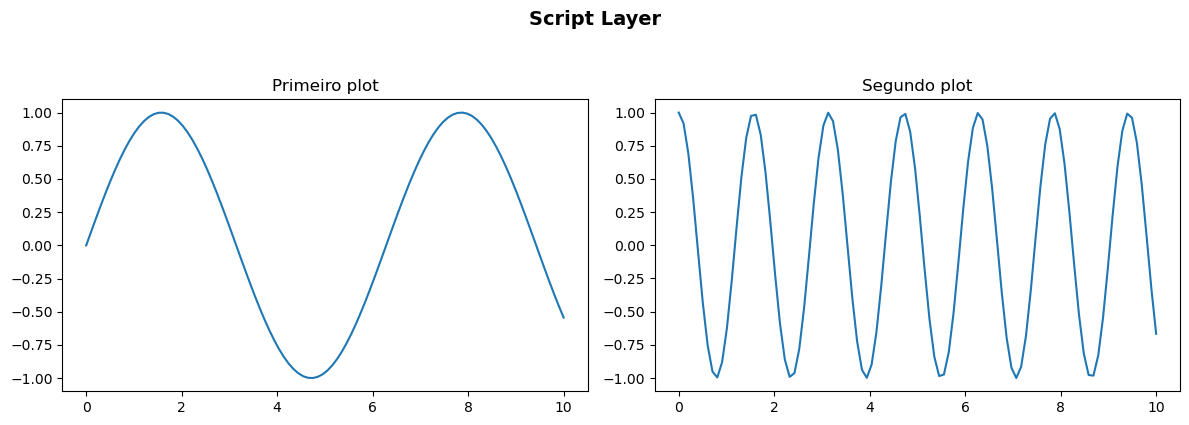

In [ ]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Script Layer', fontsize=14, weight='bold', y=1.05)
x = x = np.linspace(0,10,100)
# cria e ativa um gráfico na figura
plt.subplot(1, 2, 1) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.sin(x))
plt.title('Primeiro plot')

# cria e ativa um segundo gráfico na figura
plt.subplot(1, 2, 2) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.cos(4*x));
plt.title('Segundo plot')

plt.tight_layout()
plt.show()

In [95]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Dados de exemplo (substitua com os dados reais do 'beer')
# beer = pd.DataFrame({
#     'year': np.repeat(np.arange(2000, 2005), 2),
#     'barrels': np.random.randint(100, 500, size=10)
# })

# plt.figure(figsize=(15, 8))

# # Gráfico 1: Gráfico de Barras com Seaborn errado (1/6 do espaço)
# plt.subplot(2, 6, 1)
# ax1 = sns.barplot(x='year', y='barrels', data=beer)
# ax1.set_title('Gráfico de Barras com Seaborn errado')
# ax1.bar_label(ax1.containers[0], fontsize=10)

# # Gráfico 2: Gráfico de Barras com Matplotlib (1/6 do espaço)
# plt.subplot(2, 6, 2)
# bars = plt.bar(x=beer['year'], height=beer['barrels'])
# plt.title('Gráfico de Barras com Matplotlib')
# plt.bar_label(bars, fontsize=10)

# # Gráfico 3: Seaborn certo - soma tudo e faz a media de um só valor (2/6 do espaço)
# plt.subplot(2, 6, 3, colspan=2)
# grouped_beer = beer.groupby('year')[['barrels']].sum().reset_index()
# ax3 = sns.barplot(x='year', y='barrels', data=grouped_beer)
# ax3.set_title('Seaborn certo - soma tudo e faz a media de um só valor')
# plt.ylim([0, grouped_beer['barrels'].max() * 1.1])
# ax3.bar_label(ax3.containers[0], fontsize=10)

# # Gráfico 4: Seaborn Corrigido Estimator (1/6 do espaço)
# plt.subplot(2, 6, 5)
# ax4 = sns.barplot(x='year', y='barrels', data=beer, estimator=np.max)
# ax4.set_title('Seaborn Corrigido Estimator')
# ax4.bar_label(ax4.containers[0], fontsize=10)

# # Gráfico 5: Matplotlib com alpha (1/6 do espaço)
# plt.subplot(2, 6, 6)
# bars = plt.bar(x=beer['year'], height=beer['barrels'], alpha=0.5)
# plt.title('Matplotlib com alpha')
# plt.bar_label(bars, fontsize=10)

# plt.tight_layout()
# plt.show()


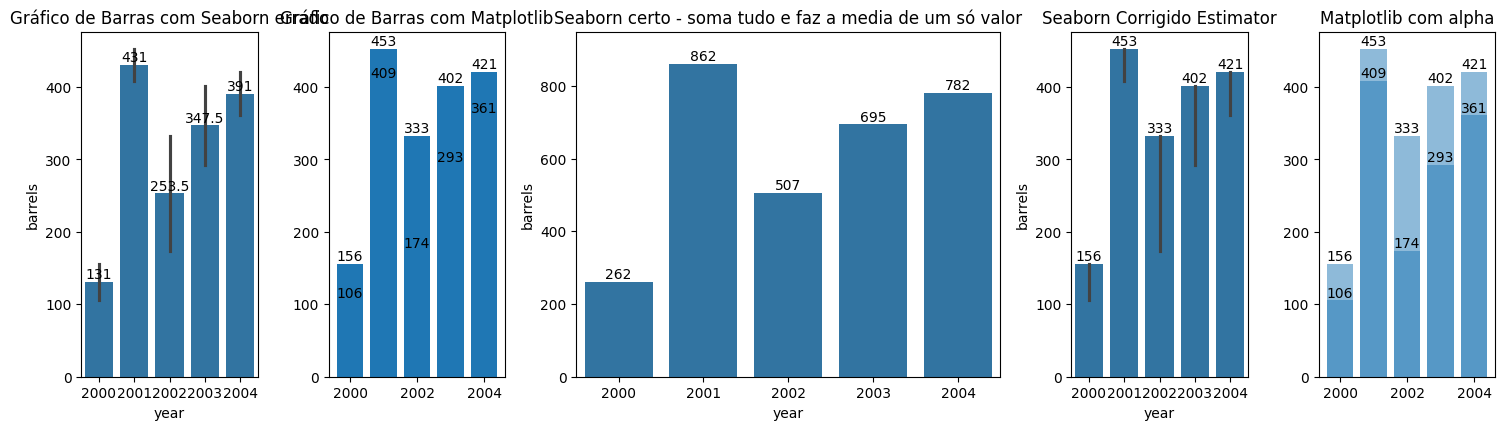

In [98]:
import matplotlib.gridspec as gridspec
dados = pd.DataFrame({
    'year': np.repeat(np.arange(2000, 2005), 2),
    'barrels': np.random.randint(100, 500, size=10)
})
fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 6)

# Gráfico 1: Gráfico de Barras com Seaborn errado (1/6 do espaço)
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(x='year', y='barrels', data=dados, ax=ax1)
ax1.set_title('Gráfico de Barras com Seaborn errado')
ax1.bar_label(ax1.containers[0], fontsize=10)

# Gráfico 2: Gráfico de Barras com Matplotlib (1/6 do espaço)
ax2 = fig.add_subplot(gs[0, 1])
bars = ax2.bar(x=dados['year'], height=dados['barrels'])
ax2.set_title('Gráfico de Barras com Matplotlib')
ax2.bar_label(bars, fontsize=10)

# Gráfico 3: Seaborn certo - soma tudo e faz a media de um só valor (2/6 do espaço)
ax3 = fig.add_subplot(gs[0, 2:4])
grouped_dados = dados.groupby('year')[['barrels']].sum().reset_index()
sns.barplot(x='year', y='barrels', data=grouped_dados, ax=ax3)
ax3.set_title('Seaborn certo - soma tudo e faz a media de um só valor')
ax3.set_ylim([0, grouped_dados['barrels'].max() * 1.1])
ax3.bar_label(ax3.containers[0], fontsize=10)

# Gráfico 4: Seaborn Corrigido Estimator (1/6 do espaço)
ax4 = fig.add_subplot(gs[0, 4])
sns.barplot(x='year', y='barrels', data=dados, estimator=np.max, ax=ax4)
ax4.set_title('Seaborn Corrigido Estimator')
ax4.bar_label(ax4.containers[0], fontsize=10)

# Gráfico 5: Matplotlib com alpha (1/6 do espaço)
ax5 = fig.add_subplot(gs[0, 5])
bars = ax5.bar(x=dados['year'], height=dados['barrels'], alpha=0.5)
ax5.set_title('Matplotlib com alpha')
ax5.bar_label(bars, fontsize=10)

plt.tight_layout()
plt.show()


### Artist Layer

plt.title() → ax.set_title()

plt.xlabel() → ax.set_xlabel()

plt.ylabel() → ax.set_ylabel()

plt.xlim() → ax.set_xlim()

plt.ylim() → ax.set_ylim()

E o comando ax.set() ainda pode ser empregado para definir todas essas propriedades simultaneamente.



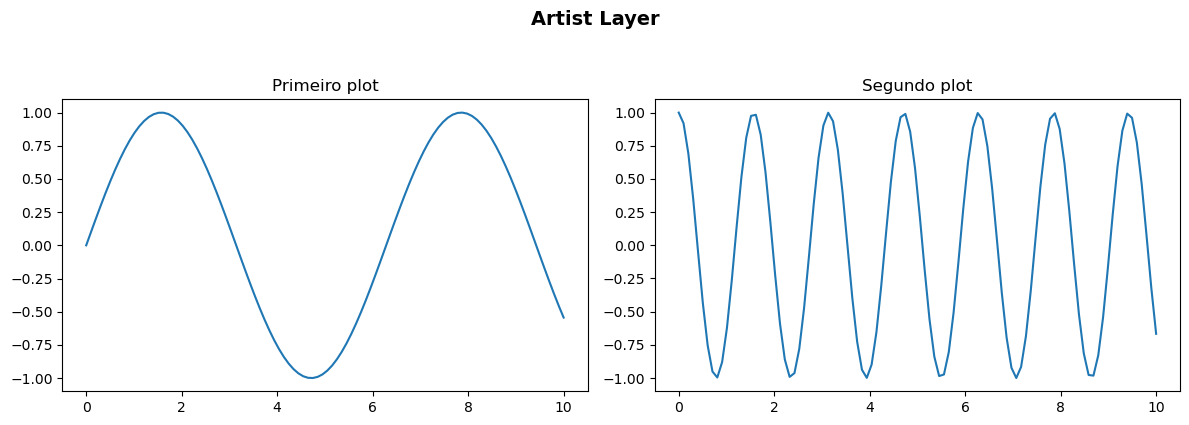

In [ ]:
# Cria uma grade de gráficos com 1 linha e 2 colunas de gráficos, ax é um vetor em que cada elemento corresponde a um gráfico da grade
fig, ax = plt.subplots(1,2,figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)

# Os comandos podem então ser direcionados para o gráfico específico
ax[0].plot(x, np.sin(x))
ax[0].set_title('Primeiro plot')

ax[1].plot(x, np.cos(4*x));
ax[1].set_title('Segundo plot')

plt.tight_layout()
plt.show()

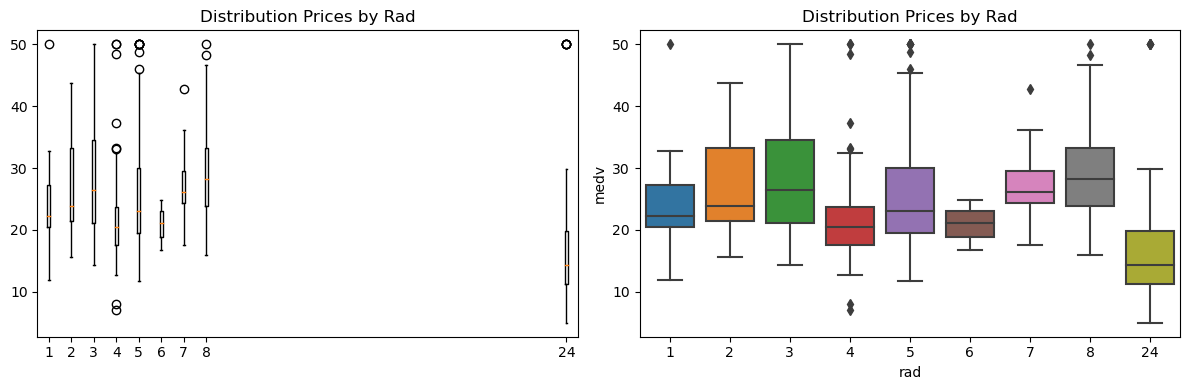

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for r in boston['rad'].unique():
  ax[0].boxplot(boston[boston.rad == r]['medv'], positions=[r])

ax[0].set_title('Distribution Prices by Rad')

sns.boxplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

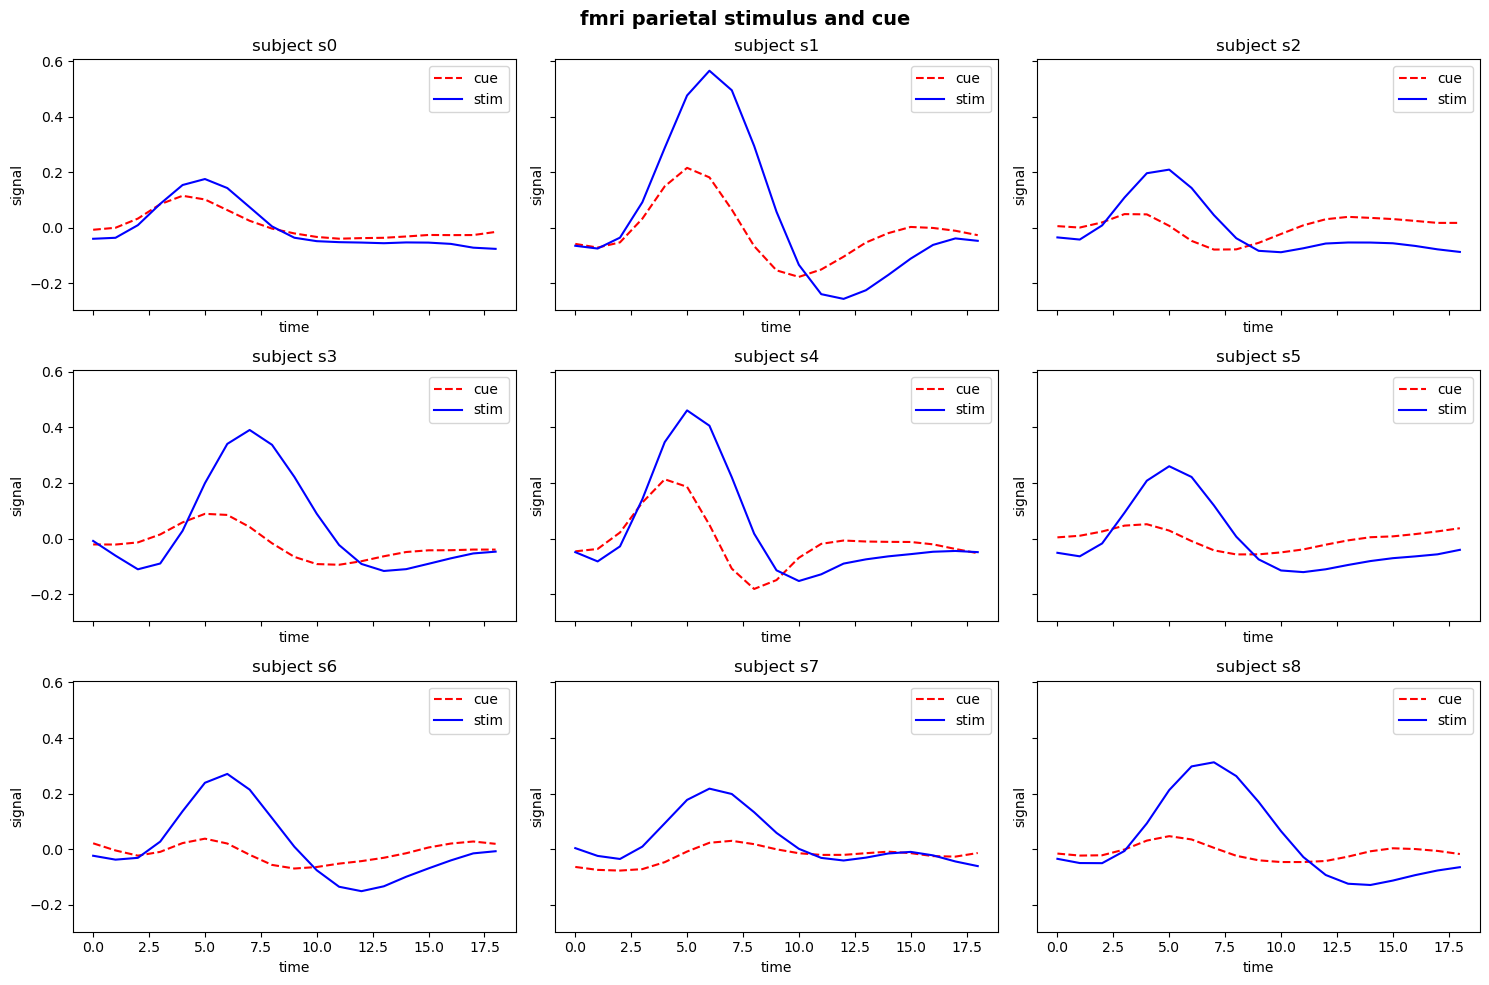

In [ ]:
## Interando i e j
df1 = fmri.sort_values('timepoint')
fig, ax= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i_s = 0

for i in range(0,ax.shape[0]):
  for j in range(0,ax.shape[1]):

    s = 's' + str(i_s)

    for e in df1.event.unique():
      mask = (df1.subject == s) & (df1.event == e) & (df1.region == 'parietal')
      ax[i,j].plot(df1[ mask ].timepoint, df1[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    ax[i,j].set_title('subject ' + s, fontsize=12)
    ax[i,j].set_xlabel('time')
    ax[i,j].set_ylabel('signal')
    ax[i,j].legend()

    i_s = i_s + 1

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

#### Saiba +

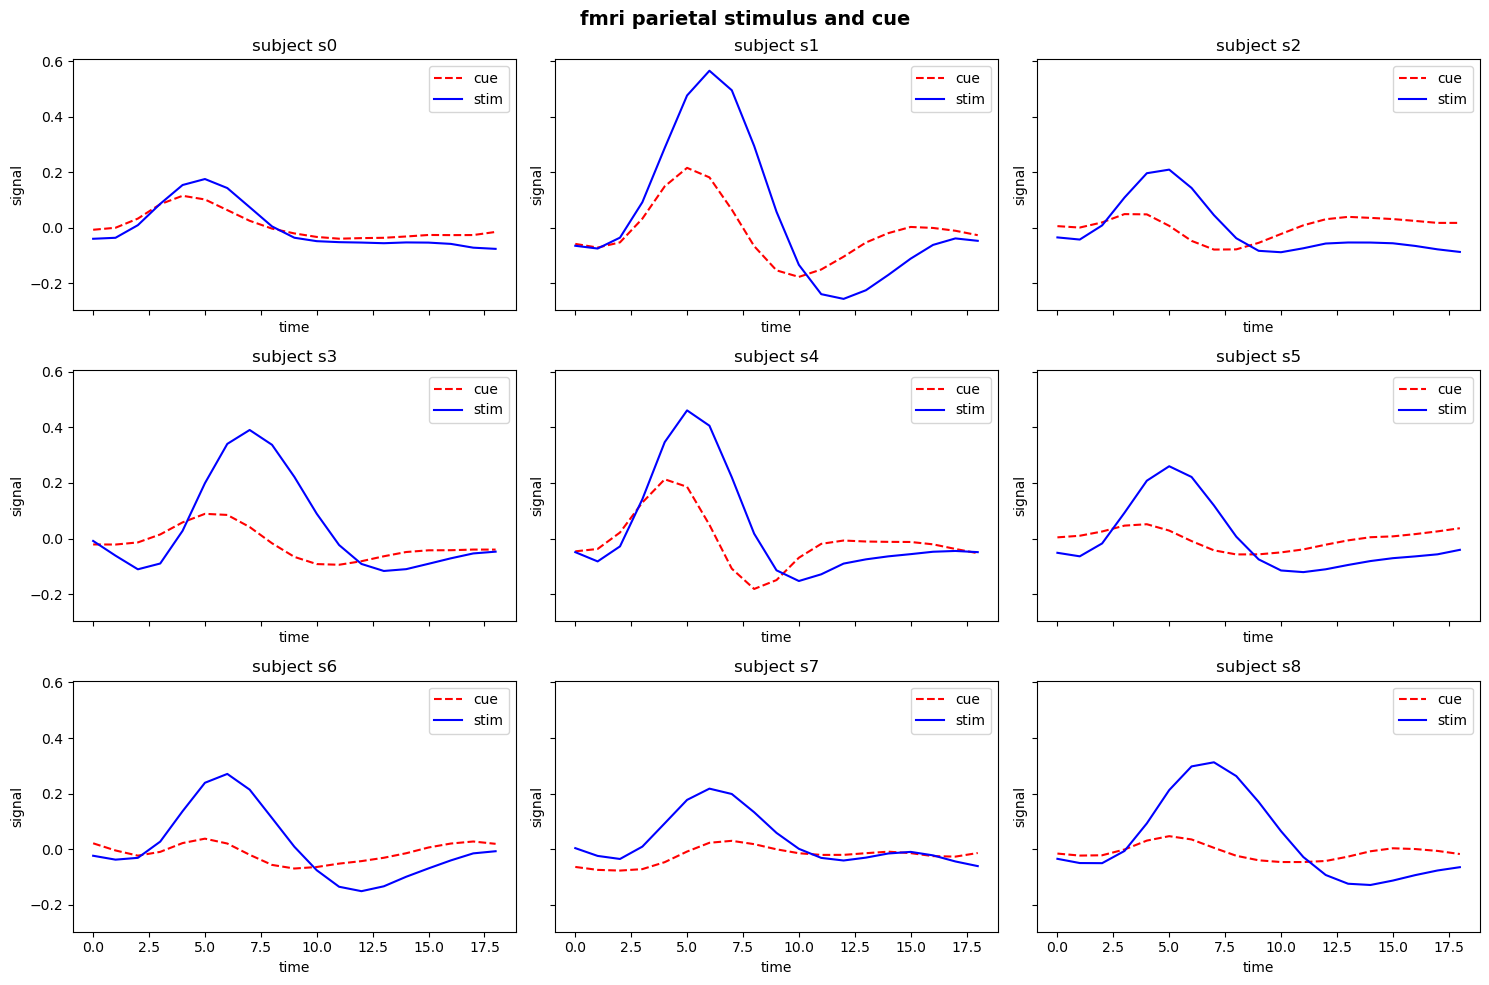

In [ ]:
## Interando i
fig, axis= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

ax = axis.reshape(-1)

for i in range(0,9):
  s = 's' + str(i)

  for e in df1.event.unique():
    mask = (df1.subject == s) & (df1.event == e) & (df1.region == 'parietal')
    ax[i].plot(df1[ mask ].timepoint, df1[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[i].set_title('subject ' + s, fontsize=12)
  ax[i].set_xlabel('time')
  ax[i].set_ylabel('signal')
  ax[i].legend()

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib2_1.png')

## Propriedades de linha `linestyle`, `marker`, `color`, `linewidth` e `markersize`



Você pode alterar várias das propriedades das linhas dos gráficos como estilo da linha, cor e sua espessura. Isso é importante para diferenciar várias linhas em um mesmo gráfico ou ainda se você quiser dar destaque a uma ou mais linhas. 

Essas propriedades podem ser codificadas explicitamente: 

```
plt.plot(x, np.cos(x), linestyle='dashed', marker='o', color='green', linewidth=1, markersize=6)
```

Ou em um formato resumido:

```
plt.plot(x, np.cos(x), '--og', linewidth=1, markersize=6)
```

A expressão `'--og'` agrupa os parâmetros `--`, `o` e `g` e indica respectivamente os mesmos parâmetros que o modo explícito `linestyle='dashed', marker='o', color='green'`. Mesmo na forma resumida os parâmetros podem aparecer em qualquer ordem, uma vez que os símbolos de cada parâmetro não se repetem. As cores nesse modo ficam entretanto limitadas ao um conjunto de cores básicas `rgbcmyk` (`r`=red, `g`=green, ...). 

O esquema de cores é bastante sofisticado e permite empregar de cores básicas à tons de cinza, como também especificar valores de cada componente RGB (esquema de combinação de cores básicas Red, Green, Blue) e transparência das linhas desenhadas (parâmetro `alpha`). 

O código a seguir mostra como empregar o uso dos parâmetros explícitos e de forma resumida, e mostra como essas configurações podem ser empregadas para dar destaque a uma ou mais linhas em um gráfico. 




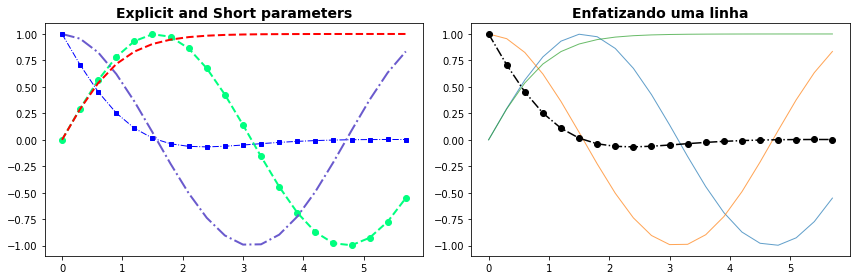

In [ ]:
x = np.arange(0, 6, 0.3)

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('Explicit and Short parameters', fontsize=14, weight='bold')
plt.plot(x, np.sin(x), color='springgreen', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.plot(x, np.cos(x), color='slateblue', linestyle='dashdot', linewidth=2)

# short color code (rgbcmyk)
plt.plot(x, np.tanh(x), '--r', linewidth=2, markersize=6)
plt.plot(x, 1/np.exp(x)*np.cos(x), '-.sb', linewidth=1, markersize=4)

plt.subplot(1, 2, 2)
plt.title('Enfatizando uma linha', fontsize=14, weight='bold')
plt.plot(x, np.sin(x), linewidth=1, alpha=0.7)
plt.plot(x, np.cos(x), linewidth=1, alpha=0.7)
plt.plot(x, np.tanh(x), linewidth=1, alpha=0.7)
plt.plot(x, 1/np.exp(x)*np.cos(x), '-.ok')

plt.tight_layout()
plt.show()


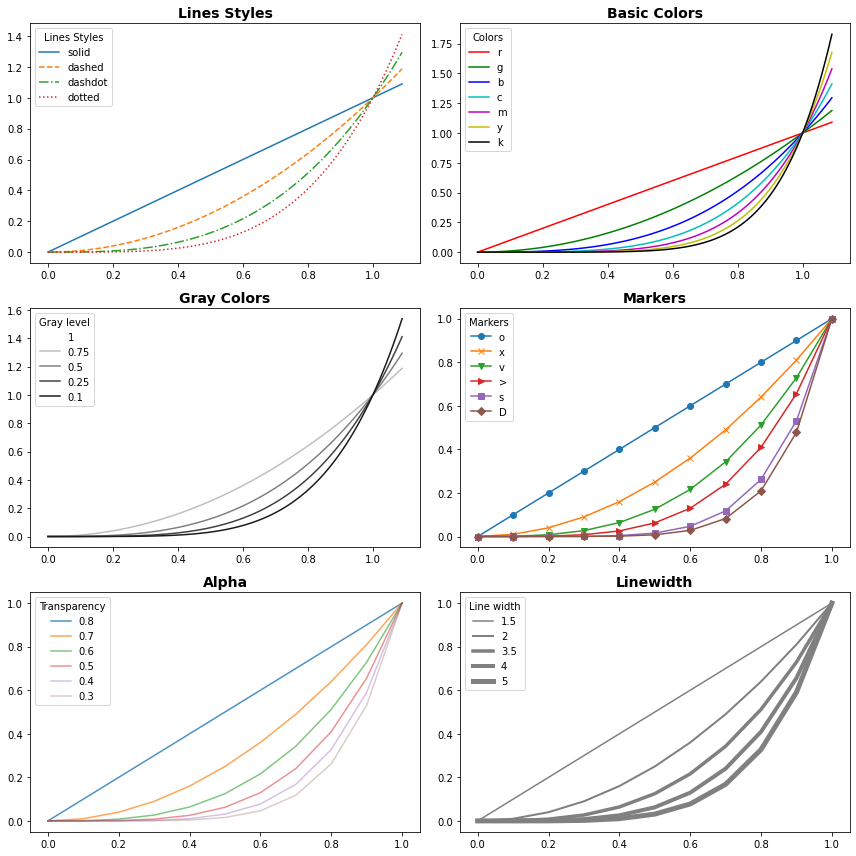

In [ ]:
x = np.arange(0.0, 1.1, 0.01)

fig = plt.figure(figsize=(12,12))

plt.subplot(3, 2, 1)
plt.title('Lines Styles', fontsize=14, weight='bold') # automatic colors
plt.plot(x, x**1, linestyle='solid', label='solid')
plt.plot(x, x**2, linestyle='dashed', label='dashed')
plt.plot(x, x**3, linestyle='dashdot', label='dashdot')
plt.plot(x, x**4, linestyle='dotted', label='dotted')
plt.legend(title='Lines Styles')

plt.subplot(3, 2, 2)
plt.title('Basic Colors', fontsize=14, weight='bold')
plt.plot(x, x**1, color='r', label='r')
plt.plot(x, x**2, color='g', label='g')
plt.plot(x, x**3, color='b', label='b')
plt.plot(x, x**4, color='c', label='c')
plt.plot(x, x**5, color='m', label='m')
plt.plot(x, x**6, color='y', label='y')
plt.plot(x, x**7, color='k', label='k')
plt.legend(title='Colors')

plt.subplot(3, 2, 3)
plt.title('Gray Colors', fontsize=14, weight='bold')
plt.plot(x, x**1, color='1', label='1')
plt.plot(x, x**2, color='0.75', label='0.75')
plt.plot(x, x**3, color='0.5', label='0.5')
plt.plot(x, x**4, color='0.25', label='0.25')
plt.plot(x, x**5, color='0.1', label='0.1')
plt.legend(title='Gray level')

x = np.arange(0.0, 1.1, 0.1) # para melhor exibição dos dados com markers

plt.subplot(3, 2, 4)
plt.title('Markers', fontsize=14, weight='bold')
plt.plot(x, x**1, marker='o', label='o')
plt.plot(x, x**2, marker='x', label='x')
plt.plot(x, x**3, marker='v', label='v')
plt.plot(x, x**4, marker='>', label='>')
plt.plot(x, x**6, marker='s', label='s')
plt.plot(x, x**7, marker='D', label='D')
plt.legend(title='Markers')

# o parâmetro alpha permite configurar um grau de transparência nas cores de linha
plt.subplot(3, 2, 5)
plt.title('Alpha', fontsize=14, weight='bold')
plt.plot(x, x**1, alpha=0.8, label='0.8')
plt.plot(x, x**2, alpha=0.7, label='0.7')
plt.plot(x, x**3, alpha=0.6, label='0.6')
plt.plot(x, x**4, alpha=0.5, label='0.5')
plt.plot(x, x**5, alpha=0.4, label='0.4')
plt.plot(x, x**6, alpha=0.3, label='0.3')
plt.legend(title='Transparency')

# empregando diferente espessuras de linha
plt.subplot(3, 2, 6)
plt.title('Linewidth', fontsize=14, weight='bold')
plt.plot(x, x**1, color='0.5', linewidth=1.5, label='1.5')
plt.plot(x, x**2, color='0.5', linewidth=2, label='2')
plt.plot(x, x**3, color='0.5', linewidth=3.5, label='3.5')
plt.plot(x, x**4, color='0.5', linewidth=4, label='4')
plt.plot(x, x**5, color='0.5', linewidth=5, label='5')
plt.legend(title='Line width')

plt.tight_layout()
plt.show()

## Textos: `title`, `labels`, `lengend` e `text`


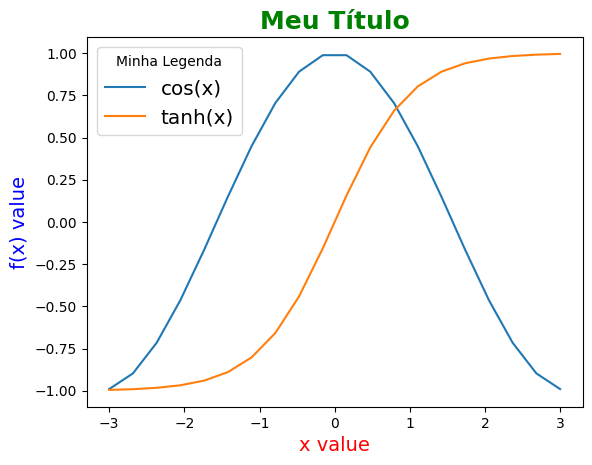

In [2]:
x = np.linspace(-3, 3, 20)

plt.figure()

# Adicionando labels às diferentes linhas do gráfico
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, np.tanh(x), label='tanh(x)')

# Adicionando o Título
plt.title('Meu Título', color='green', fontsize=18, weight='bold', ha='center')

# Nomeando os eixos
plt.xlabel('x value', color='red', fontsize=14)
plt.ylabel('f(x) value', color='blue', fontsize=14)

# Exibindo a legenda
plt.legend(title='Minha Legenda', loc='best', fontsize='x-large')

plt.show()



Títulos e rótulos aceitam todas as configurações comuns de editores de texto como tamanhos de fonte (`fontsize`), cor (`color`), estilos (como por exemplo `weight='bold'` e `style='italic'`). Para  diferentes tipos de fonte é necessário modificar parâmetros do `Matplotlib` a partir do `plt.rcParams` e você pode querer experimentar por exemplo `plt.rcParams["font.family"] = "fantasy"` ou um outro tipo de fonte. Aqui manteremos o uso da fonte padrão. 

Os títulos podem ser alinhados no centro (padrão), à esquerda ou à direita usando o parâmetro `ha` (`horizontalalignment`, e valores `'center','right'` ou `'left'`), e você pode deixar para o `Matplotlib` definir a melhor posição da legenda ou empregar o parâmetro de localização `loc` (`loc='upper right'`, `loc='lower left'`, `loc='center left'` etc.).

Quando trabalhando com múltiplos gráficos pode ser necessário adicionar também um `suptitle` ao conjunto de gráficos e empregamos isso em um exemplo anterior quando apresentamos o modo `Artist Layer`:

```
plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)
``` 

O parâmetro `y=1.05` coloca o `suptitle` 0.05 acima da figura e evita a sobreposição dos títulos. O comando `plt.tight_layout()`, no mesmo exemplo, ajusta o automaticamente o layout da figura para evitar sobreposições dos gráficos, como dos textos dos eixos de um gráfico com outro. Empregamos bastante esse comando aqui.   

Anotações dentro de um gráfico são essencias quando se quer chamar a atenção do leitor para um determinado ponto do gráfico. Para isso o `Matplotlib` fornece duas funções, o `plt.text()` e o `plt.annotate()`. O primeiro adiciona um texto em uma posição `x, y` e o segundo permite cirar uma seta do texto até um ponto específico do gráfico. 

Pontos específicos do gráfico podem ainda ser destacados, ou com o comando `plot()` destacando uma coordenada específica, ou com a adição de linhas verticais (`vlines()`) ou horizontais (`hlines()`), realçando a posição.

## Adicionando Textos e Anotações aos Gráficos

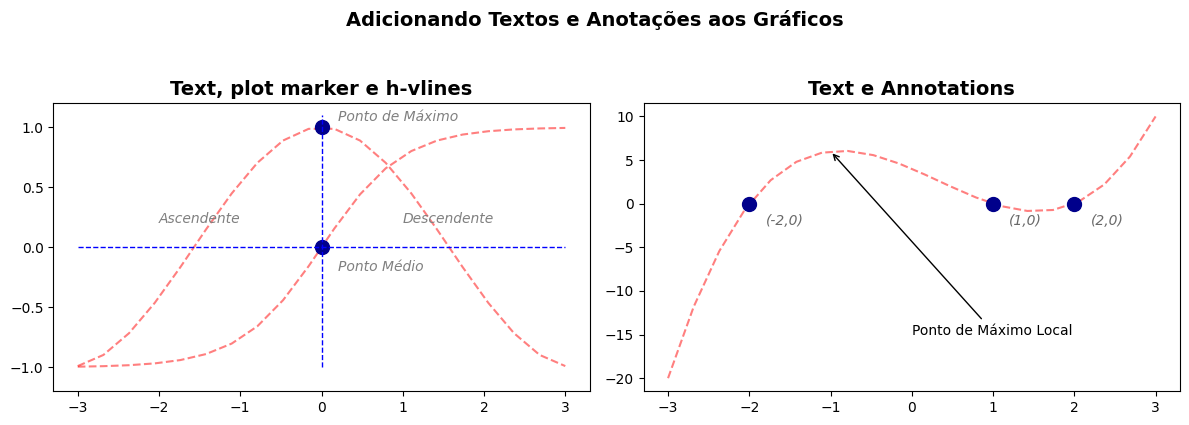

In [3]:
x = np.linspace(-3, 3, 20)

fig = plt.figure(figsize=(12,4))
plt.suptitle('Adicionando Textos e Anotações aos Gráficos', fontsize=14, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.title('Text, plot marker e h-vlines', fontsize=14, weight='bold')
plt.plot(x, np.tanh(x), 'r--', alpha=0.5)
plt.plot(x, np.cos(x), 'r--', alpha=0.5)
plt.ylim([-1.2,1.2])

# Enfatizando um ponto específico do gráfico
plt.plot(0, 1, marker = 'o' , color = 'darkblue', markersize= 10)
plt.plot(0, 0, marker = 'o' , color = 'darkblue', markersize= 10)

# Adicionando anotações
plt.text(0 + 0.2, 0 - 0.2, 'Ponto Médio', style='italic', color='grey')
plt.text(0 + 0.2, 1 + 0.05, 'Ponto de Máximo', style='italic', color='grey')
plt.text(-2.0, 0.2, 'Ascendente', style='italic', color='grey')
plt.text(1, 0.2, 'Descendente', style='italic', color='grey')

# Adicionando linhas verticais e horizontais
plt.vlines(0, -1, 1.1, linestyle='dashed', color='b', linewidth=1) # vlines(posição, início, fim)
plt.hlines(0, -3, 3, linestyle='dashed', color='b', linewidth=1) # hlines(posição, início, fim)

plt.subplot(1, 2, 2)
plt.title('Text e Annotations', fontsize=14, weight='bold')
plt.plot(x, (x + 2) * (x - 1) * (x - 2), 'r--', alpha=0.5)

# Enfatizando vários pontos do gráfico
plt.plot([-2, 1, 2], [0, 0, 0], 'o', color='darkblue', markersize=10)

# Adicionando anotações
plt.text(-2 + 0.2, 0 - 2.4, '(-2,0)', style='italic', color='dimgrey')
plt.text(1 + 0.2, 0 - 2.4, '(1,0)', style='italic', color='dimgrey')
plt.text(2 + 0.2, 0 - 2.4, '(2,0)', style='italic', color='dimgrey')

# Annotate
plt.annotate('Ponto de Máximo Local', 
             xy=(-1, 6),                # ponto do gráfico
             xytext=(0, -15),           # posição do texto
             arrowprops=dict(arrowstyle="->")) 

plt.tight_layout()                    
plt.show()


## `plt.fill_between(x,y)`, para preencher a área sob um gráfico, ou ainda `plt.fill_between(x,y,linha-média)` para preencher a área entre o gráfico e uma linha média (o padrão para linha média é 0).

Outra forma útil de destaque pode ser preencher as áreas sob o gráfico (gráficos de área). Para isso você pode pode empregar `plt.fill_between(x,y)`, para preencher a área sob um gráfico, ou ainda `plt.fill_between(x,y,linha-média)` para preencher a área entre o gráfico e uma linha média (o padrão para linha média é 0).

Se você conhece distribuições de probabilidade, reconhecerá nos exemplos abaixo os gráficos de densidade de probabilidade (PDF) e probabilidade acumulada (CDF) de uma distribuição normal com média $0$ e desvio padrão $1$. A probabilidade $P(x \le -0.5)$  é dada pela área sob a curva do gráfico de densidade de probabilidade no intervalo de $[0, -0.5]$, ou diretamente pelo gráfico de distribuição de probabilidade acumulada. Você verá mais sobre isso no capítulo de Distribuição.

<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_690368/3630719785.py:38: SyntaxWarning: invalid escape sequence '\m'
  plt.title('PDF, $N(\mu=0, \sigma=1)$',fontsize=12)
/tmp/ipykernel_690368/3630719785.py:49: SyntaxWarning: invalid escape sequence '\m'
  plt.title('CDF, $N(\mu=0, \sigma=1)$',fontsize=12)


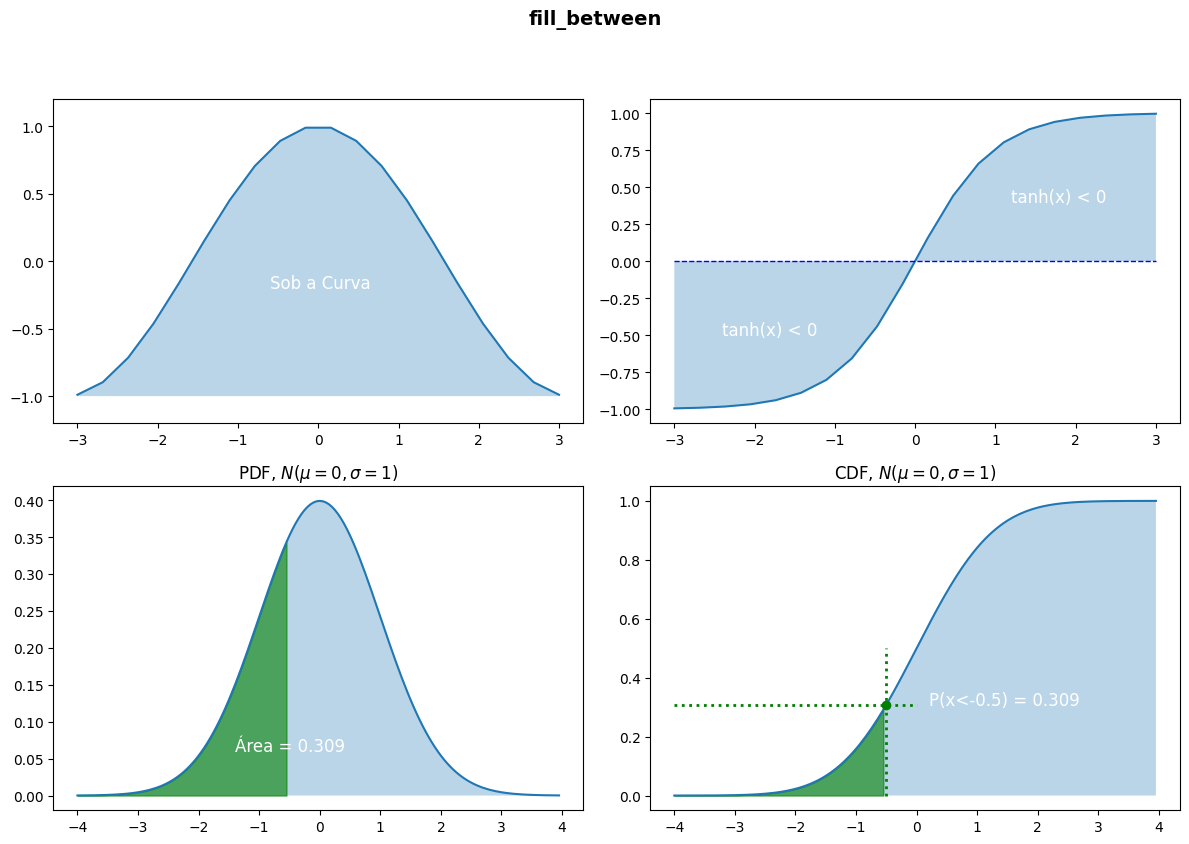

In [4]:
x = np.linspace(-3, 3, 20)

fig = plt.figure(figsize=(12,8))
plt.suptitle('fill_between', fontsize=14, weight='bold', y=1.05)

plt.subplot(2, 2, 1)
plt.plot(x, np.cos(x))

# Fill
plt.fill_between(x, np.cos(x), -1, alpha=0.3)

# Adicionando anotações
plt.text(-0.6, -0.2, 'Sob a Curva', color='white', fontsize=12)
plt.ylim([-1.2,1.2])

plt.subplot(2, 2, 2)
plt.plot(x, np.tanh(x))

# Fill
plt.fill_between(x, np.tanh(x), alpha=0.3)

# Adicionando anotações
plt.text(-2.4, -0.5, 'tanh(x) < 0', color='white', fontsize=12)
plt.text(1.2, 0.4, 'tanh(x) < 0', color='white', fontsize=12)
# hline
plt.hlines(0, -3, 3, linestyle='dashed', color='b', linewidth=1)

# apenas para construção dos dados de uma distribuição normal
#-------------------------------------------------------------------------------
from scipy.stats import norm 
pdf = []
cdf = []
for a in np.arange(-4,4,0.05):
  pdf.append(norm.pdf(a))
  cdf.append(norm.cdf(a))  

plt.subplot(2, 2, 3)
plt.title('PDF, $N(\mu=0, \sigma=1)$',fontsize=12)
plt.plot(np.arange(-4,4,0.05),pdf)

# Fill
plt.fill_between(np.arange(-4,4,0.05), pdf, alpha=0.3)    
plt.fill_between(np.arange(-4,-0.5,0.05), pdf[0:len(np.arange(-4,-0.5,0.05)+1)], color='g', alpha=0.6) 

# Adicionando anotações
plt.text(-1.4, 0.06, f'Área = { norm.cdf(-0.5) :.3f}',fontsize=12, color='white')

plt.subplot(2, 2, 4)
plt.title('CDF, $N(\mu=0, \sigma=1)$',fontsize=12)
plt.plot(np.arange(-4,4,0.05),cdf)

# Fill
plt.fill_between(np.arange(-4,4,0.05), cdf, alpha=0.3)    
plt.fill_between(np.arange(-4,-0.5,0.05), cdf[0:len(np.arange(-4,-0.5,0.05)+1)], color='g', alpha=0.6) 

# Adicionando anotações
plt.vlines(-0.5,0,max(cdf)-max(cdf)/2,linewidth=2,linestyle=':',colors='g') 
plt.hlines(norm.cdf(-0.5), -4, 0, linewidth=2,linestyle=':',colors='g')  
plt.plot(-0.5,norm.cdf(-0.5),'go')

plt.text(0.2, norm.cdf(-0.5), f'P(x<-0.5) = { norm.cdf(-0.5) :.3f}',fontsize=12, color='white')



plt.tight_layout()                    
plt.show()


## Limite dos eixos e escalas `xlim`, `ylim` e `ticker`

O `Matplotlib` ajusta automaticamente os limites dos valores dos eixos x e y e as escalas empregadas. Muitas vezes esses valores não são os mais adequados e você pode querer alterá-los. O limites dos valores podem ser definidos empregando as funções `xlim` e `ylim`. 

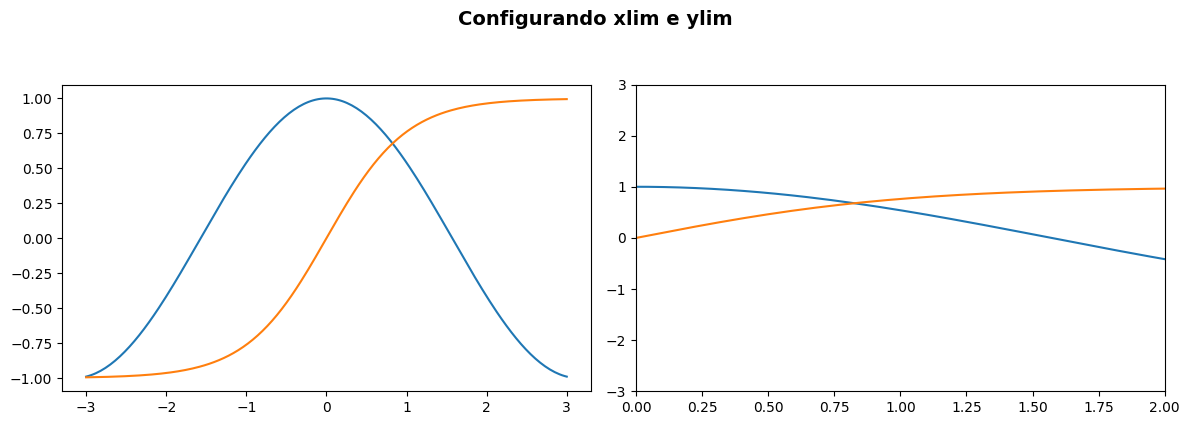

In [5]:
x = np.linspace(-3, 3, 200)

fig = plt.figure(figsize=(12,4))
plt.suptitle('Configurando xlim e ylim', fontsize=14, weight='bold', y=1.05)

plt.subplot(1,2,1)
plt.plot(x, np.cos(x))
plt.plot(x, np.tanh(x))

plt.subplot(1,2,2)
plt.plot(x, np.cos(x))
plt.plot(x, np.tanh(x))
plt.xlim([0,2])
plt.ylim([-3,3])

plt.tight_layout()
plt.show()

A modificação da régua dos eixos (a escala) é mais trabalhosa. Ela pode ser feita mais facilmente empregando a interface orientada a objeto (`Artist Layer`), mas exige ainda o uso da classe `ticker` e dos métodos de eixo `x|y axis.set_major_locator`. Alteramos o primeiro gráfico da figura anterior para exibir suas escalas alteradas de duas formas diferentes.

Mas esse é um recurso avançado e, para maior parte dos casos o ajuste automático do `Matplotlib` é bastante suficiente.

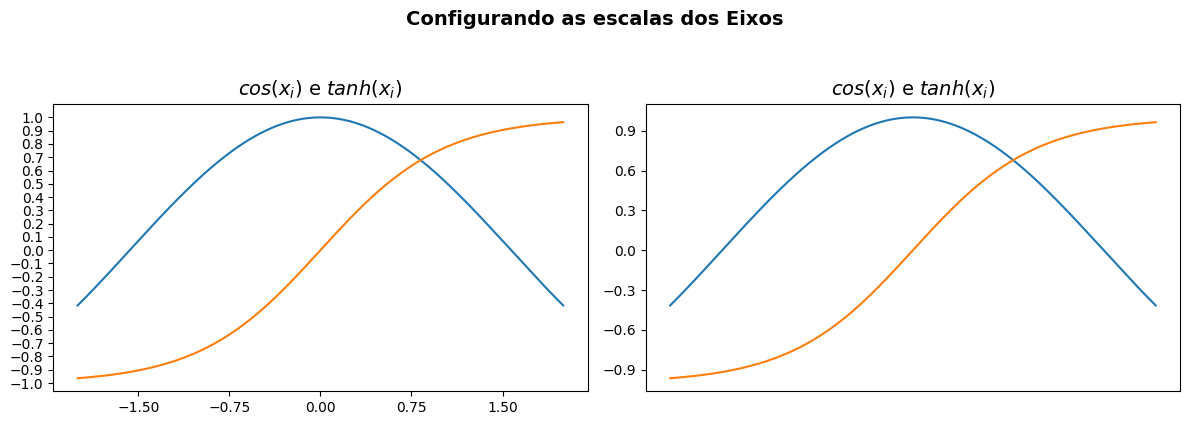

In [6]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.suptitle('Configurando as escalas dos Eixos', fontsize=14, weight='bold', y=1.05)

# Mais pontos gerados para exibir diferentes réguas de dados nos eixos
x = np.linspace(-2, 2, 10000)

ax[0].set_title('$cos(x_i)$ e $tanh(x_i)$', fontsize=14)
ax[0].plot(x, np.cos(x))
ax[0].plot(x, np.tanh(x))

# Definindo o intervalo dos valores a serem exibidos nos eixos 
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(0.75))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1))

ax[1].set_title('$cos(x_i)$ e $tanh(x_i)$', fontsize=14)
ax[1].plot(x, np.cos(x))
ax[1].plot(x, np.tanh(x))

# Suprimindo a régua de valores no eixo x
ax[1].xaxis.set_major_locator(ticker.NullLocator())

# Definindo a quantidade de pontos a ser exibida na régua
ax[1].yaxis.set_major_locator(ticker.MaxNLocator(8))

plt.tight_layout()
plt.show()


## EIXOS E ESCALAS

Ao trabalhar múltiplos gráficos em uma figura podemos querer compartilhar as escalas dos eixos x e y deixando mais limpa e elegante a exibição dos gráficos. Para isso você pode empregar os parâmetros `sharex` ou `sharey` da função `subplots` conforme a escala do eixo que deseja compartilhar. No exemplo abaixo ainda empregamos o recurso de 'grade' apresentando, assim, mais este recurso.

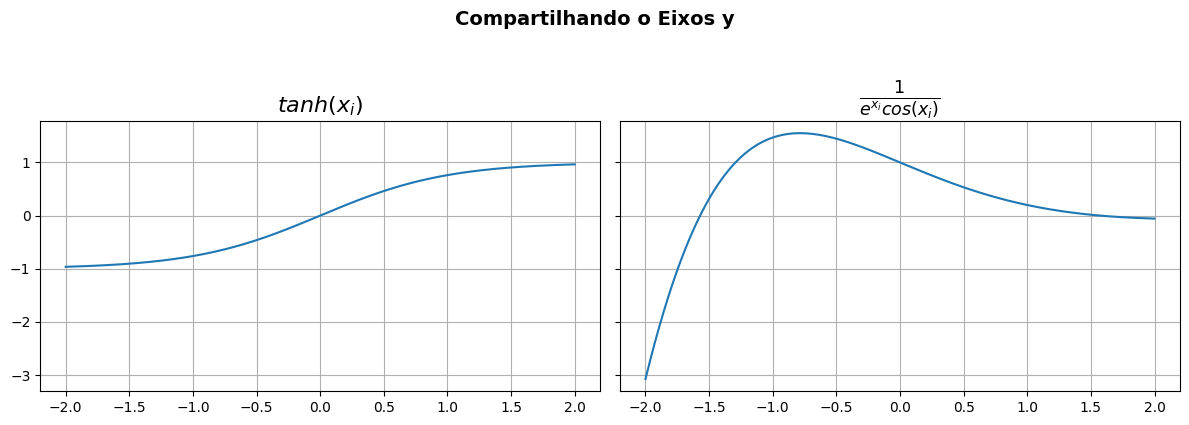

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,4), sharey=True, sharex=True)
plt.suptitle('Compartilhando o Eixos y', fontsize=14, weight='bold', y=1.05)

# Mais pontos gerados para exibir diferentes réguas de dados nos eixos
x = np.linspace(-2, 2, 10000)

ax[0].set_title('$tanh(x_i)$', fontsize=16)
ax[0].plot(x, np.tanh(x))
ax[0].grid()

ax[1].set_title('$\\frac{1}{e^{x_i} cos(x_i)}$', fontsize=18)
ax[1].plot(x, 1/np.exp(x)*np.cos(x))
ax[1].grid()

plt.tight_layout()
plt.show()

## Salvando os Gráficos em um Arquivo

Salvar os gráficos para uso em algum outro aplicativo ou documento, como uma página web, um relatório ou uma apresentação é muito comum. O comando `savefig()` permite salvar seus gráficos em uma série de formatos como .JPG, .PNG, .PDF ou .SVG. e o parâmetro `savefig.dpi` pode ser empregado para aumentar a resolução e qualidade da figura produzida.

$\rightarrow$ *Empregue `plt.savefig( <arquivos>.JPG|PNG|PDF|SVG )` para salvar gráficos em arquivos no seu diretório de trabalho do `Python`.*


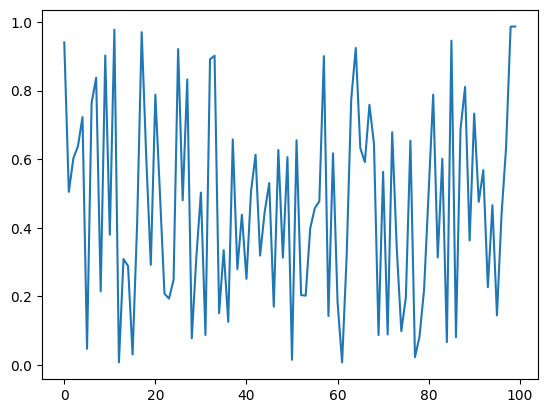

In [9]:
plt.rcParams['savefig.dpi'] = 300

plt.plot(x)

plt.savefig('my_plot.png')
plt.savefig('my_plot.pdf')

plt.show()



## Consultado a documentação do `Matplotlib`

O https://matplotlib.org é a referência geral do `Matplotlib` e os links exatos de cada recurso podem variar de versão para versão e, por isso, não apontamos os links de cada recurso aqui. Mesmo assim você pode achar útil consultar os links de galeria https://matplotlib.org/stable/gallery/index.html e tutoriais  https://matplotlib.org/stable/tutorials/index.html do `Matplotlib`. Você também encontrará outros links de interesse no final do livro. 



## Outros gráficos

Muitos outros gráficos, além do gráfico de linhas, podem ser produzidos com o `Matplotlib`. Alguns desses gráficos encontram-se abaixo e você pode notar que eles compartilham muitos dos recursos dos gráficos de linha que vimos aqui: modos `Script` e `Artist Layer`, configuração de títulos, rótulos e legendas, subplots etc. De fato eles diferem apenas no que se refere às propriedades específicas de cada  gráfico e, por isso, essa introdução dos gráficos de linha é importante para a construção de quaisquer gráficos. 

/tmp/ipykernel_690368/675382108.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y,z,t],labels=['Cyan','Green','Yellow'])


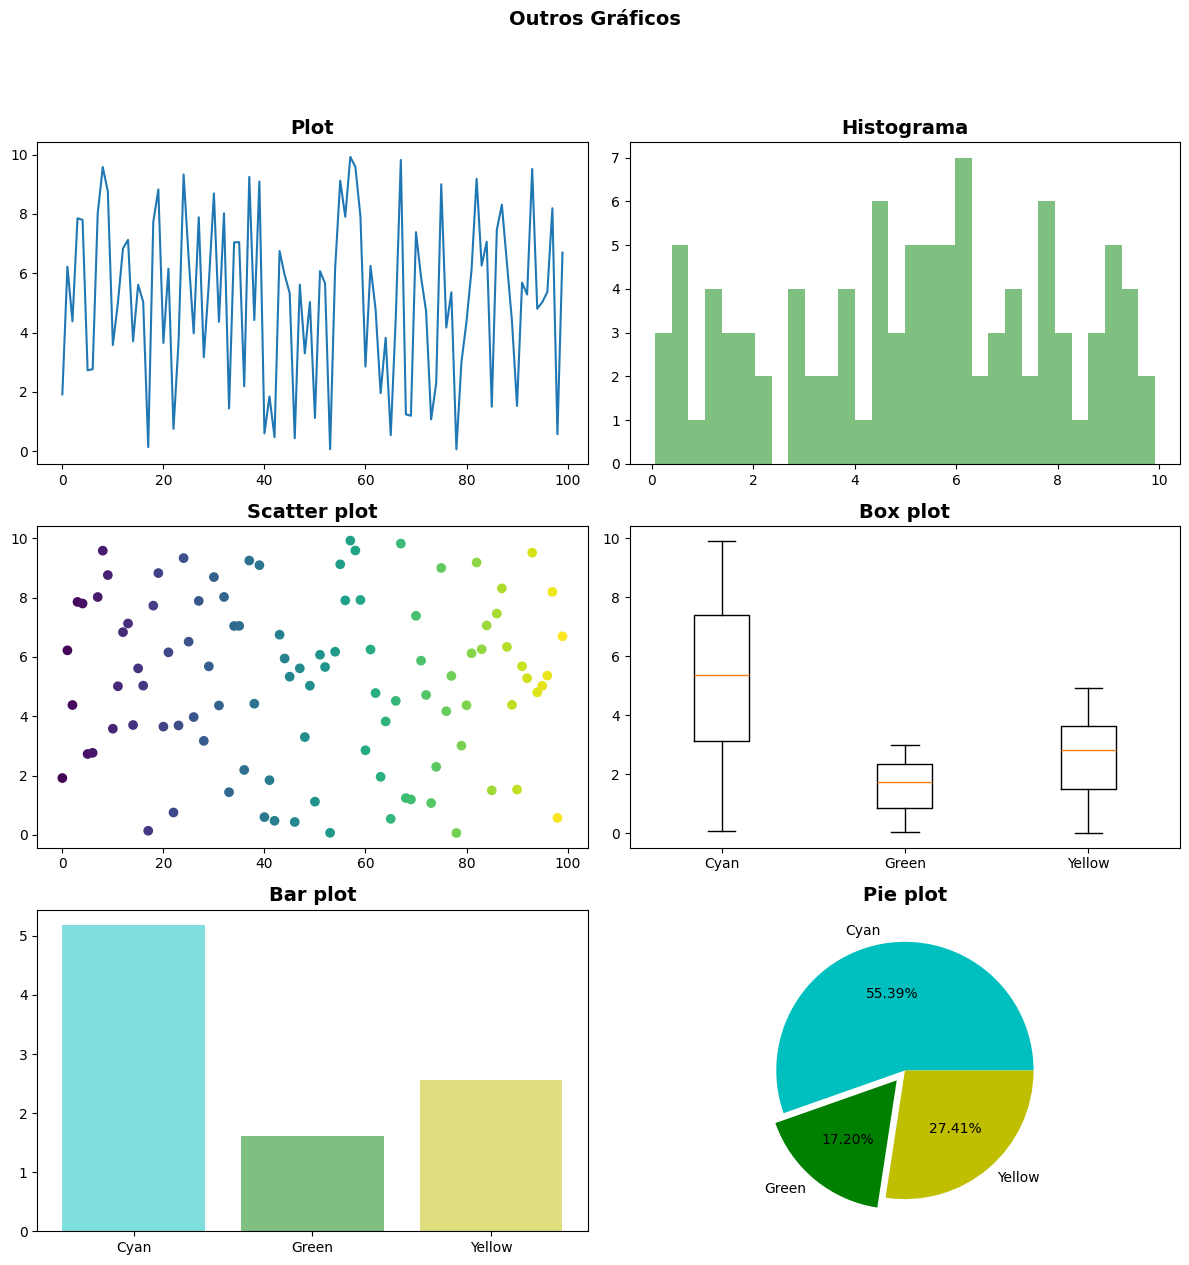

In [10]:
# apenas a produção dos dados
x = np.random.random_sample(100)
np.random.seed(1234)

x = np.arange(0,100,1)
y = np.random.rand(100)*10
z = np.random.rand(100)*3
t = np.random.rand(100)*5

from matplotlib import cm # para cores no scatter plot

plt.figure(figsize=(12,12))                         
plt.suptitle('Outros Gráficos', fontsize=14, weight='bold', y=1.05)

plt.subplot(3, 2, 1)  
plt.plot(x,y)    
plt.title('Plot', fontsize=14, weight='bold') 

plt.subplot(3, 2, 2)  
plt.hist(y, bins=30, color='g', alpha=0.5)     
plt.title('Histograma', fontsize=14, weight='bold')    
             
plt.subplot(3, 2, 3)  
plt.scatter(x,y,c=x,cmap=cm.viridis)    
plt.title('Scatter plot', fontsize=14, weight='bold') 

plt.subplot(3, 2, 4)  
plt.boxplot([y,z,t],labels=['Cyan','Green','Yellow'])    
plt.title('Box plot', fontsize=14, weight='bold')

plt.subplot(3, 2, 5)  
plt.bar(['Cyan','Green','Yellow'],[y.mean(),z.mean(),t.mean()],color=['c','g','y'],alpha=0.5)    
plt.title('Bar plot', fontsize=14, weight='bold')

plt.subplot(3, 2, 6)  
plt.pie([y.mean(),z.mean(),t.mean()],
        colors=['c','g','y'],
        explode=[0, 0.1, 0],
        labels=['Cyan','Green','Yellow'],
        autopct='%1.2f%%')    
plt.title('Pie plot', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


## `Seaborn`

O `Seaborn` é uma outra biblioteca de visualização construída sobre o `Matplotlib`. Ela implementa uma interface de mais alto nível para as visualizações de dados. Ela compartilha uma série de comandos com o `Matplotlib` e, em muitos casos, você empregará os comandos do `Matplotlib` em conjunto com o `Seaborn`. A diferença entre as duas bibliotecas é que o `Matplotlib`, sendo uma interface de mais baixo nível, oferece mais flexibilidade de como produzir e modificar os gráficos, enquanto o `Seaborn` oferece uma interface mais simples e principalmente útil quando tratamos de análises multidimensionais. 

Os mesmos gráficos criados acima com `Matplotlib` são reproduzidos abaixo com o `Seaborn`. Você pode observar que a *tradução* de um pacote para o outro nestes casos é bastante direta. Note que não temos o *pie* plot no `Seaborn`, mas você entenderá mais sobre isso no capítulo de Quantidades e Proporções.

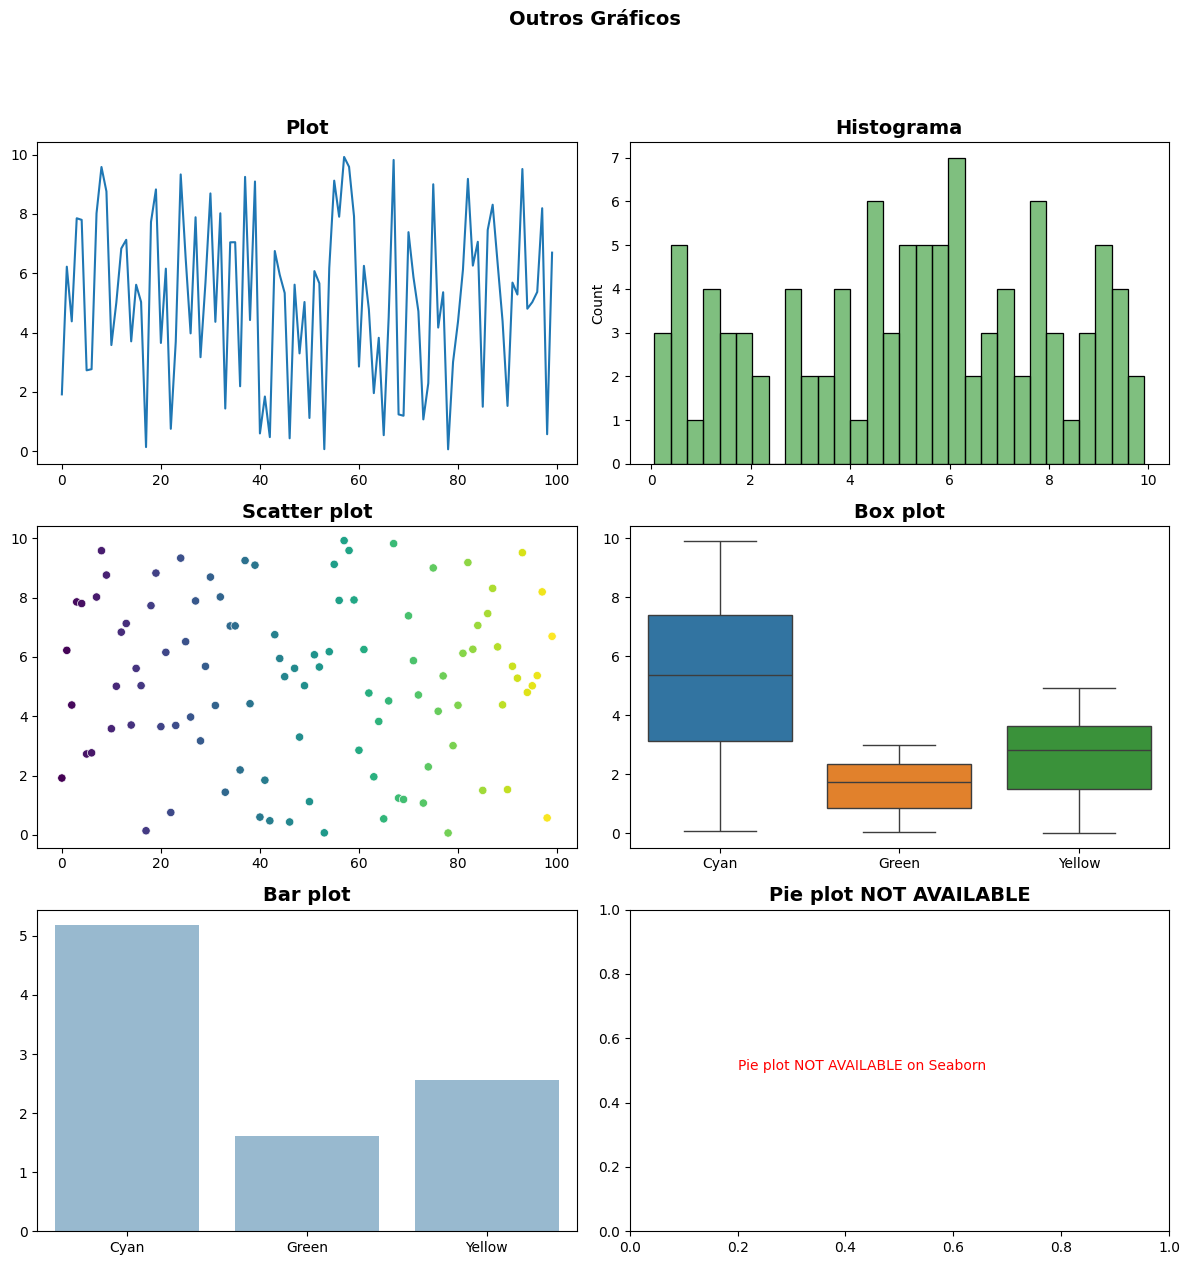

In [11]:
import seaborn as sns
import pandas as pd

# apenas a produção dos dados
x = np.random.random_sample(100)
np.random.seed(1234)

x = np.arange(0,100,1)
y = np.random.rand(100)*10
z = np.random.rand(100)*3
t = np.random.rand(100)*5

from matplotlib import cm # para cores no scatter plot

fig, ax = plt.subplots(3,2,figsize=(12,12))  
 
plt.suptitle('Outros Gráficos', fontsize=14, weight='bold', y=1.05)

sns.lineplot(x=x,y=y,ax=ax[0,0])                                        # x= e y= para evitar warnings....
ax[0,0].set_title('Plot', fontsize=14, weight='bold') 

sns.histplot(y, bins=30, color='g', alpha=0.5,ax=ax[0,1])               # para subplots somente aceite facegrid, um recurso avançado para múltiplos plots
ax[0,1].set_title('Histograma', fontsize=14, weight='bold')
             
sns.scatterplot(x=x,y=y,c=x,cmap=cm.viridis,ax=ax[1,0])                 # x= e y= para evitar warnings....
ax[1,0].set_title('Scatter plot', fontsize=14, weight='bold') 

box = pd.DataFrame({'Cyan':y,'Green':z,'Yellow':t})                     # boxplot para ser simples empregamos um dataframe para uso da função melt  
sns.boxplot(data=box,ax=ax[1,1])   
ax[1,1].set_title('Box plot', fontsize=14, weight='bold')

sns.barplot(x=['Cyan','Green','Yellow'],y=[y.mean(),z.mean(),t.mean()],alpha=0.5,ax=ax[2,0])   # x= e y= para evitar warnings.... 
ax[2,0].set_title('Bar plot', fontsize=14, weight='bold')

# não temos pie plot no seaborn
plt.text(0.2, 0.5,'Pie plot NOT AVAILABLE on Seaborn', color='r')
ax[2,1].set_title('Pie plot NOT AVAILABLE', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

## Um Gráfico Final

Como um exemplo final apresentamos uma visualização de dados para que você possa ver vários desses recursos que aprendeu aqui empregados conjuntamente.

São dados de valores do SP500 (índice da bolsa americana) e do Ibovespa (bolsa de São Paulo) de 2020-01-01 a 2021-04-01, em que se destacam os impactos da Pandemia de Covid-19 no período. 

                  SP500      IBOV
Date                             
2020-01-02  3257.850098  118573.0
2020-01-03  3234.850098  117707.0
2020-01-06  3246.280029  116878.0
2020-01-07  3237.179932  116662.0
2020-01-08  3253.050049  116247.0


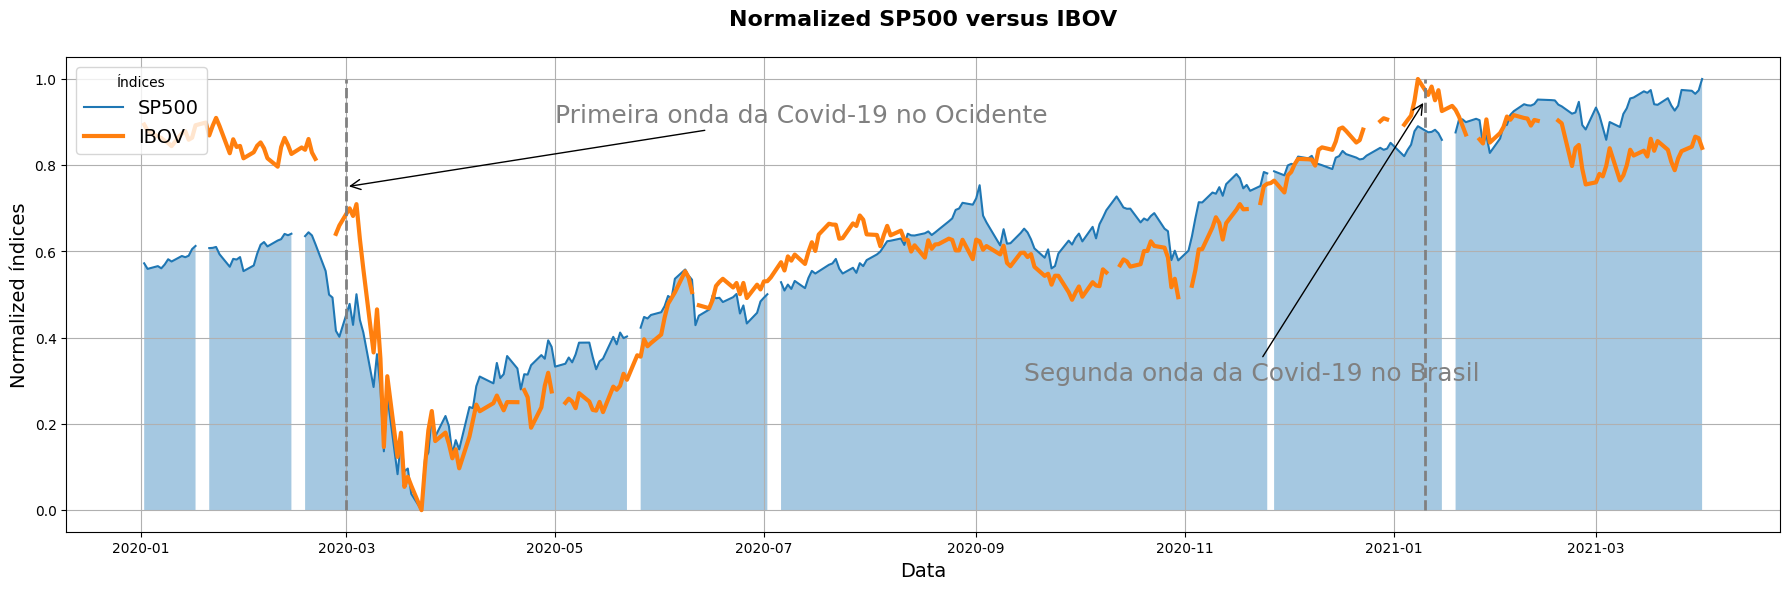

In [12]:
import datetime
import pandas as pd

# Obtendo os  dados
#-------------------------------------------------------------------------------
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/sp500_ibov.csv',
                 index_col=0,         # read dates como index
                 parse_dates=True)
print(df.head())
df=(df-df.min())/(df.max()-df.min()) # normalizando os valores

# Gráficos
#-------------------------------------------------------------------------------
plt.figure(figsize=(18,6))                         
plt.title('Normalized SP500 versus IBOV', fontsize=16, weight='bold', y=1.05)

plt.plot(df['SP500'], label='SP500')
plt.plot(df['IBOV'], label='IBOV',linewidth=3)

# Ornamentos
#-------------------------------------------------------------------------------

# Annotate
plt.annotate('Primeira onda da Covid-19 no Ocidente', 
             xy=(datetime.datetime(2020, 3, 1), 0.75),  # ponto do gráfico
             xytext=(datetime.datetime(2020, 5, 1), 0.9),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=18,
             color='grey')  

plt.annotate('Segunda onda da Covid-19 no Brasil', 
             xy=(datetime.datetime(2021, 1, 10), 0.95),  # ponto do gráfico
             xytext=(datetime.datetime(2020, 9, 15), 0.3),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=18,
             color='grey')              

# Linhas verticais
plt.vlines(datetime.datetime(2020, 3, 1),0,1,linewidth=2,linestyle='--',colors='grey') 
plt.vlines(datetime.datetime(2021, 1, 10),0,1,linewidth=2,linestyle='--',colors='grey') 

# Fill
plt.fill_between(df.index, y1=df['SP500'], y2=0, alpha=0.4)    

# Add grid
plt.grid()

# Labels
plt.xlabel('Data',fontsize=14)
plt.ylabel('Normalized índices',fontsize=14)

# Legenda
plt.legend(title='Índices',loc='upper left',fontsize=14)

# Finaliza
plt.tight_layout()                    
plt.show()

# Tipos de Grafico

## plt.plot

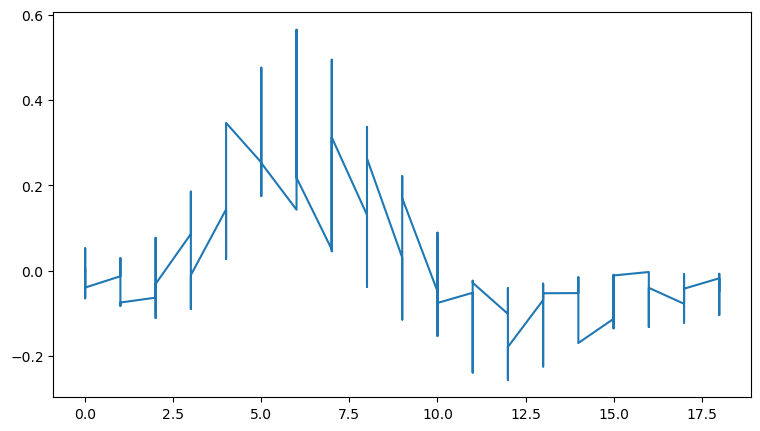

In [ ]:
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.show()

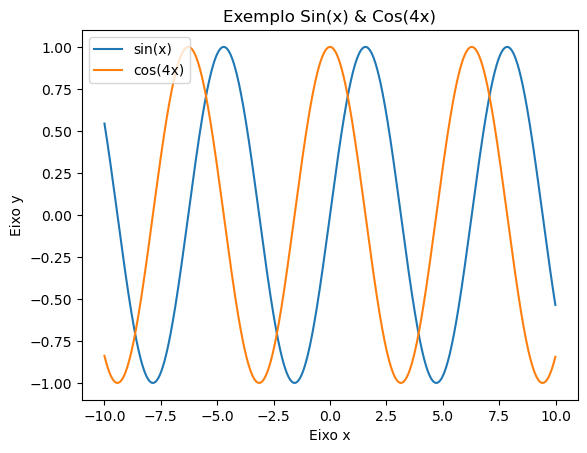

In [ ]:
x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(4x)')
# plt.plot(x, np.cos(4*x), label='cos(4x)')

plt.title('Exemplo Sin(x) & Cos(4x)')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.legend()

plt.show()

#### CUIDADOS

##### Gráfico com mais de um valor em x (1x mais de um valor em y)

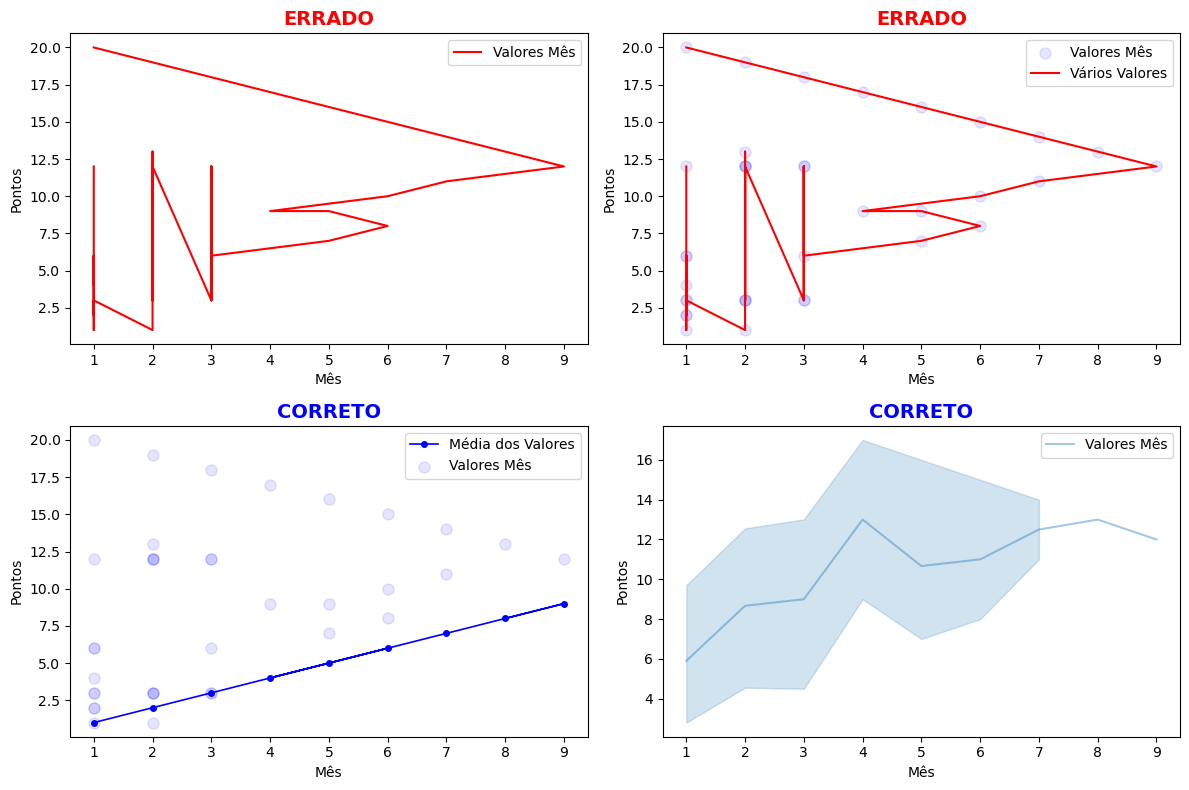

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8),sharex=True,sharey=True)

plt.subplot(2,2,1)
x = [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,5,6,5,4,6,7,9,8,7,6,5,4,3,2,1]
y = [12,3,2,6,4,6,2,1,3,1,3,12,3,13,12,3,12,3,12,3,12,6,7,8,9,9,10,11,12,13,14,15,16,17,18,19,20]
df = pd.DataFrame({'x': x, 'y': y})
plt.plot(df.x, df.y, label='Valores Mês', color='r')

plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,2)

plt.scatter(df.x, df.y, label='Valores Mês', marker='o', color='b', alpha=0.1, s=64)
plt.plot(df.x, df.y, label='Vários Valores', color='r')

plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,3)

# CALCULO DA MEDIA DE CADA VALOR DE X
yerr = []
ymean = []
for x in df.x.unique():
  yerr.append(df[df.x == x]['x'].std())
  ymean.append(df[df.x == x]['x'].mean())
yerr = np.array(yerr)
ymean = np.array(ymean)


plt.plot(df.x.unique(), ymean, label='Média dos Valores', marker='o', color='b', linewidth=1.2, markersize=4)
plt.scatter(df.x, df.y, label='Valores Mês', marker='o', color='b', alpha=0.1, s=64)

plt.title("CORRETO", fontsize=14, weight='bold', color='b')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,4)

sns.lineplot(x=df.x, y=df.y, label='Valores Mês', alpha=0.4)

plt.title("CORRETO", fontsize=14, weight='bold', color='b')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.tight_layout()
plt.show()

##### Cuidado Valores sem ordem + plot

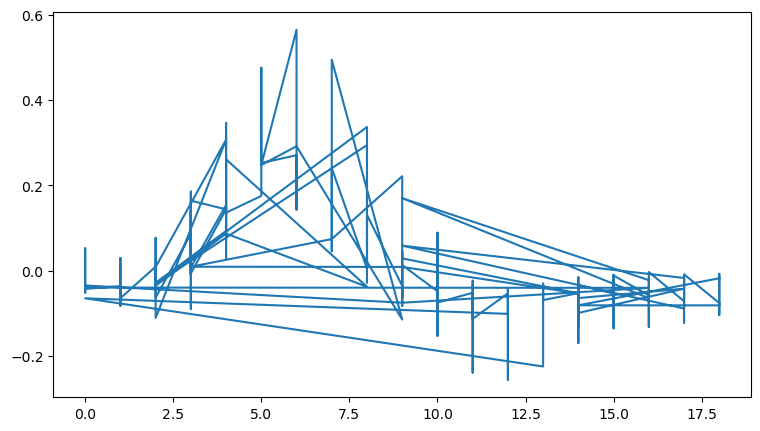

In [ ]:
fig = plt.figure(figsize=(9,5))

mask = (fmri.event == 'stim') & (fmri.region == 'parietal')
x = fmri[mask].timepoint
y = fmri[mask].signal

plt.plot(x,y)
plt.show()

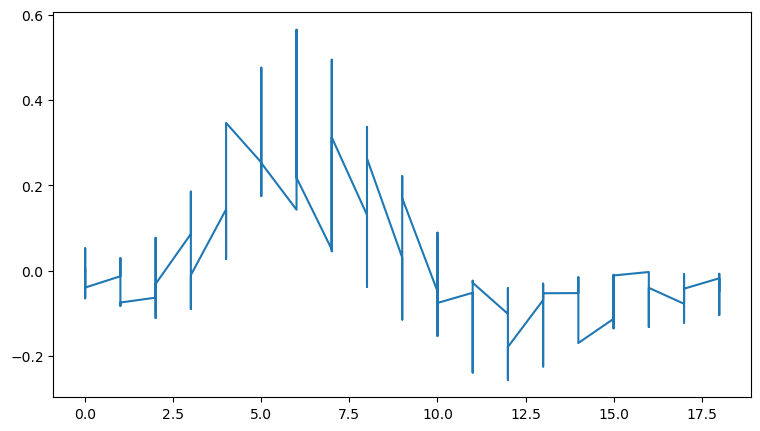

In [ ]:
df1 = df1.sort_values('timepoint')
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.show()

## plt.scatter()

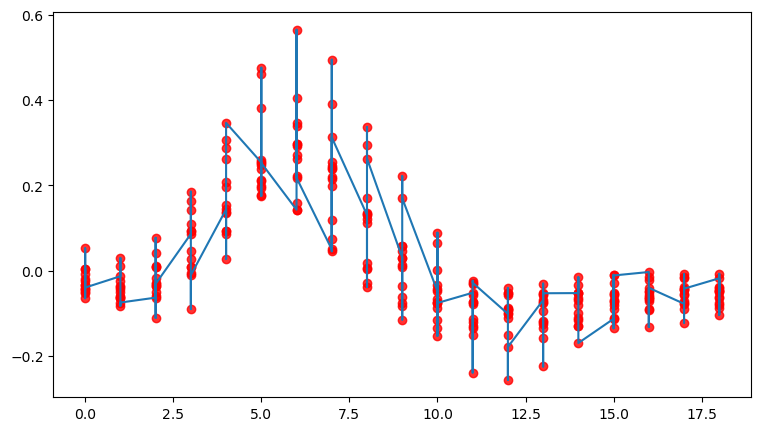

In [ ]:
fig = plt.figure(figsize=(9,5))

mask = (df1.event == 'stim') & (df1.region == 'parietal')
x = df1[mask].timepoint
y = df1[mask].signal

plt.plot(x,y)
plt.scatter(x,y,color='r',alpha=0.8)
plt.show()

## sns.lineplot()
plota com o intervalo de confiança

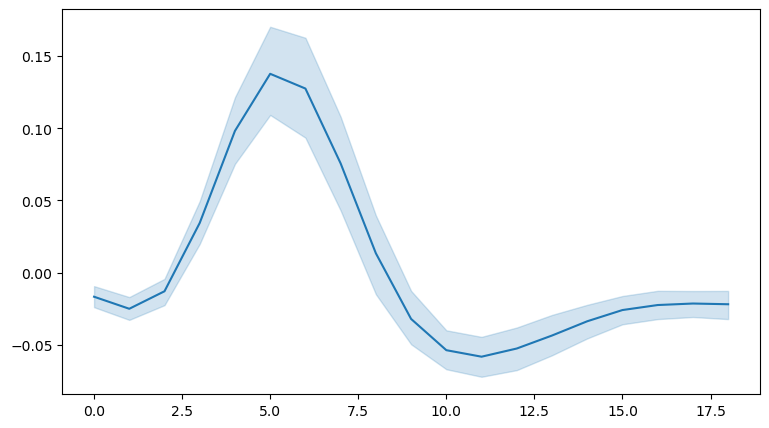

In [ ]:
fig = plt.figure(figsize=(9,5))

x = df1.timepoint
y = df1.signal

sns.lineplot(x=x,y=y)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Grafico de Barras


In [74]:
beer.groupby("year").sum()["barrels"]

year
2008    3.693657e+08
2009    3.667230e+08
2010    3.624233e+08
2011    3.561490e+08
2012    3.608027e+08
2013    3.561728e+08
2014    3.547738e+08
2015    3.520821e+08
2016    3.488605e+08
2017    3.413586e+08
2018    3.337783e+08
2019    3.341545e+08
Name: barrels, dtype: float64

In [75]:
beer.groupby("year").max()["barrels"]

year
2008    1.669300e+08
2009    1.654322e+08
2010    1.629721e+08
2011    1.597082e+08
2012    1.616927e+08
2013    1.594136e+08
2014    1.585425e+08
2015    1.570146e+08
2016    1.554157e+08
2017    1.515075e+08
2018    1.481006e+08
2019    1.485906e+08
Name: barrels, dtype: float64

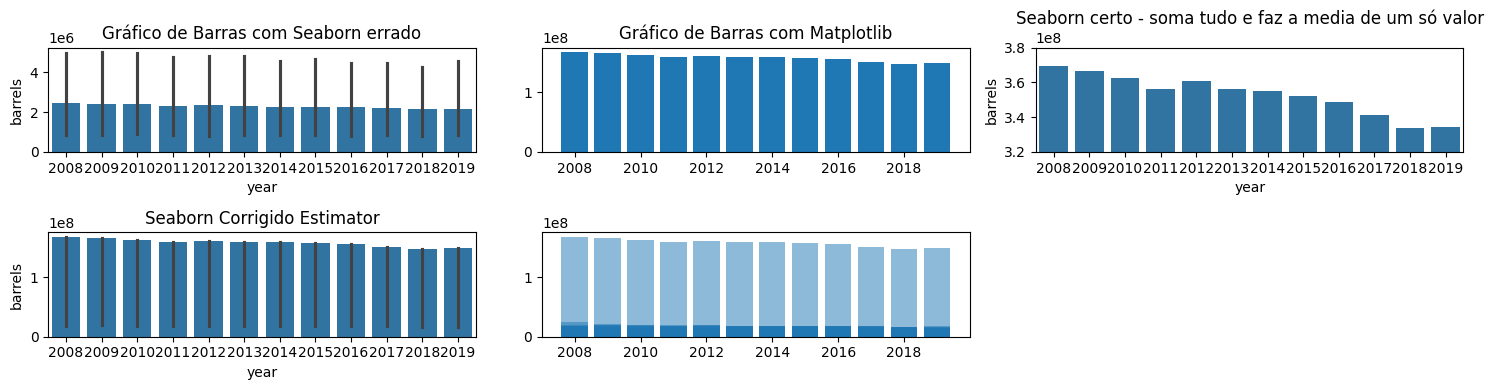

In [84]:
plt.figure(figsize=(15,4))

plt.subplot(2,3,1)
sns.barplot(x='year', y='barrels', data=beer).set_title('Gráfico de Barras com Seaborn errado')
plt.subplot(2,3,2)

plt.bar(x='year', height='barrels', data=beer)
plt.title('Gráfico de Barras com Matplotlib')

plt.subplot(2,3,3)

# sns.barplot(x='year', y='barrels', data=beer.groupby('year')[['barrels']].sum()).set_title('Gráfico de Barras com Seaborn certo') # funciona no colab do google
sns.barplot(x='year', y='barrels', data=beer.groupby('year')[['barrels']].sum().reset_index()).set_title('Seaborn certo - soma tudo e faz a media de um só valor')
plt.ylim([32e7, 38e7])

plt.subplot(2,3,4)

sns.barplot(x='year', y='barrels', data=beer, estimator='max' ).set_title('Seaborn Corrigido Estimator')
plt.subplot(2,3,5)


plt.bar(x='year', height='barrels', data=beer, alpha = 0.5) # mostra o valor max sobrescrevendo os demais

plt.tight_layout()
plt.show()

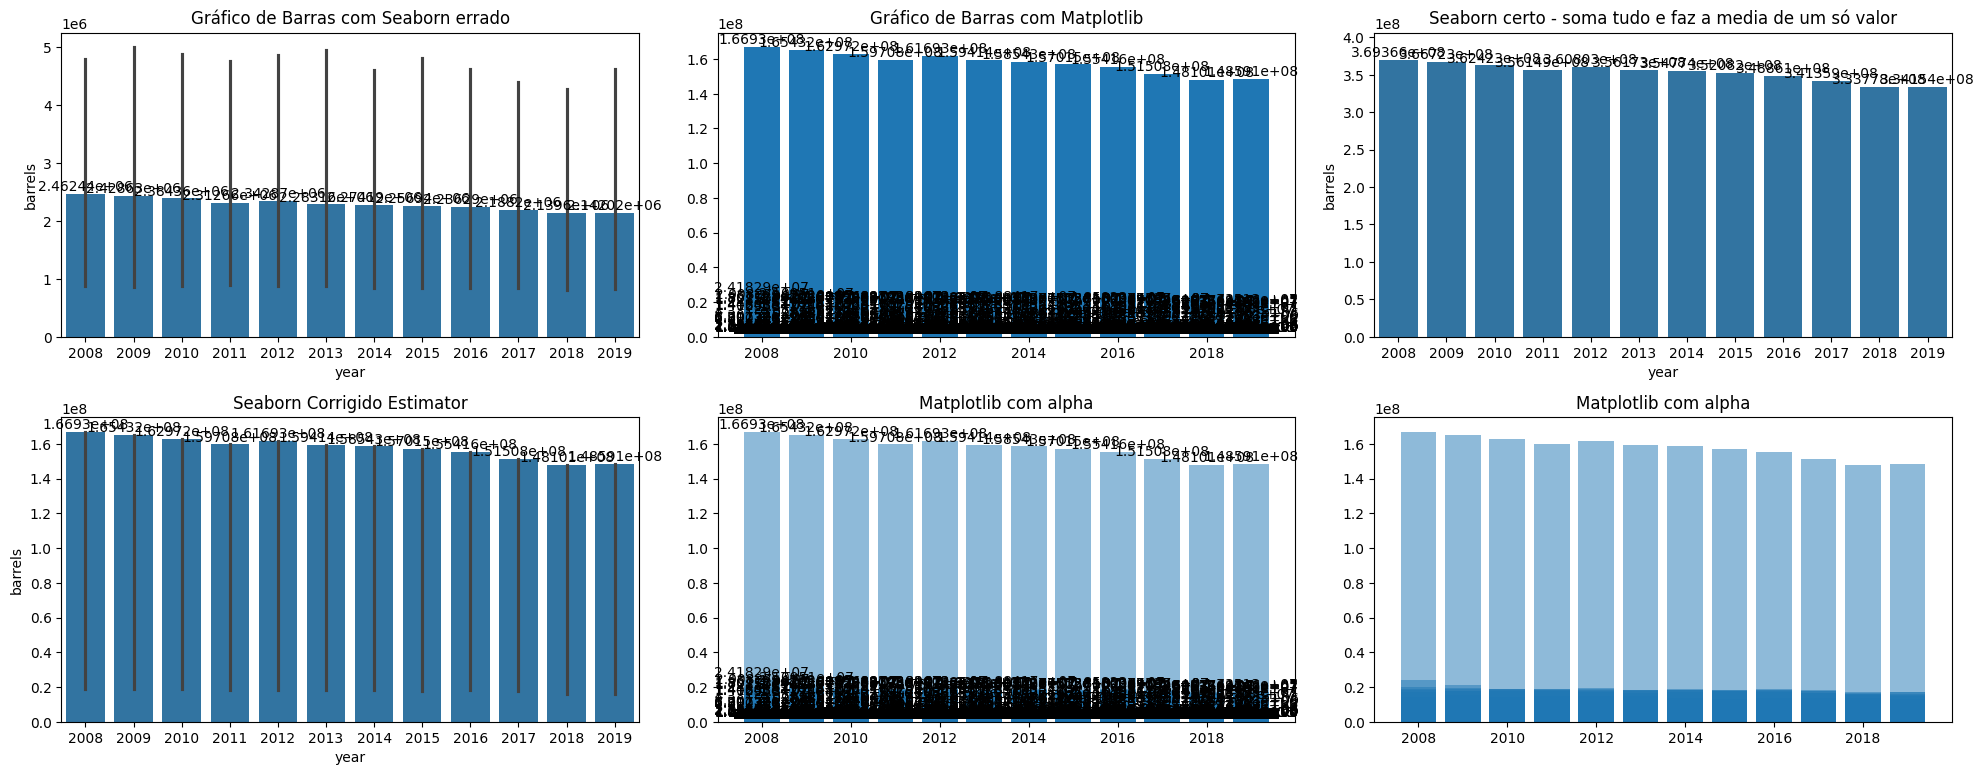

In [93]:

plt.figure(figsize=(20, 8))

# Gráfico 1: Gráfico de Barras com Seaborn errado
plt.subplot(2, 3, 1)
ax1 = sns.barplot(x='year', y='barrels', data=beer)
ax1.set_title('Gráfico de Barras com Seaborn errado')
ax1.bar_label(ax1.containers[0], fontsize=10)

# Gráfico 2: Gráfico de Barras com Matplotlib
plt.subplot(2, 3, 2)
bars = plt.bar(x=beer['year'], height=beer['barrels'])
plt.title('Gráfico de Barras com Matplotlib')

plt.bar_label(bars, fontsize=10)

# Gráfico 3: Seaborn certo - soma tudo e faz a media de um só valor
plt.subplot(2, 3, 3)
grouped_beer = beer.groupby('year')[['barrels']].sum().reset_index()
ax3 = sns.barplot(x='year', y='barrels', data=grouped_beer)
ax3.set_title('Seaborn certo - soma tudo e faz a media de um só valor')
plt.ylim([0, grouped_beer['barrels'].max() * 1.1])
ax3.bar_label(ax3.containers[0], fontsize=10)

# Gráfico 4: Seaborn Corrigido Estimator
plt.subplot(2, 3, 4)
ax4 = sns.barplot(x='year', y='barrels', data=beer, estimator=np.max)
ax4.set_title('Seaborn Corrigido Estimator')
ax4.bar_label(ax4.containers[0], fontsize=10)

# Gráfico 5: Matplotlib com alpha
plt.subplot(2, 3, 5)
bars = plt.bar(x=beer['year'], height=beer['barrels'], alpha=0.5)
plt.title('Matplotlib com alpha')
plt.bar_label(bars, fontsize=10)

# Gráfico 5: Matplotlib com alpha
plt.subplot(2, 3, 6)
bars = plt.bar(x=beer['year'], height=beer['barrels'], alpha=0.5)
plt.title('Matplotlib com alpha')


plt.tight_layout()
plt.show()


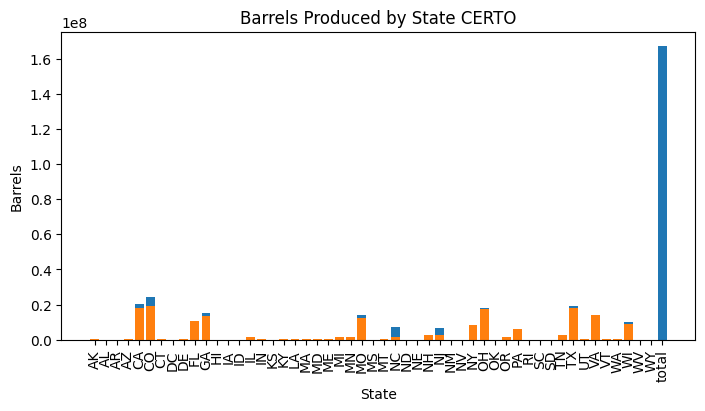

In [76]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,2)

plt.bar(beer.state, beer.barrels)
plt.xlabel('State')
plt.ylabel('Barrels')
plt.title('Barrels Produced by State ERRADO')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
beer_barrels_by_state = beer[ (beer.state != 'total') & (beer.year == 2019) ].groupby('state')['barrels'].sum().sort_values(ascending=False)

plt.bar(beer_barrels_by_state.index, beer_barrels_by_state.values)
plt.xlabel('State')
plt.ylabel('Barrels')
plt.title('Barrels Produced by State CERTO')
plt.xticks(rotation=90)
plt.show()


### Classificando em categorias sns

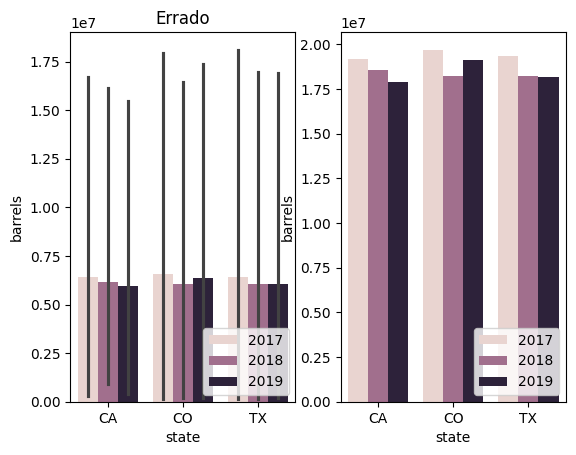

In [77]:
plt.subplot(1,2,1)

sns.barplot(x = 'state', y = 'barrels', hue = 'year',
            data = beer[beer['state'].isin(['TX', 'CO', 'CA']) & (beer['year'] >= 2017)]).set_title('Errado')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
beer_3 = beer[beer['state'].isin(['TX', 'CO', 'CA']) & (beer['year'] >= 2017)].groupby(['state', 'year'])['barrels'].sum().reset_index()
sns.barplot(x = 'state', y = 'barrels', hue = 'year', data = beer_3)
plt.legend(loc='lower right')
plt.show()
plt.show()

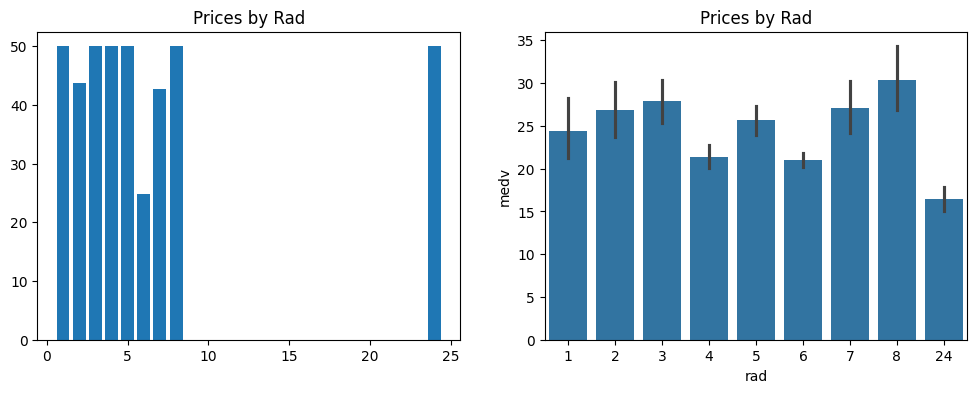

In [78]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

# depois tente empregar boston2 no matplotlib e entenda a diferença
# boston2 = boston.copy()
# boston2.rad = boston.rad.astype('str')


ax[0].bar(x='rad',height='medv',data=boston)
ax[0].set_title('Prices by Rad')

sns.barplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Prices by Rad')

plt.show()

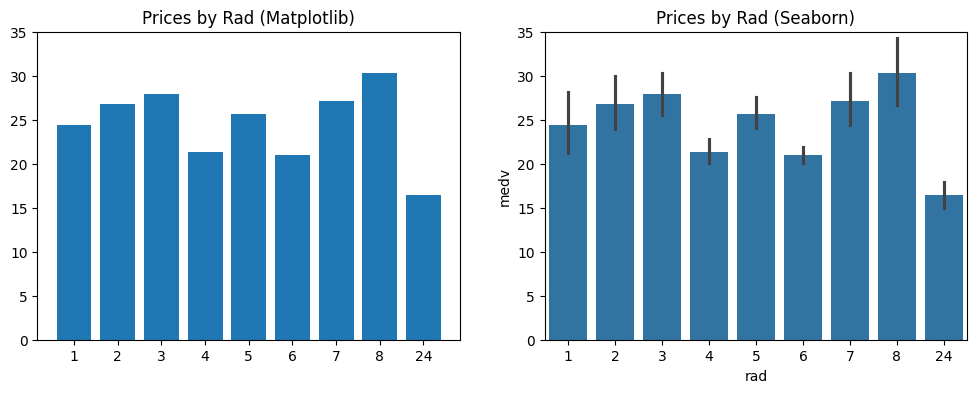

In [79]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
boston_group= boston.groupby('rad').medv.mean()

ax[0].bar(x=np.arange(0,len(boston_group)),height=boston_group)
ax[0].set_xticks(np.arange(0,len(boston_group)), labels=boston_group.index)
ax[0].set_title('Prices by Rad (Matplotlib)')
ax[0].set_ylim([0,35])

# sns.barplot(x='rad',y='medv',data=boston,ax=ax[1],errorbar=None)
sns.barplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Prices by Rad (Seaborn)')
ax[1].set_ylim([0,35])

plt.show()

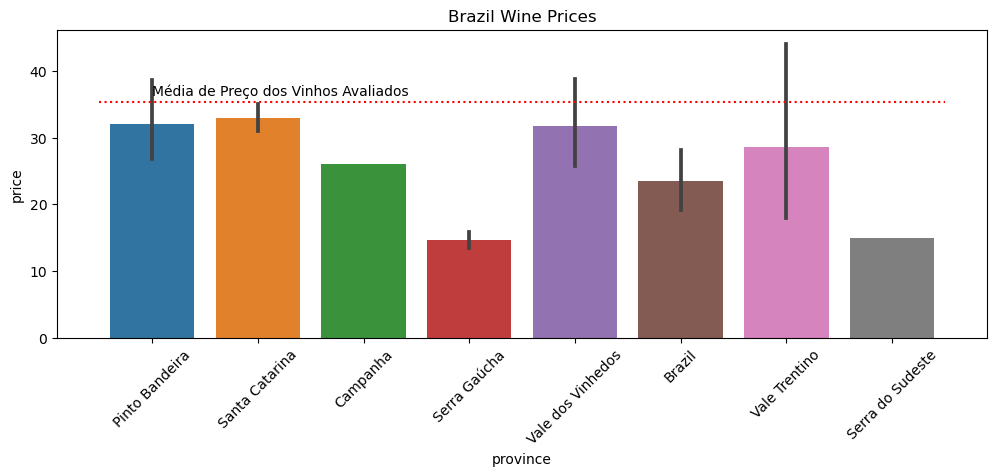

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country == 'Brazil'].price)
plt.title('Brazil Wine Prices')
plt.hlines(wine.price.mean(),-0.5,7.5,color='r',linestyles=':')
plt.text(0, wine.price.mean()+1,'Média de Preço dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.show()

CUIDADO

Novamente a visualização falha em mostrar adequadamente os dados, mas aqui o refinamento é bastante simples e basta reconfigurarmos os limites do eixo de pontos.

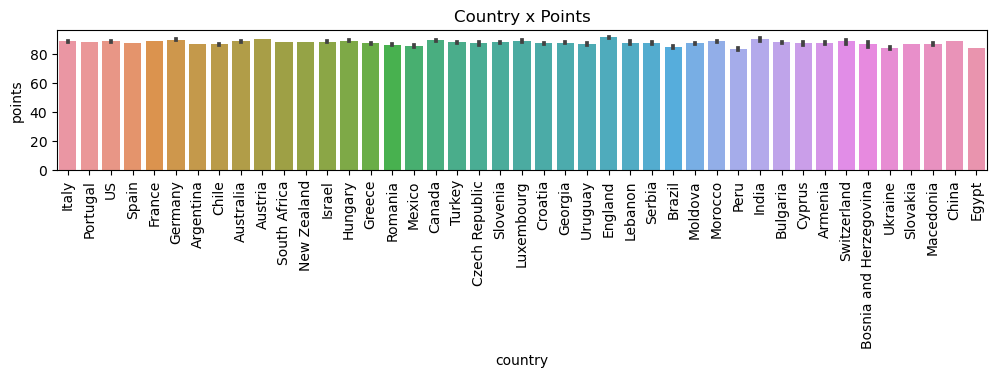

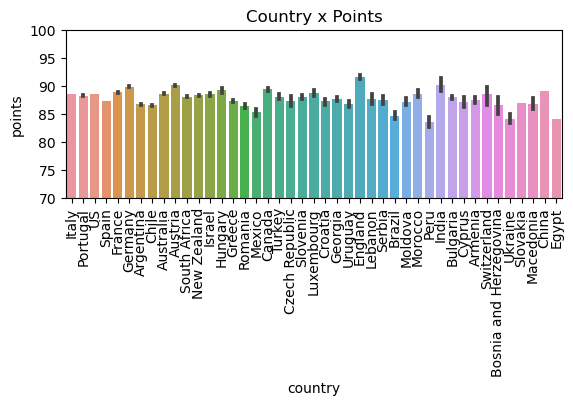

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(2,1,1)
sns.barplot(x=wine.country, y=wine.points)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.show()

plt.subplot(2,1,2)
sns.barplot(x='country', y='points', data=wine)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()

##### Enfeites

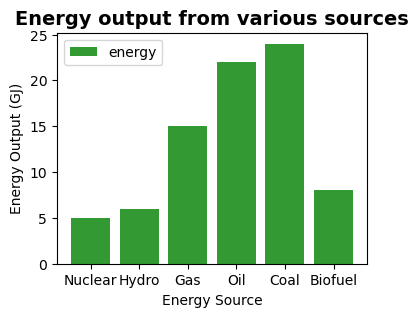

In [ ]:
# Basico
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 30, 30, 12, 14, 6.7]

plt.bar(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')

plt.show()

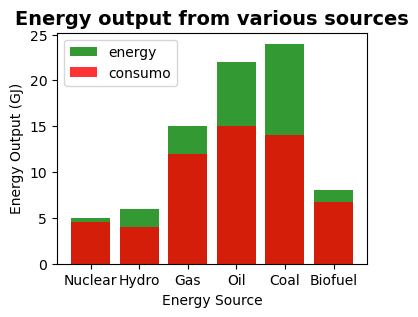

In [ ]:
# Sobreposição de barras
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 4, 12, 15, 14, 6.7]

plt.bar(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.bar(energy_type, consumo, color='red',alpha=0.8,label='consumo')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')

plt.show()

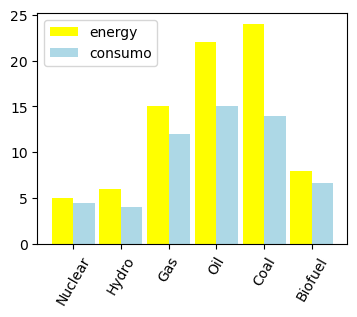

In [ ]:
# barras paralelas

plt.figure(figsize=(4,3))

ind = np.arange(len(energy))
barwidth = 0.45

plt.bar(ind, energy, barwidth, label='energy', color='yellow')
plt.bar(ind + barwidth, consumo, barwidth, label='consumo', color='lightblue')

plt.xticks(ind + barwidth / 2,energy_type, rotation=60)
plt.legend()


plt.show()
#  seaborn com hue.

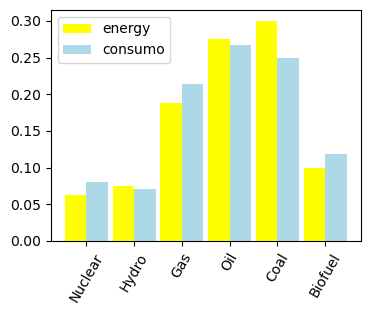

In [ ]:
# Porporcional

plt.figure(figsize=(4,3))

ind = np.arange(len(energy))
barwidth = 0.45

plt.bar(ind, np.array(energy)/np.array(energy).sum(), barwidth, label='energy', color='yellow')
plt.bar(ind + barwidth, np.array(consumo)/np.array(consumo).sum(), barwidth, label='consumo', color='lightblue')

plt.xticks(ind + barwidth / 2,energy_type, rotation=60)
plt.legend()


plt.show()

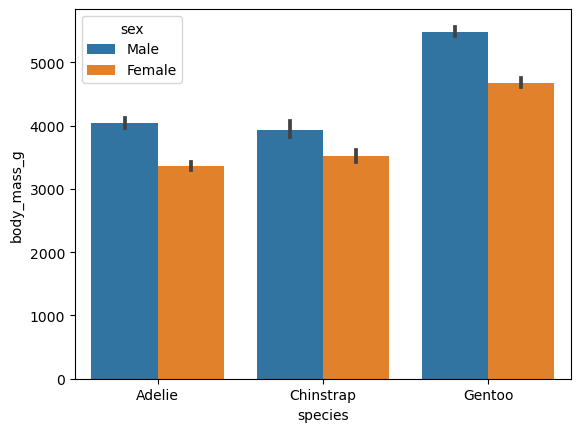

In [ ]:
sns.barplot(x='species',y='body_mass_g',hue='sex',data=penguins)
plt.show()

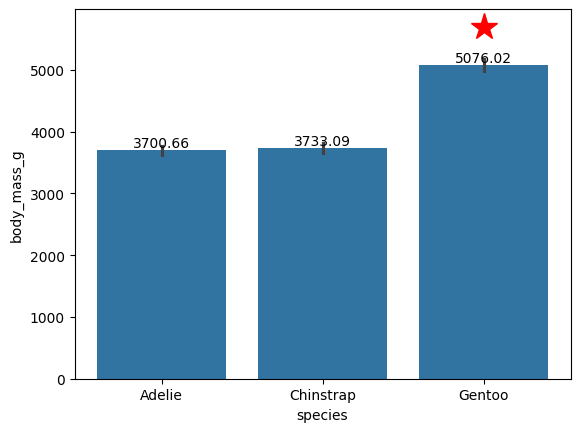

In [80]:
# ax = sns.barplot(x='species',y='body_mass_g',data=penguins, errorbar=None)
ax = sns.barplot(x='species',y='body_mass_g',data=penguins)
ax.bar_label(ax.containers[0], fontsize=10)
ax.plot(2, 5700, "*", markersize=20, color="r")

plt.show()

## Histogramas


plt.hist(df.body_mass_g, density=True, cumulative=True, bins=20)

density => area = 1 

cumulative = prob acumulada

bins = numero de barras


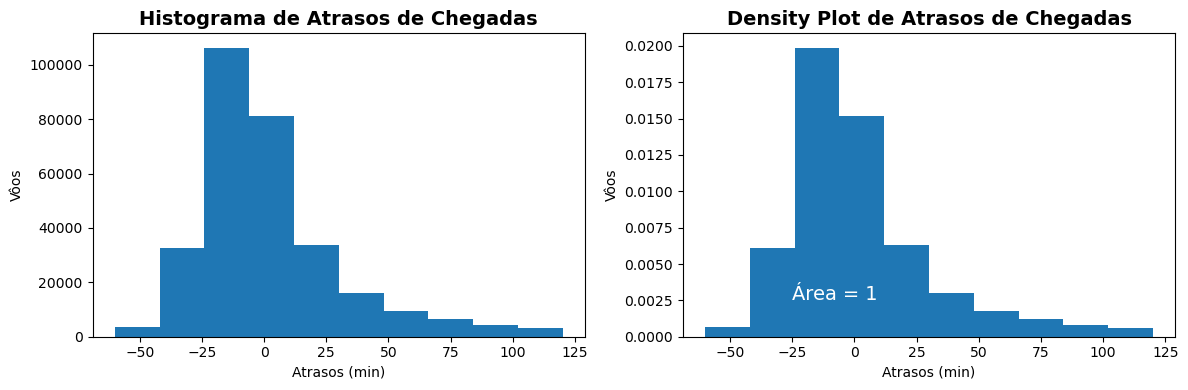

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'])

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

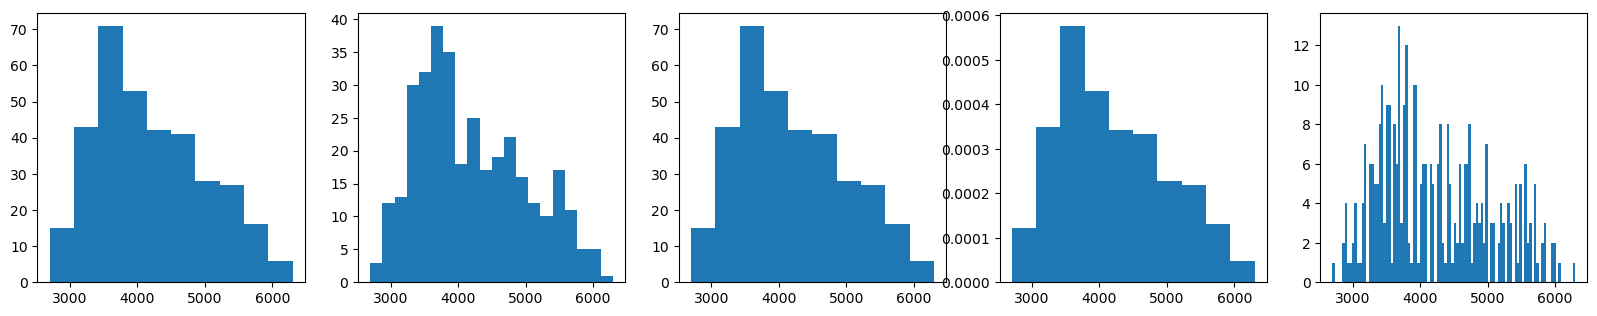

(array([15., 43., 71., 53., 42., 41., 28., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]))

In [ ]:
# plt.figure(figsize=(4,3.5))
plt.figure(figsize=(20,3.5))
df = penguins
plt.subplot(1,5,1)
valores = plt.hist(df.body_mass_g)
plt.subplot(1,5,2)
plt.hist(df.body_mass_g, bins=20) # bins numero de colunas
plt.subplot(1,5,3)
plt.hist(df.body_mass_g)

plt.subplot(1,5,4)
plt.hist(df.body_mass_g, density=True) # mostra o valor total da area como 1
plt.subplot(1,5,5)

plt.hist(df.body_mass_g, bins=100)

plt.show()
valores[0], valores[1]

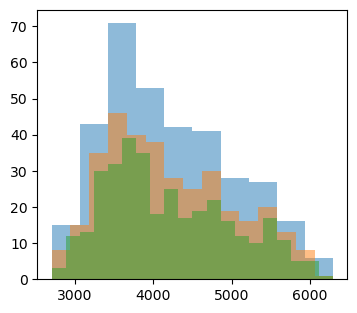

In [ ]:
plt.figure(figsize=(4,3.5))
# alpha
plt.hist(df.body_mass_g, alpha=.5)
plt.hist(df.body_mass_g, bins=15, alpha=.5)
plt.hist(df.body_mass_g, bins=20, alpha=.5)

plt.show()

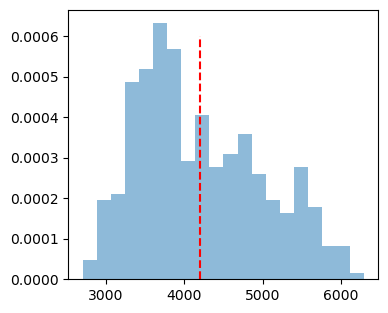

In [ ]:
plt.figure(figsize=(4,3.5))

plt.hist(df.body_mass_g, bins=20, density=True, alpha=0.5)
plt.vlines(df.body_mass_g.mean(), 0, 0.0006, color='r', linestyle='dashed')

plt.show()

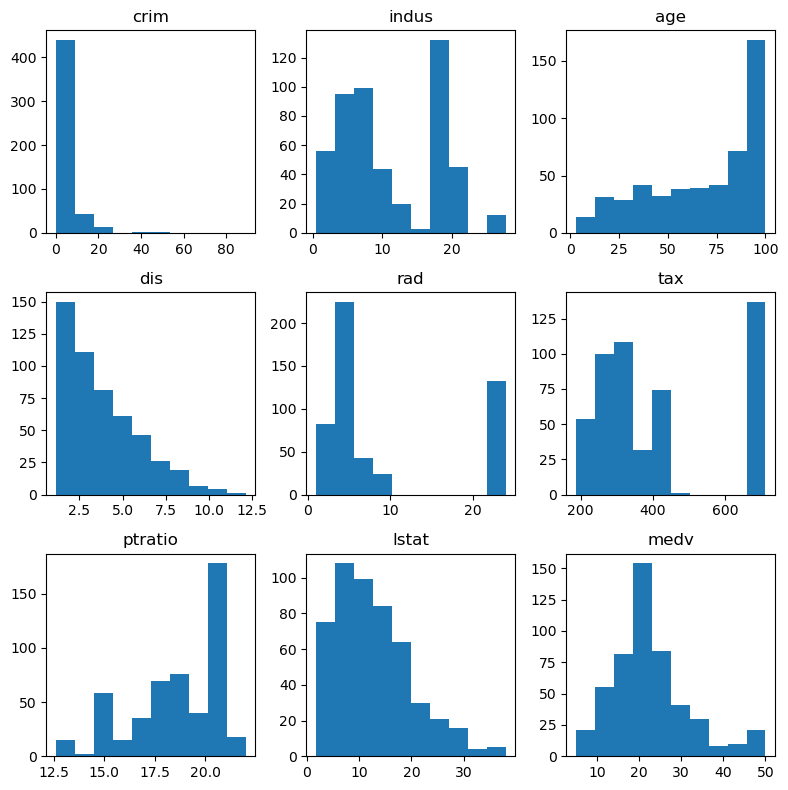

In [ ]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  ax[i].hist(boston[cols[i]])
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

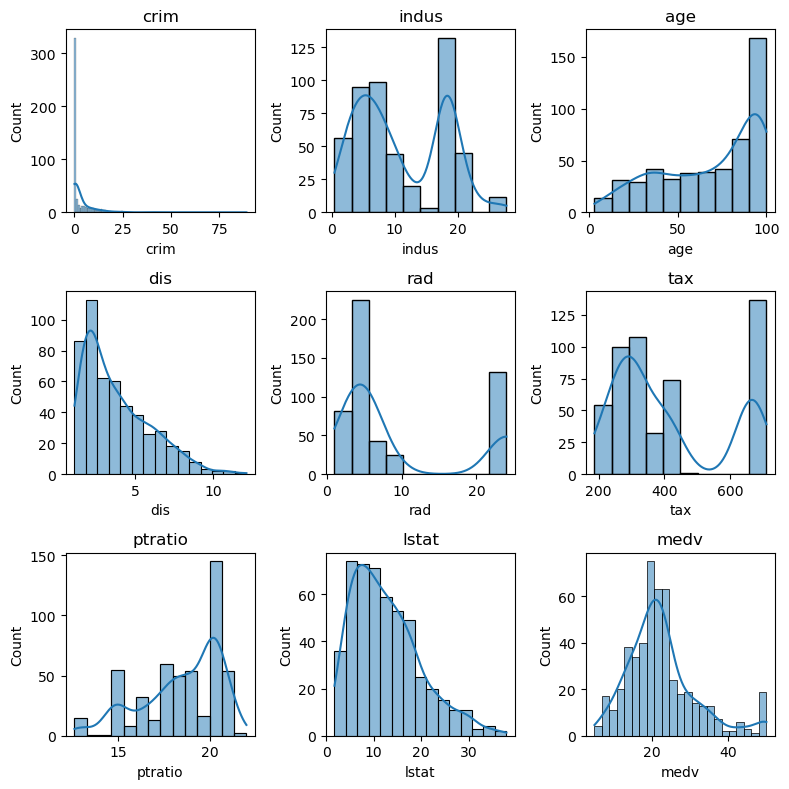

In [ ]:
fig, axis = plt.subplots(3,3, figsize=(8,8))

ax = axis.reshape(-1)

cols = ['crim', 'indus', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

for i in range(len(cols)):
  sns.histplot(boston[cols[i]],ax=ax[i],kde=True)
  ax[i].set_title(cols[i])

plt.tight_layout()
plt.show()

#### Histograma Acumulativo



plt.hist(df.body_mass_g, density=True, cumulative=True, bins=20)

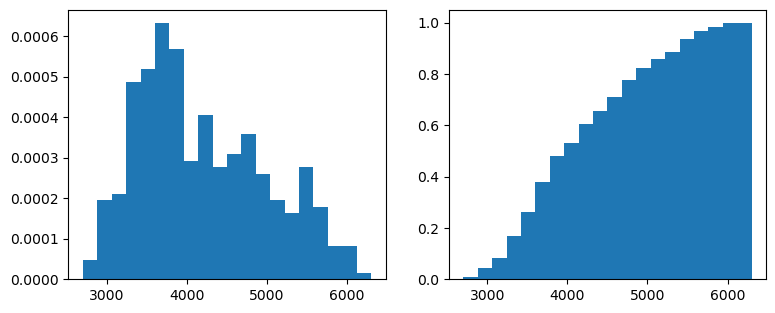

In [ ]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
plt.hist(df.body_mass_g, density=True, bins=20)

plt.subplot(1,2,2)
plt.hist(df.body_mass_g, density=True, cumulative=True, bins=20)

plt.show()

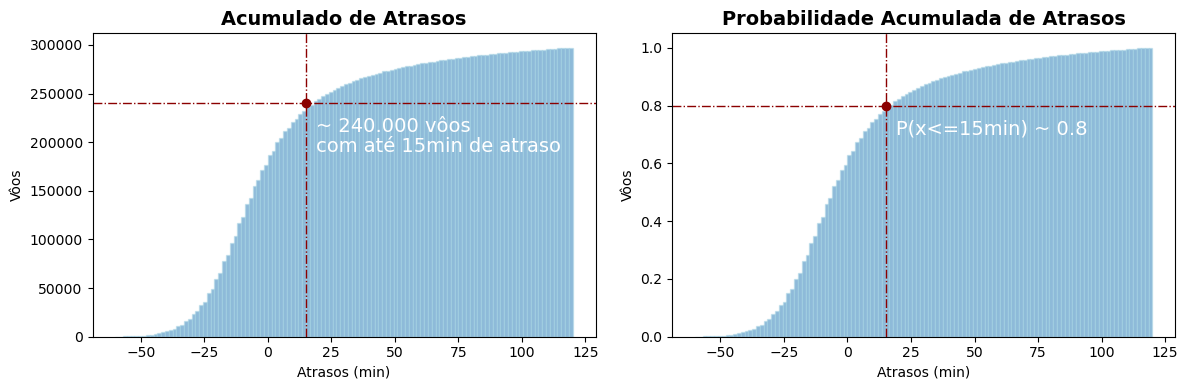

In [ ]:
plt.figure(figsize=(12,4))

binwidth=5
interval =600
plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor = 'lightblue',cumulative=True,alpha=0.5)

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(240000, linewidth=1,linestyle='-.',color='darkred')
plt.plot(15,240000,'o',color='darkred')
plt.text(19, 210000, '~ 240.000 vôos', fontsize=14,color='w')
plt.text(19, 190000, 'com até 15min de atraso', fontsize=14,color='w')

# Anotações
plt.title('Acumulado de Atrasos', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',cumulative=True,alpha=0.5)

# Anotações
plt.title('Probabilidade Acumulada de Atrasos', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(0.8, linewidth=1,linestyle='-.',color='darkred')
plt.plot(15,0.8,'o',color='darkred')
plt.text(19, 0.7, 'P(x<=15min) ~ 0.8', fontsize=14,color='w')

plt.tight_layout()
plt.show()

#### Seaborn

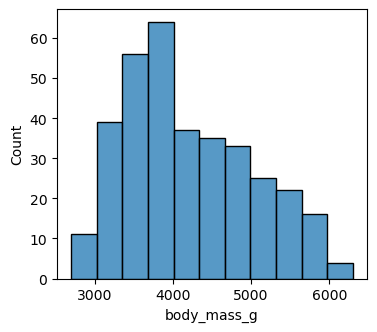

In [ ]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g)

plt.show()

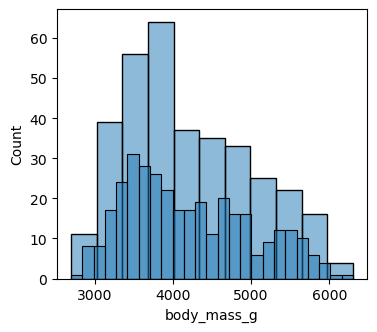

In [ ]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g,alpha=0.5)
sns.histplot(df.body_mass_g,bins=25,alpha=0.5)

plt.show()

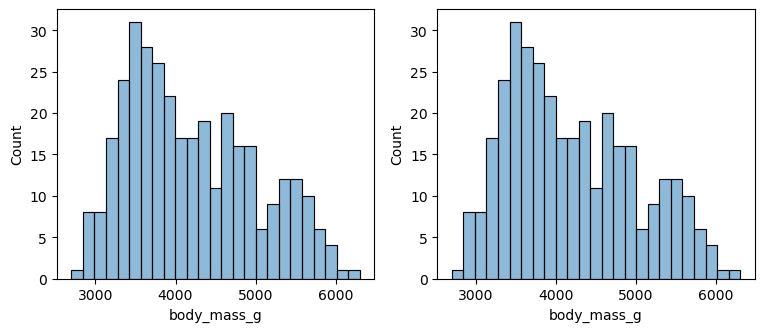

In [ ]:
#Usando e não usando data=
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
sns.histplot(df.body_mass_g,bins=25,alpha=0.5)

plt.subplot(1,2,2)
sns.histplot(x='body_mass_g',data=df,bins=25,alpha=0.5)

plt.show()

### Seaborn hue  ×  Matplotlib

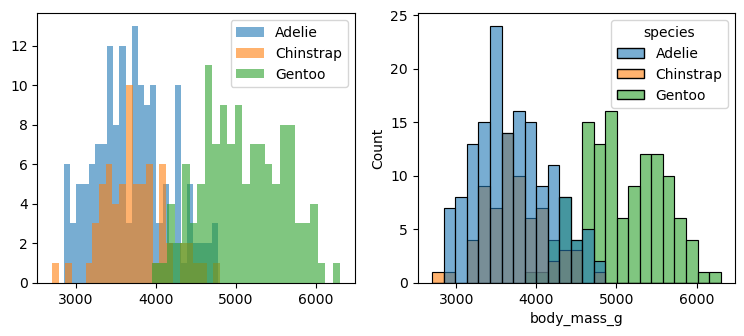

In [ ]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
for s in df.species.unique():
  plt.hist(df[ df.species == s ].body_mass_g, bins=25, alpha=0.6,label=s)

plt.legend()

plt.subplot(1,2,2)
sns.histplot(x='body_mass_g',data=df,hue='species',bins=25,alpha=0.6)

plt.show()

###### Lembre de com empregar ax no Seaborn e Matplotlib

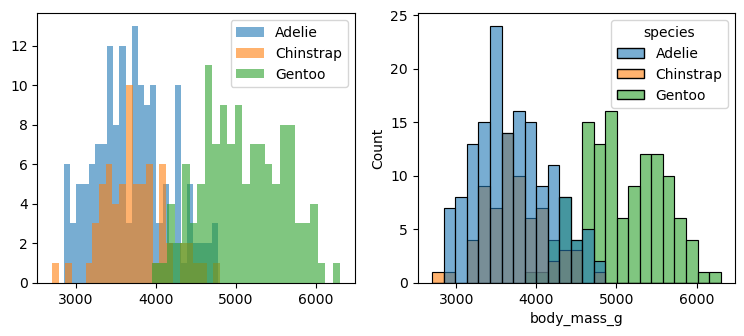

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(9,3.5))

for s in df.species.unique():
  ax[0].hist(df[ df.species == s ].body_mass_g, bins=25, alpha=0.6,label=s)

ax[0].legend()

sns.histplot(x='body_mass_g',data=df,hue='species',bins=25,alpha=0.6,ax=ax[1])

plt.show()

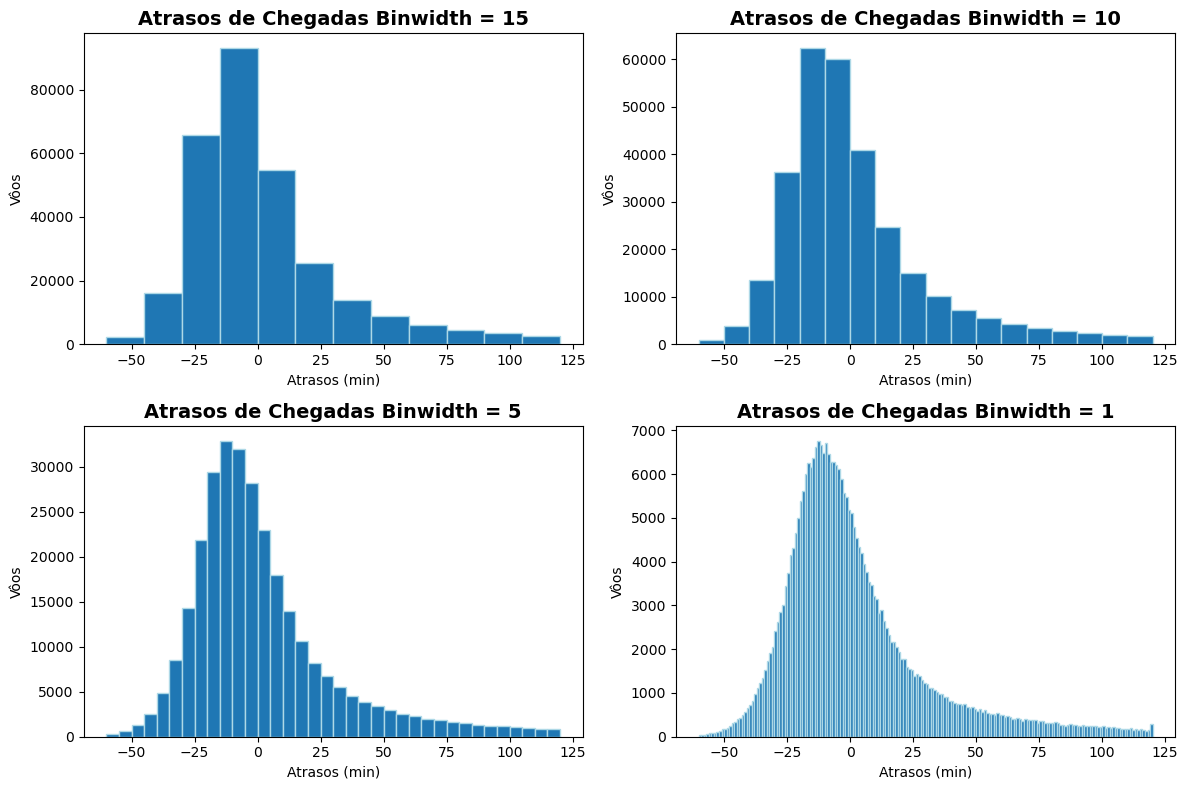

In [ ]:
plt.figure(figsize=(12,8))

for i, binwidth in enumerate([15, 10, 5, 1]):
  plt.subplot(2, 2, i + 1)

  interval = flights['arr_delay'].max() - flights['arr_delay'].min()
  plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor = 'lightblue')

  # Anotações
  plt.title('Atrasos de Chegadas Binwidth = %d' % binwidth, fontsize=14, weight='bold')
  plt.xlabel('Atrasos (min)')
  plt.ylabel('Vôos')

plt.tight_layout()
plt.show()

Os bins correspondem a quantidade dos intervalos de valores que estamos interessados. A medida que aumentamos a quantidade de intervalos o gráfico de barras se aproxima de um gráfico de valores contínuos.

Você também pode definir bins com intervalos de diferentes tamanhos, e fica evidente nos gráficos abaixo a maior probabilidade de vôos adiantados que com atraso. Neste caso você não pode esperar a mesma forma nos dois gráficos.

In [ ]:
# top3 e low3 Companhias
companhias = pd.Series(flights.groupby('name')['name'].count())
companhias = companhias.sort_values(ascending=False)
top3 = companhias.index[:3]
low3 = companhias.index[-3:]

print('Top 3 Companhias', top3)
print('Low 3 Companhias', low3)

Top 3 Companhias Index(['United Air Lines Inc.', 'JetBlue Airways',
       'Atlantic Southeast Airlines'],
      dtype='object', name='name')
Low 3 Companhias Index(['Frontier Airlines Inc.', 'Hawaiian Airlines Inc.',
       'Skywest Airlines Inc.'],
      dtype='object', name='name')


In [ ]:
from scipy.stats import kde

/tmp/ipykernel_79423/3093411278.py:18: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(serie)
/tmp/ipykernel_79423/3093411278.py:48: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(serie)


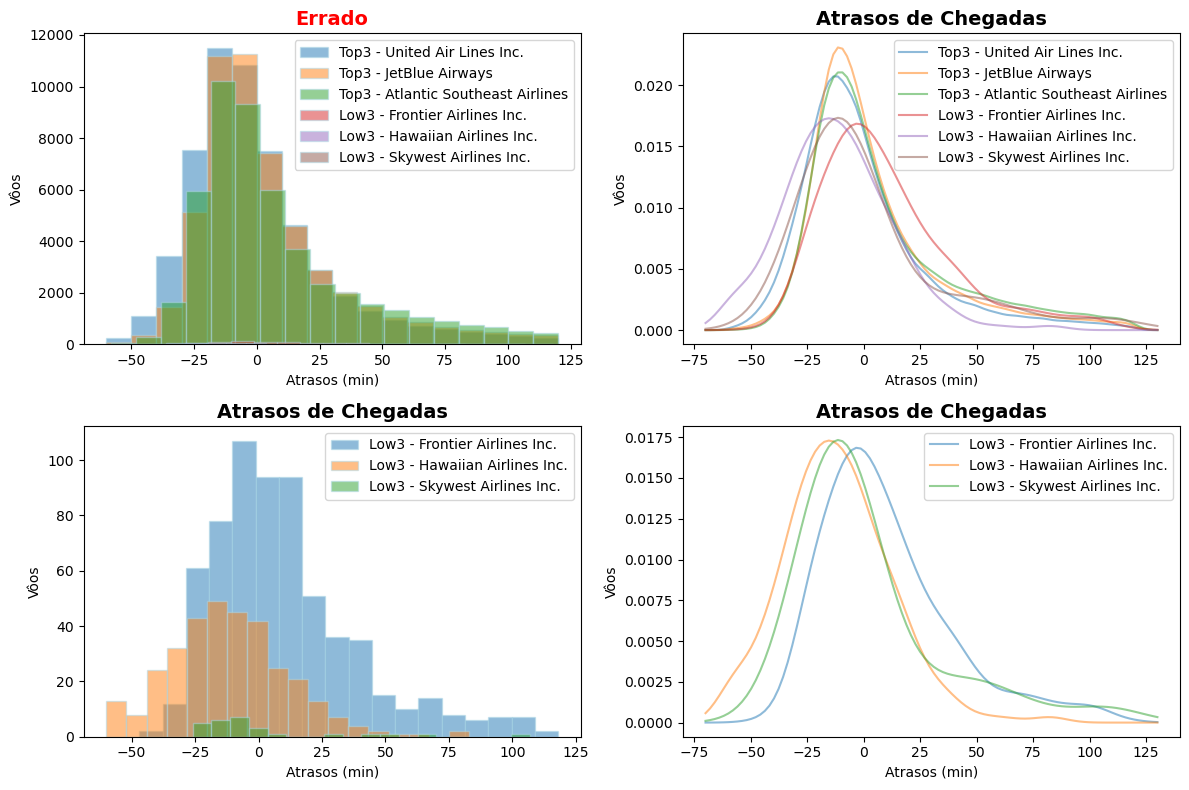

In [ ]:
plt.figure(figsize=(12,8))

binwidth=10

plt.subplot(2,2,1)
for companhia in top3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Top3 - ' + companhia)
for companhia in low3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Errado', fontsize=14, weight='bold', color='r')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

def density(serie, xmin=0, xmax=100, intervals=100):
  density = kde.gaussian_kde(serie)
  x = np.linspace(xmin,xmax,100)
  y = density(x)
  return x, y

plt.subplot(2,2,2)
for companhia in top3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Top3 - ' + companhia)
for companhia in low3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.subplot(2,2,3)
for companhia in low3:
  plt.hist(flights[ flights.name == companhia ]['arr_delay'], bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

def density(serie, xmin=0, xmax=100, intervals=100):
  density = kde.gaussian_kde(serie)
  x = np.linspace(xmin,xmax,100)
  y = density(x)
  return x, y

plt.subplot(2,2,4)
for companhia in low3:
  x, y = density(flights[ flights.name == companhia ]['arr_delay'],-70,130)
  plt.plot(x,y,alpha=0.5,label='Low3 - ' + companhia)

# Anotações
plt.title('Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.tight_layout()
plt.show()

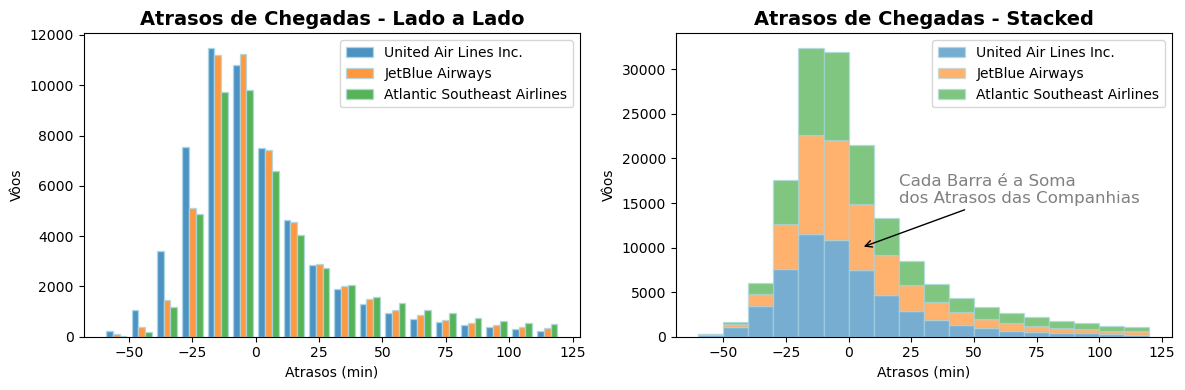

In [ ]:
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) # evita msg de warning para listas com elementos de tamahos diferentes
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
list_hist = []
for companhia in top3:
  list_hist.append(flights[ flights.name == companhia ]['arr_delay'])

plt.hist(list_hist, bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.8, label=top3)

# Anotações
plt.title('Atrasos de Chegadas - Lado a Lado', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.subplot(1,2,2)
plt.hist(list_hist, bins=int(interval/binwidth), edgecolor = 'lightblue',alpha=0.6, label=top3, stacked=True)

# Anotações
plt.annotate('Cada Barra é a Soma\ndos Atrasos das Companhias',
             xy=(5, 10000),  # ponto do gráfico
             xytext=(20, 15000),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=12,
             color='grey')

plt.title('Atrasos de Chegadas - Stacked', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.legend()

plt.tight_layout()
plt.show()

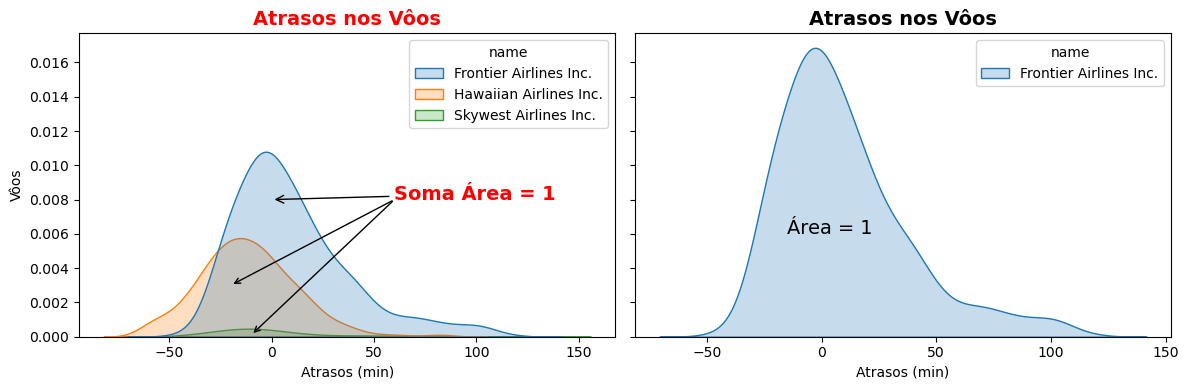

In [ ]:
f, axs = plt.subplots(1,2,figsize=(12,4),sharey=True)

sns.kdeplot(data=flights[ flights.name.isin(low3) ], x='arr_delay', hue='name', shade=True, ax=axs[0])
axs[0].set_title('Atrasos nos Vôos', fontsize=14, weight='bold', color='r')
axs[0].set_xlabel('Atrasos (min)')
axs[0].set_ylabel('Vôos')

sns.kdeplot(data=flights[ flights.name == low3[0] ], x='arr_delay', hue='name', shade=True, ax=axs[1])
axs[1].set_title('Atrasos nos Vôos', fontsize=14, weight='bold')
axs[1].set_xlabel('Atrasos (min)')
axs[1].set_ylabel('Vôos')

# Anotações
axs[0].annotate('Soma Área = 1',
             xy=(0, 0.008),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=14, color='r', weight='bold')
axs[0].annotate('',
             xy=(-20, 0.003),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"))
axs[0].annotate('',
             xy=(-10, 0.0001),  # ponto do gráfico
             xytext=(60, 0.008),   # posição do texto
             arrowprops=dict(arrowstyle="->"))
axs[1].text(-15, 0.006, 'Área = 1', fontsize=14, color='k')


plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


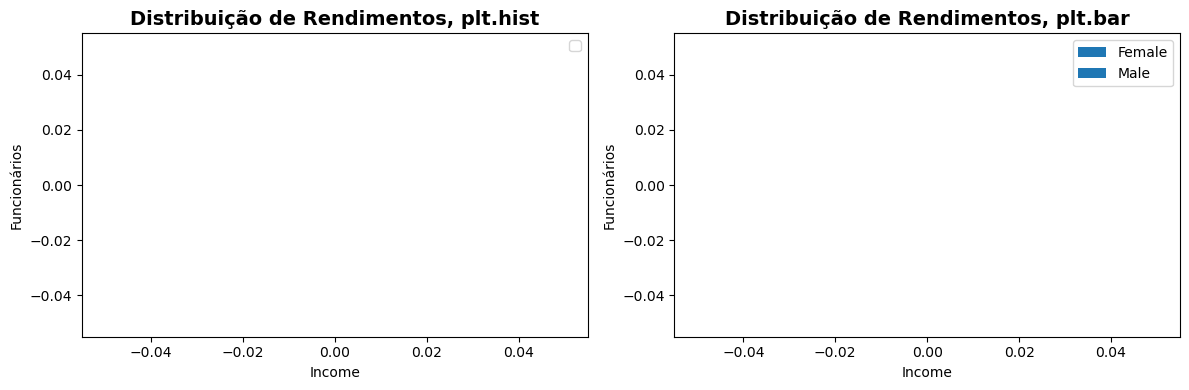

In [ ]:
plt.figure(figsize=(12,4))
colors = {'Male':'lightblue', 'Female':'r'}
maxin, minin = gdoor.income.agg({'max','min'})

plt.subplot(1,2,1)

for sexo in gdoor.gender.unique():
  plt.hist(gdoor[gdoor.gender == sexo].income, bins=np.arange(minin,maxin,5000), edgecolor = 'white', label=sexo, color=colors[sexo], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.hist', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.subplot(1,2,2)

for sexo in gdoor.gender.unique():
  h = np.histogram(gdoor[gdoor.gender == sexo].income, bins=np.arange(minin,maxin,5000))
  plt.bar(x=h[1][1:], height=h[0],  edgecolor = 'white', label=sexo, width=5000, color=colors[sexo], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.tight_layout()
plt.show()

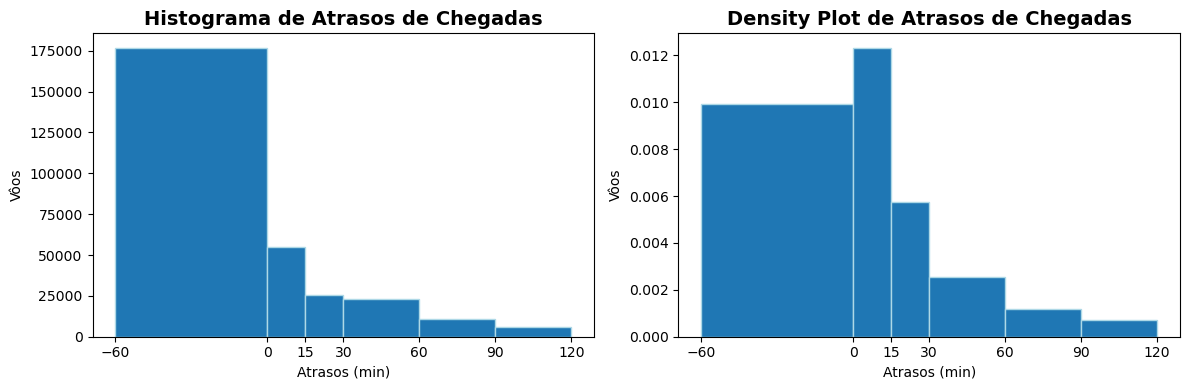

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=[-60,0,15,30,60,90,120],edgecolor = 'lightblue')

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.xticks([-60,0,15,30,60,90,120])

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=[-60,0,15,30,60,90,120],edgecolor = 'lightblue')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.xticks([-60,0,15,30,60,90,120])

plt.tight_layout()
plt.show()

##### KDE

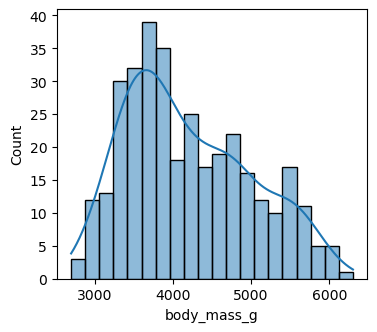

In [ ]:
plt.figure(figsize=(4,3.5))

sns.histplot(df.body_mass_g,kde=True,bins=20,alpha=0.5)

plt.show()

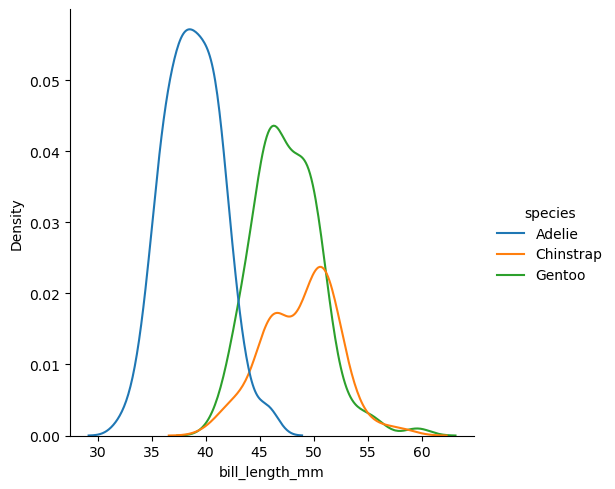

In [ ]:
sns.displot(x='bill_length_mm',data=df,hue='species',kind='kde')

plt.show()

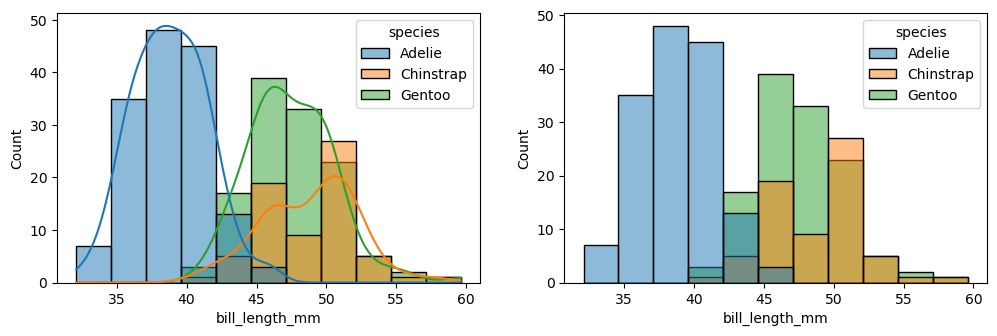

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,3.5))

sns.histplot(x='bill_length_mm',data=df,hue='species',ax=ax[1])
sns.histplot(x='bill_length_mm',data=df,hue='species',kde=True,ax=ax[0])

plt.show()

/tmp/ipykernel_79423/1043321368.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(flights['arr_delay'] )


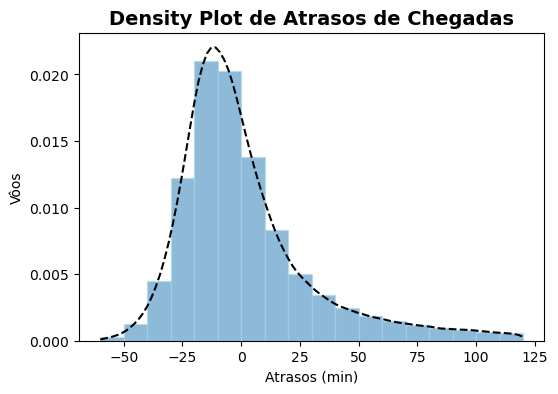

In [ ]:
from scipy.stats import kde
density = kde.gaussian_kde(flights['arr_delay'] )
x = np.linspace(-60,120,100)
y = density(x)

plt.figure(figsize=(6,4))

binwidth=10

plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',alpha=0.5)
plt.plot(x,y,'--k')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.show()

/tmp/ipykernel_79423/3294443046.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(flights[ flights['arr_delay'] > 0]['arr_delay'] )


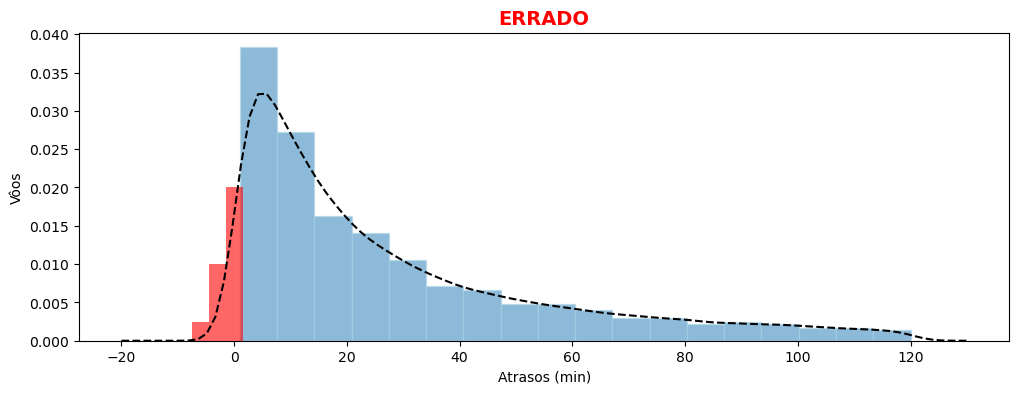

In [ ]:
from scipy.stats import kde
density = kde.gaussian_kde(flights[ flights['arr_delay'] > 0]['arr_delay'] )
x = np.linspace(-20,130,100)
y = density(x)

plt.figure(figsize=(12,4))

binwidth=10

plt.hist(flights[ flights['arr_delay'] > 0]['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',alpha=0.5)
plt.plot(x,y,'--k')

# Anotações
plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.bar(0,0.02,color='red',width=3,alpha=0.6)
plt.bar(-3,0.01,color='red',width=3,alpha=0.6)
plt.bar(-6,0.0025,color='red',width=3,alpha=0.6)

plt.show()

 curva estimada, buscando uma suavização da curva que corresponde aos dados, pode produzir nos casos em que o valores apresentam um grande salto, intervalos de valores que de fato não existem nos dados.

#### sns.displot()

histplot() (with kind="hist"; the default)

kdeplot() (with kind="kde")

ecdfplot() (with kind="ecdf"; univariate-only)

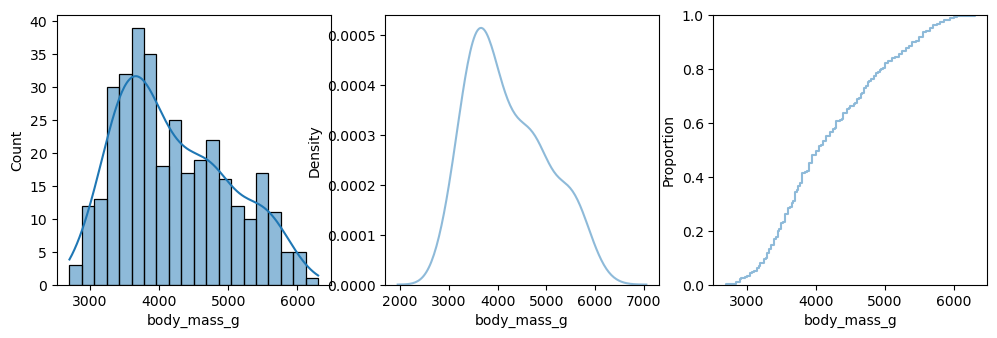

In [ ]:
plt.figure(figsize=(12,3.5))

plt.subplot(1,3,1)
sns.histplot(df.body_mass_g,kde=True,bins=20,alpha=0.5)

plt.subplot(1,3,2)
sns.kdeplot(df.body_mass_g,alpha=0.5)

plt.subplot(1,3,3)
sns.ecdfplot(df.body_mass_g,alpha=0.5)

plt.show()

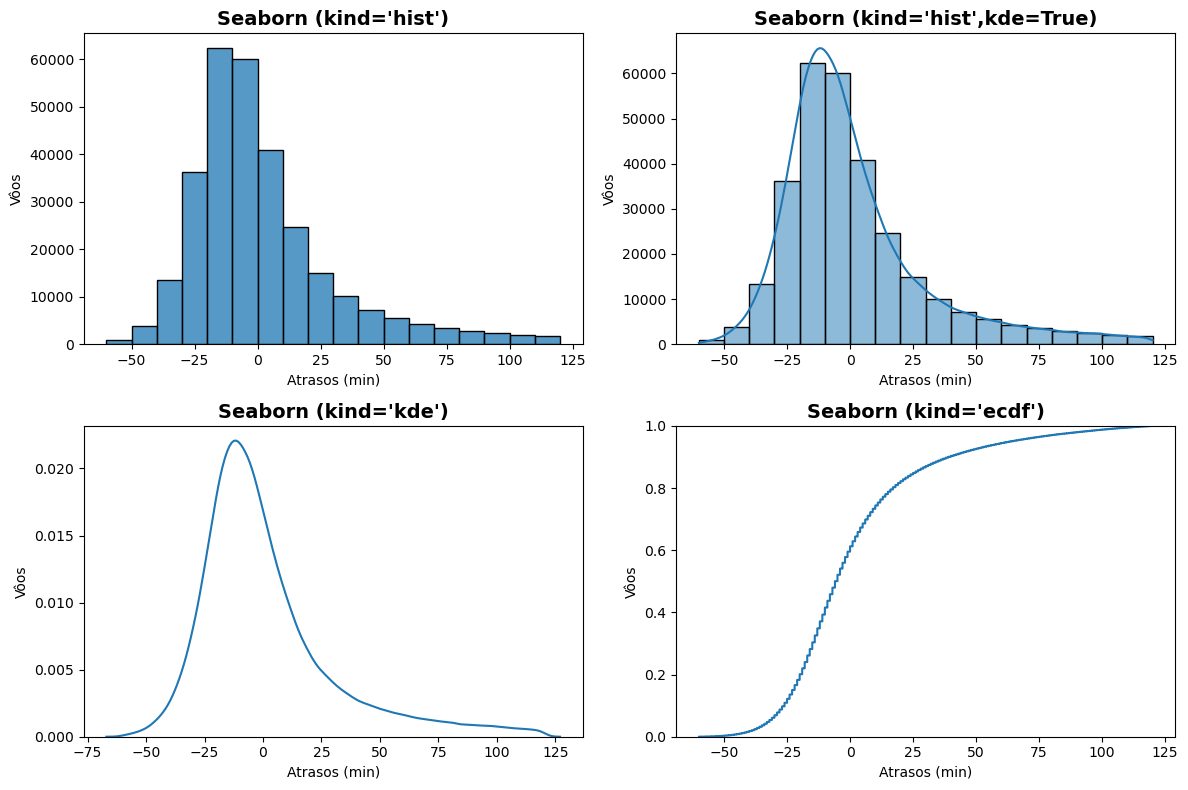

In [ ]:
plt.figure(figsize=(12,8))
binwidth=10

plt.subplot(2,2,1)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth))
plt.title('Seaborn (kind=\'hist\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,2)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth), kde=True)
plt.title('Seaborn (kind=\'hist\',kde=True)', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,3)
sns.kdeplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'kde\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(2,2,4)
sns.ecdfplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'ecdf\')', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.tight_layout()
plt.show()

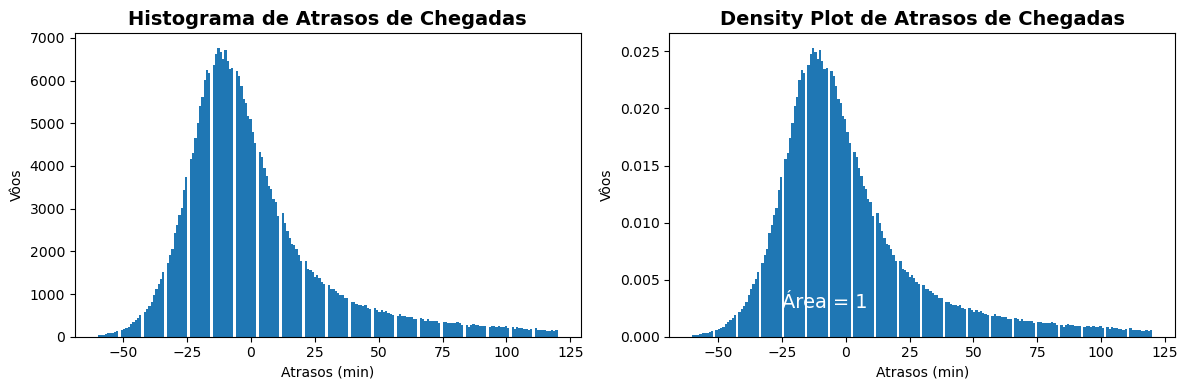

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=200)

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=200)

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')
plt.xlabel('Atrasos (min)')
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

#### Histogramas 2D

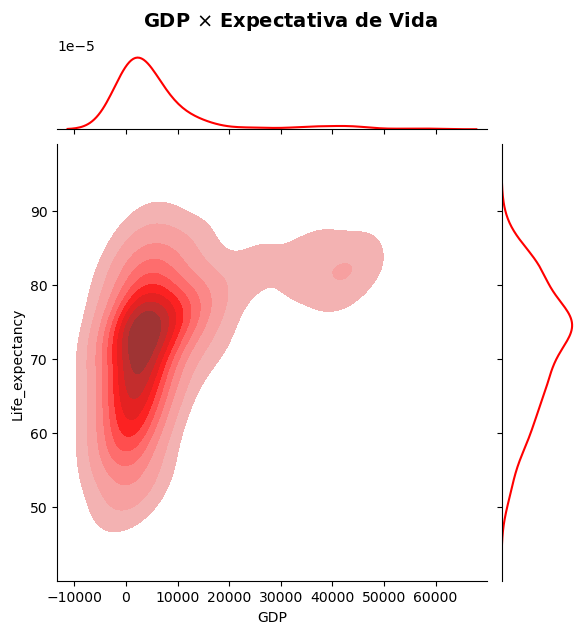

In [ ]:
sns.jointplot(data=WHO, x="GDP", y="Life_expectancy", kind='kde',shade=True, levels=10, color='red')
# sns.jointplot(data=WHO, x="GDP", y="Life_expectancy", kind='hist', color='red')

plt.suptitle('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold', y=1.05)
plt.show()


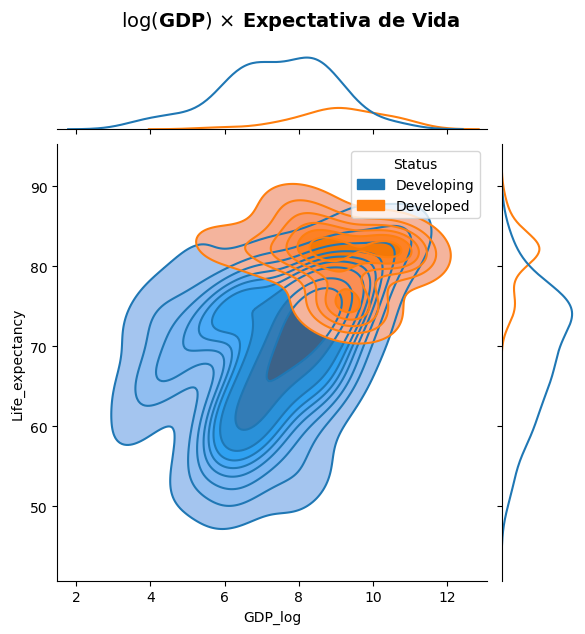

In [ ]:
WHO['GDP_log'] = np.log(WHO.GDP)

g = sns.jointplot(data=WHO, x="GDP_log", y="Life_expectancy", hue="Status", kind='kde')
g.plot_joint(sns.kdeplot, shade=True)

plt.suptitle('$\log($GDP$)$ $\\times$ Expectativa de Vida', fontsize=14, weight='bold', y=1.05)
plt.show()

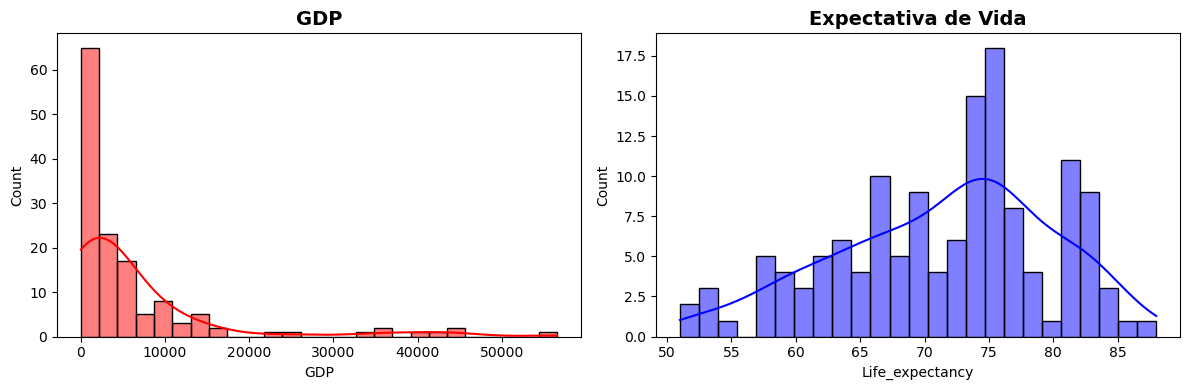

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=WHO, x='GDP', kde=True, color="red", ax=axs[0])
axs[0].set_title('GDP', fontsize=14, weight='bold')

sns.histplot(data=WHO, x='Life_expectancy', kde=True, color="blue", ax=axs[1], bins=25)
axs[1].set_title('Expectativa de Vida', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

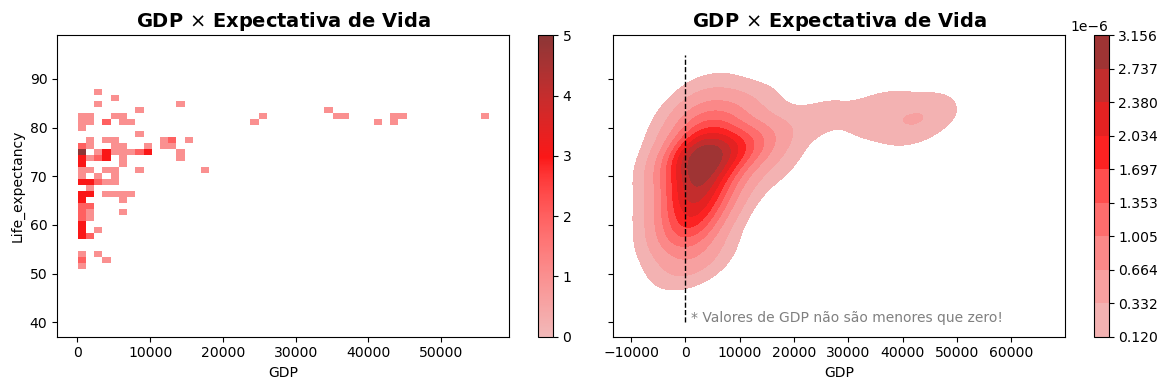

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.histplot(data=WHO, x="GDP", y="Life_expectancy", color='red', bins=(50,30), ax=axs[0],cbar=True)
axs[0].set_title('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold')

sns.kdeplot(data=WHO, x="GDP", y="Life_expectancy", shade=True, color='red', ax=axs[1],cbar=True)
axs[1].set_title('GDP $\\times$ Expectativa de Vida', fontsize=14, weight='bold')

axs[1].vlines(0,40,95,color='k',linestyle='dashed',lw=1)
axs[1].text(1000,40,'* Valores de GDP não são menores que zero!', color='grey')

plt.tight_layout()
plt.show()

#### AREA

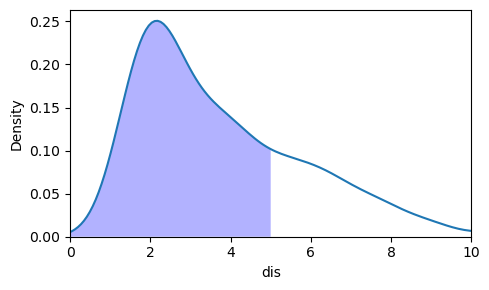

In [ ]:
plt.figure(figsize=(5,3))

from scipy.stats import gaussian_kde

x = np.linspace(0,5,100)
prob = gaussian_kde(boston['dis'])(x)

a = sns.kdeplot(boston['dis'])

plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.xlim([0,10])

plt.tight_layout()
plt.show()

In [ ]:
boston['dis'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

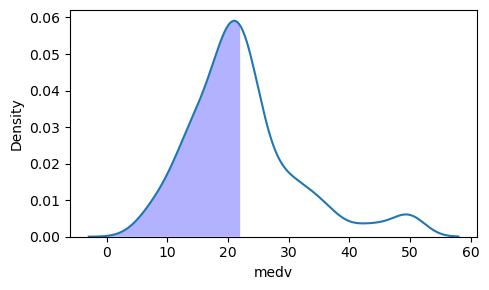

In [ ]:
plt.figure(figsize=(5,3))

from scipy.stats import gaussian_kde

x = np.linspace(0,22,100)
prob = gaussian_kde(boston['medv'])(x)

a = sns.kdeplot(boston['medv'])

plt.fill_between(x,prob, facecolor='blue', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
boston['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

## BoxPlot

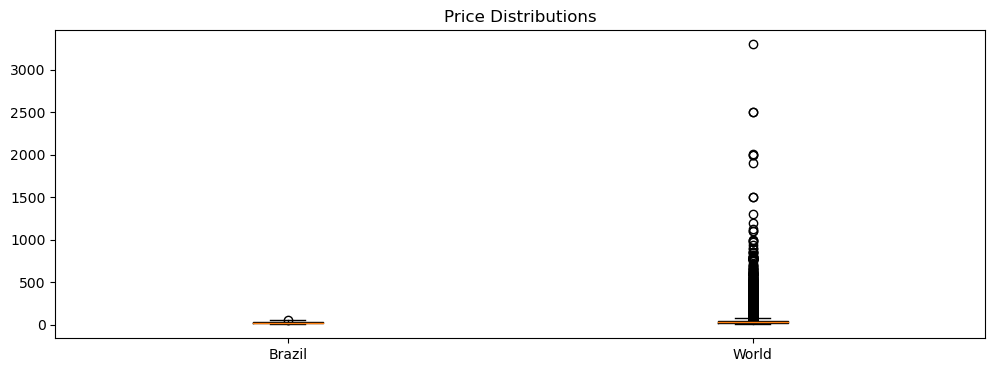

In [ ]:
wine_not_null = wine[ ~ np.isnan( wine.price ) ]

plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine_not_null.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

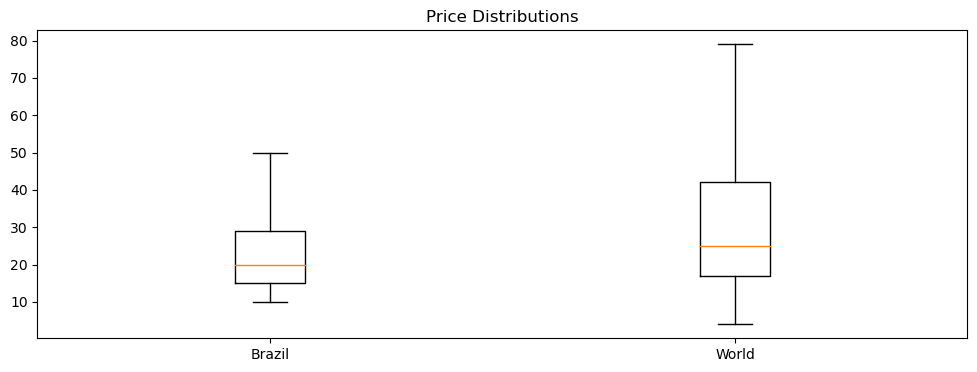

In [ ]:
plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1],showfliers=False)
plt.boxplot(wine_not_null.price,positions=[2],showfliers=False)
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

CUIDADO !!!

SE O DF TIVER VALORES NULOS ELE DÁ ERRO E NÃO MOSTRA O GRÁFICO

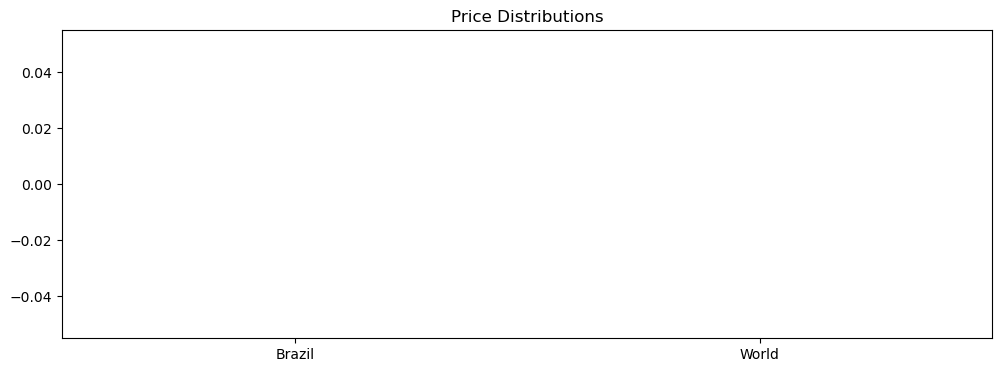

In [ ]:
plt.figure(figsize=(12,4))
plt.boxplot(wine[wine.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

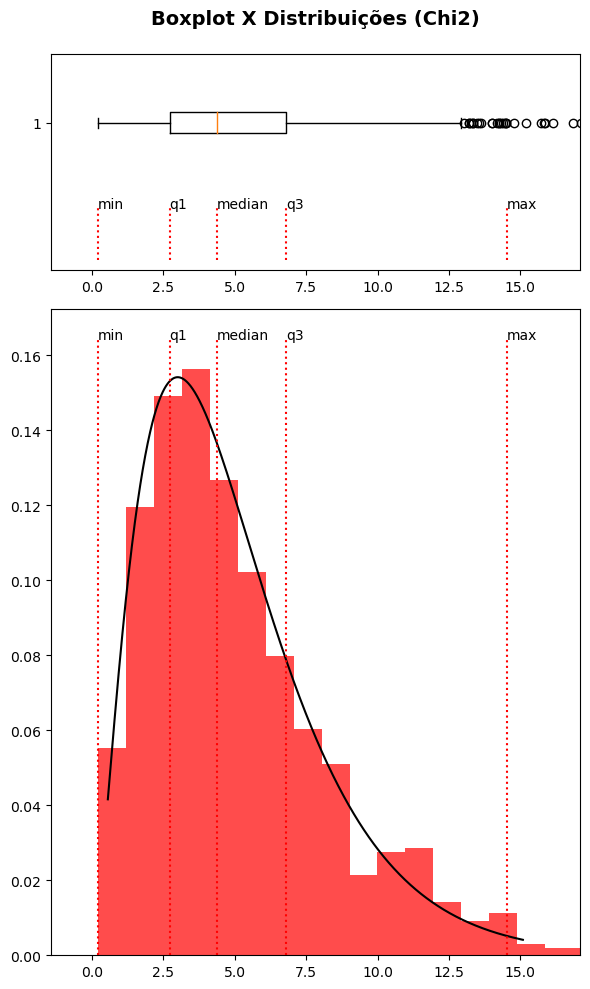

In [ ]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.25, .75)}, figsize=(6,10))

ax_box.set_title('Boxplot X Distribuições (Chi2)\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição chi2
df = 5
rchi2 = chi2.rvs(df, size=1000)
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)

ax_box.boxplot(rchi2, vert=False)
ax_hist.plot(x, chi2.pdf(x, df), 'k-', label='chi2 pdf', lw=1.5)
ax_hist.hist(rchi2, density=True, bins=30, alpha=0.7, color='r')

ax_box.set_xlim([min(x) - 0.4*df, max(x) + 0.4*df])
ax_hist.set_xlim([min(x) - 0.4*df, max(x) + 0.4*df])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['min','q1','median','q3','max']):
  ax_hist.vlines(np.quantile(rchi2,q),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_box.vlines(np.quantile(rchi2,q),0,max_box/4,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.quantile(rchi2,q),max_hist,label)
  ax_box.text(np.quantile(rchi2,q),max_box/4,label)

plt.tight_layout()
plt.show()


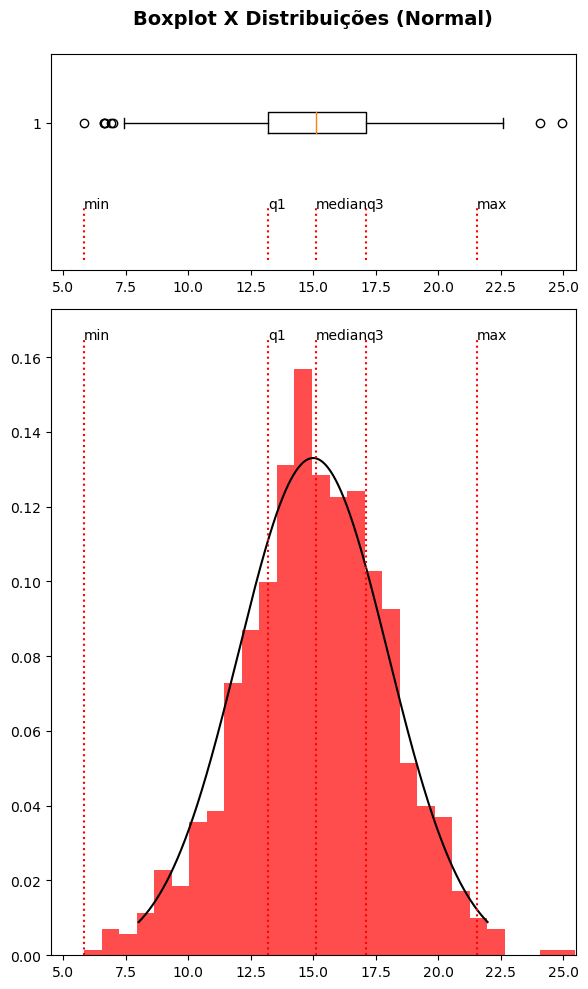

In [ ]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.25, .75)}, figsize=(6,10))

ax_box.set_title('Boxplot X Distribuições (Normal)\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição normal
media = 15
sd = 3
rnorm = norm.rvs(loc=media,scale=sd,size=1000)
x = np.linspace(norm.ppf(0.01,loc=media,scale=sd), norm.ppf(0.99,loc=media,scale=sd), 1000)

ax_box.boxplot(rnorm, vert=False)
ax_hist.plot(x, norm.pdf(x,loc=media,scale=sd), 'k-', label='normal', lw=1.5)
ax_hist.hist(rnorm, density=True, bins=30,  alpha=0.7, color='r')

ax_box.set_xlim([media - 3.5*sd, media + 3.5*sd])
ax_hist.set_xlim([media - 3.5*sd, media + 3.5*sd])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['min','q1','median','q3','max']):
  ax_hist.vlines(np.quantile(rnorm,q),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_box.vlines(np.quantile(rnorm,q),0,max_box/4,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.quantile(rnorm,q),max_hist,label)
  ax_box.text(np.quantile(rnorm,q),max_box/4,label)

plt.tight_layout()
plt.show()

O intervalo interquartil é freqüentemente usado para se obter outliers dos dados. Outliers são definidos como observações que encontram-se abaixo de Q1−1.5IQR
 ou acima de Q3+1.5IQR
, onde IQR
 (Inter Quartil Range) é a distância inter quartis IQR=Q3−Q1
 e são indicados no gráfico de caixa por pontos individuais acima e abaixo das extremidades do gráfico. Para distribuições normais o intervalo dos valores não discrepantes é bastante próxima a [x¯−3σ,x¯+3σ]
, onde x¯
 e σ
 são o valor médio e o desvio padrão, e em muitos casos práticos essa regra pode ser aplicada de modo equivalente.

Você pode ver a relação entre essas medidas, os gráficos de caixa e os outliers na abaixo para uma distribuição normal de dados.

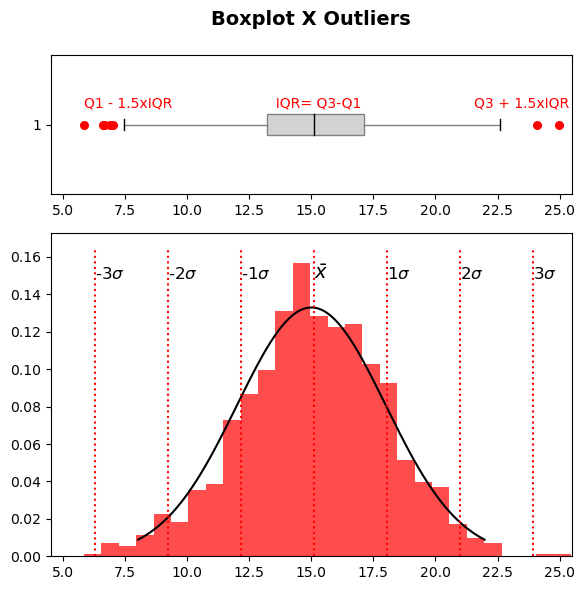

In [ ]:
from scipy.stats import chi2, norm
np.random.seed(seed=1)

fig, (ax_box, ax_hist) = plt.subplots(2,  gridspec_kw={"height_ratios": (.3, .7)}, figsize=(6,6))

ax_box.set_title('Boxplot X Outliers\n', fontsize=14, weight='bold')

# Produzindo dados de uma distribuição normal
media = 15
sd = 3
rnorm = norm.rvs(loc=media,scale=sd,size=1000)
x = np.linspace(norm.ppf(0.01,loc=media,scale=sd), norm.ppf(0.99,loc=media,scale=sd), 1000)

ax_box.boxplot(rnorm, vert=False, showfliers=True,
            flierprops=dict( markeredgecolor="r", markerfacecolor='r', markersize=5.5 ),
            patch_artist=True,
            boxprops=dict(facecolor="lightgrey", color="grey"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="grey"))
ax_hist.plot(x, norm.pdf(x,loc=media,scale=sd), 'k-', label='normal', lw=1.5)
ax_hist.hist(rnorm, density=True, bins=30,  alpha=0.7, color='r')

ax_box.set_xlim([media - 3.5*sd, media + 3.5*sd])
ax_hist.set_xlim([media - 3.5*sd, media + 3.5*sd])

max_hist = ax_hist.get_ylim()[1]
max_box = ax_box.get_ylim()[1]

for q, label in zip([0,0.25,0.5,0.75,0.99],['Q1 - 1.5xIQR','  IQR= Q3-Q1','','','Q3 + 1.5xIQR']):
  ax_box.text(np.quantile(rnorm,q),3*max_box/4,label,color='r',fontsize=10)

max_hist = ax_hist.get_ylim()[1]

for s in [-3,-2,-1,1,2,3]:
  ax_hist.vlines(np.mean(rnorm) + s*np.std(rnorm),0,max_hist,color='r',linestyles='dotted',lw=1.5)
  ax_hist.text(np.mean(rnorm) + s*np.std(rnorm),0.9*max_hist, str(s) + '$\sigma$',fontsize=12)

ax_hist.vlines(np.mean(rnorm) ,0,max_hist,color='r',linestyles='dotted',lw=1.5)
ax_hist.text(np.mean(rnorm) ,0.9*max_hist, '$\\bar{x}$',fontsize=14)

plt.tight_layout()
plt.show()


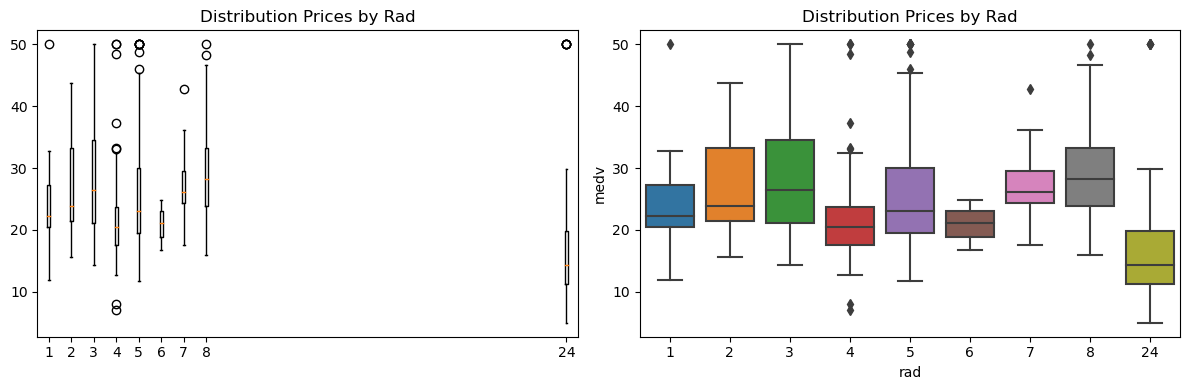

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

for r in boston['rad'].unique():
  ax[0].boxplot(boston[boston.rad == r]['medv'], positions=[r])

ax[0].set_title('Distribution Prices by Rad')

sns.boxplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

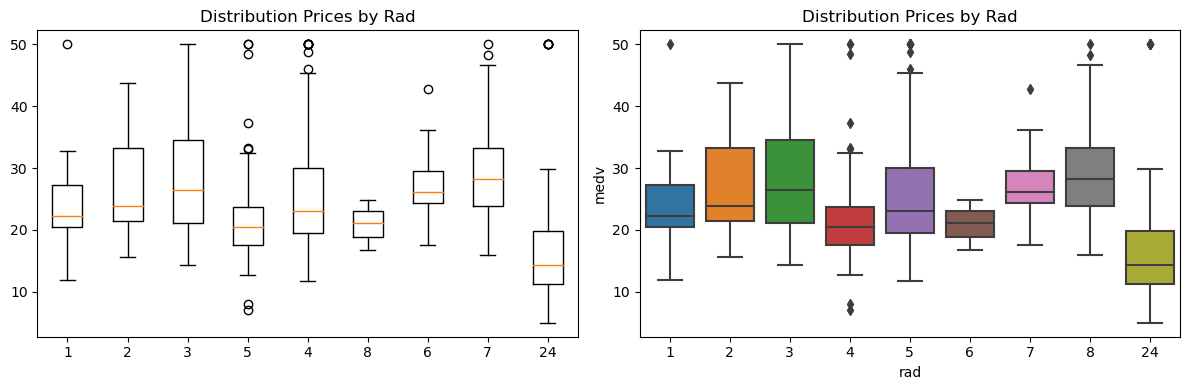

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

data = []
# for r in boston['rad'].unique():
for r in sorted(boston['rad'].unique()):
  data.append(boston[boston.rad == r]['medv'])

ax[0].boxplot(data)
ax[0].set_title('Distribution Prices by Rad')
ax[0].set_xticks(np.arange(1,len(boston_group)+1), labels=boston['rad'].unique())

sns.boxplot(x='rad',y='medv',data=boston,ax=ax[1])
ax[1].set_title('Distribution Prices by Rad')

plt.tight_layout()
plt.show()

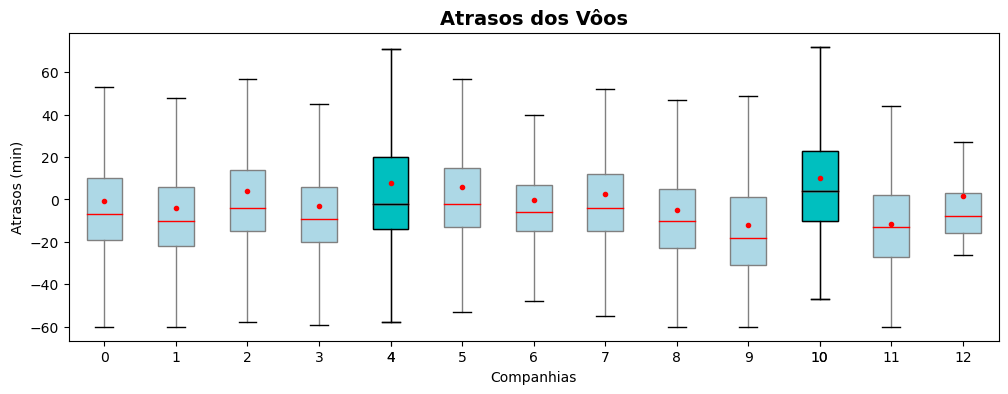

In [ ]:
plt.figure(figsize=(12,4))

for i, companhia in enumerate(flights.name.unique()):
   plt.boxplot(flights[ flights.name == companhia ]['arr_delay'],positions=[i],showfliers=False,
              widths=0.5,
              patch_artist=True,
              boxprops=dict(facecolor="lightblue", color="grey"),
              medianprops=dict(color="r"),
              capprops=dict(color="k"),
              whiskerprops=dict(color="grey"),
              showmeans=True,
              meanprops={"marker":"o",
                      "markerfacecolor":"r",
                      "markeredgecolor":"r",
                      "markersize":"3"})

plt.boxplot(flights[ flights.name == 'Atlantic Southeast Airlines' ]['arr_delay'],positions=[4],showfliers=False, widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor="c", color="k"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"))

plt.boxplot(flights[ flights.name == 'Frontier Airlines Inc.' ]['arr_delay'],positions=[10],showfliers=False, widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor="c", color="k"),
            medianprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"))

plt.title('Atrasos dos Vôos', fontsize=14, weight='bold')
plt.ylabel('Atrasos (min)')
plt.xlabel('Companhias')

# plt.xticks(ticks=range(0,12),labels=flights.name.unique(),rotation=60)
plt.show()

#### Boxplot, identificando outliers
Cuidado com o dropna(). Com na o matplotlib não consegue fazer o cálculo de outliers.

In [ ]:
df = penguins

/home/anahelena/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


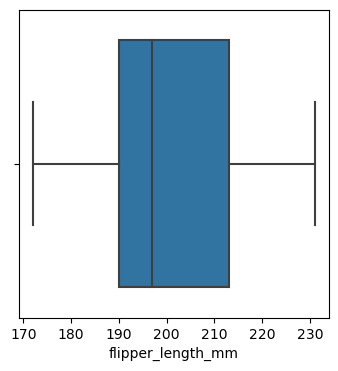

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

sns.boxplot(df.flipper_length_mm)

plt.show()

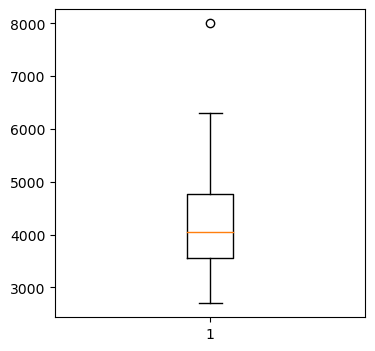

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

df.iloc[0:1,-2] = 8000

plt.boxplot(df.body_mass_g.dropna())

plt.show()

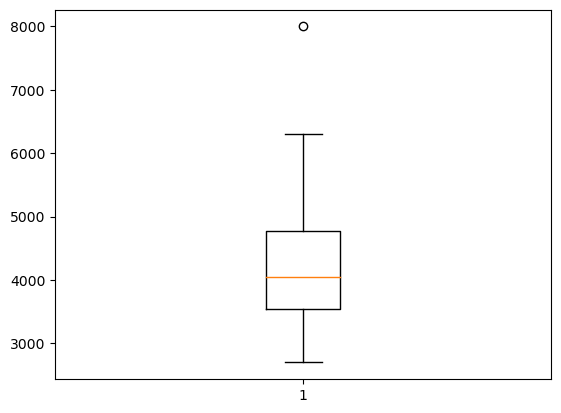

In [ ]:
f = plt.boxplot(df.body_mass_g.dropna())
plt.show()

In [ ]:
f.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [ ]:
f['fliers'][0].get_data()

(array([1.]), array([8000.]))

In [ ]:
f['fliers'][0].get_data()[1]

array([8000.])

## Mapas de Calor

sns.heatmap(df.corr(),annot=True ) 

annot=True: Este parâmetro adiciona anotações às células do mapa de calor, exibindo os valores numéricos das correlações.

<AxesSubplot:>

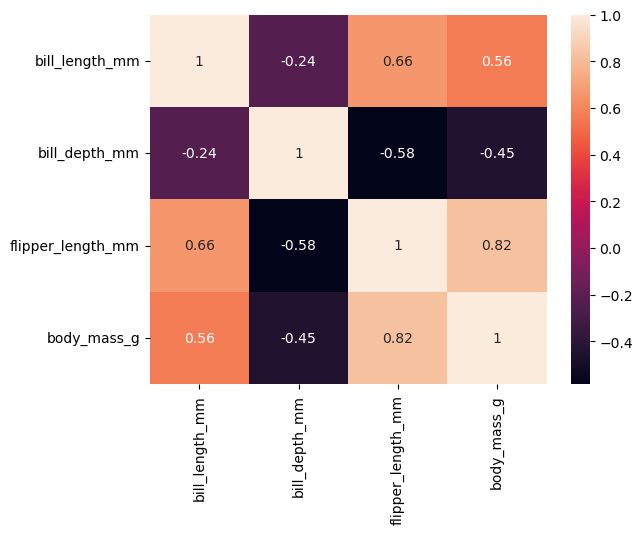

In [ ]:
sns.heatmap(penguins.corr(),annot=True )

### Mapa de Correlação

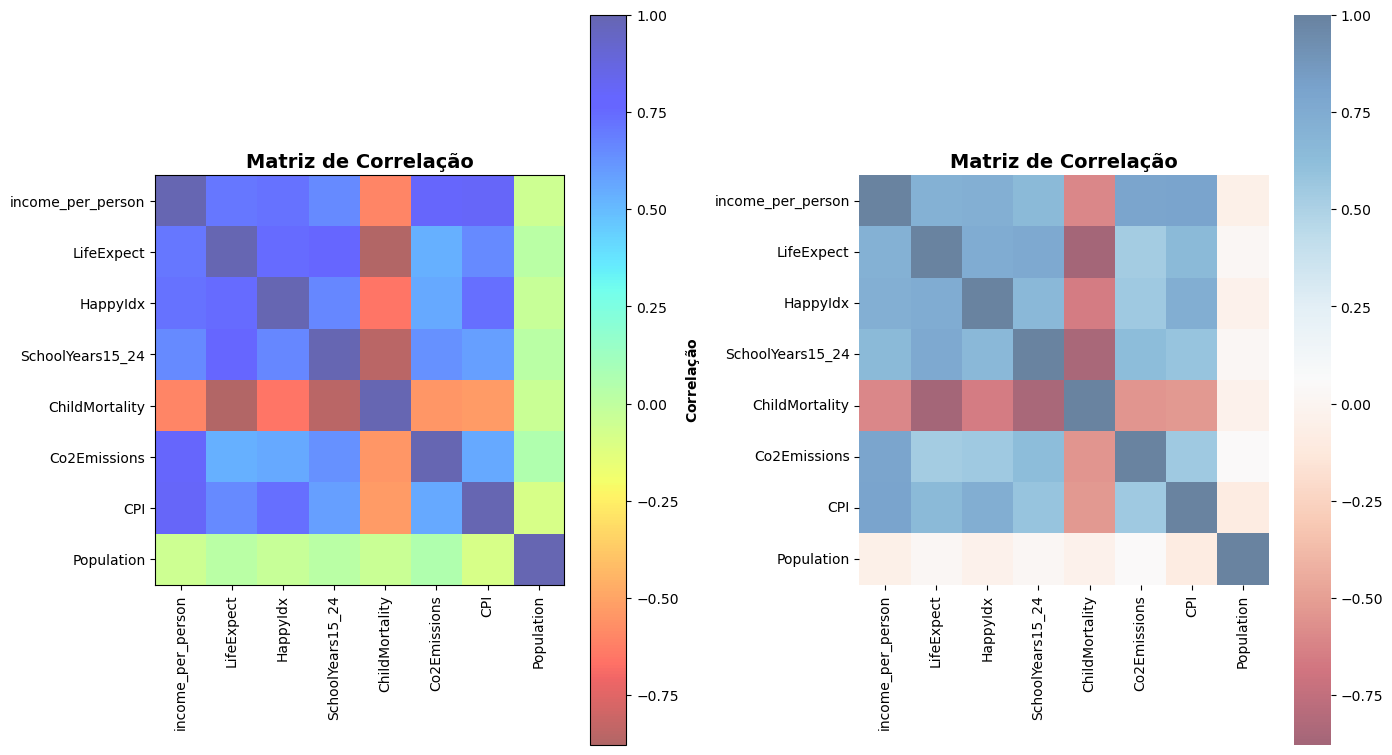

In [ ]:
plt.figure(figsize=(14,8))

matriz = desenvolvimento_Paises[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6)

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

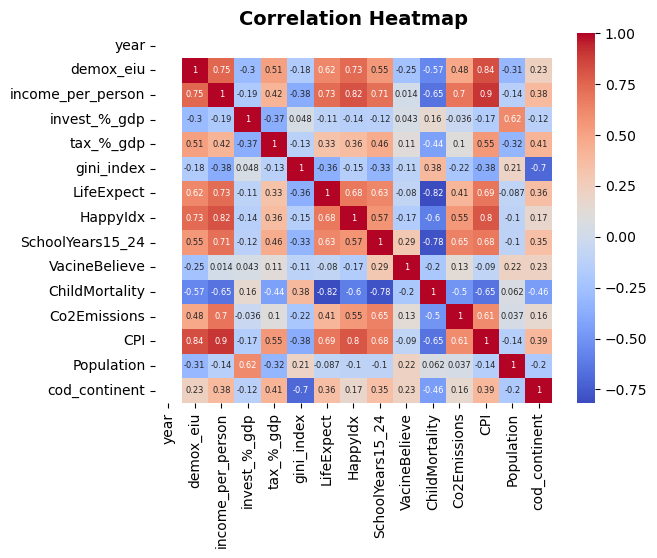

In [ ]:
df_corr = desenvolvimento_Paises.select_dtypes(include='number').corr(method='pearson')
sns.heatmap(df_corr,cmap='coolwarm',annot=True,annot_kws={'fontsize':6})
plt.title('Correlation Heatmap',fontsize=14,weight='bold')
plt.show()

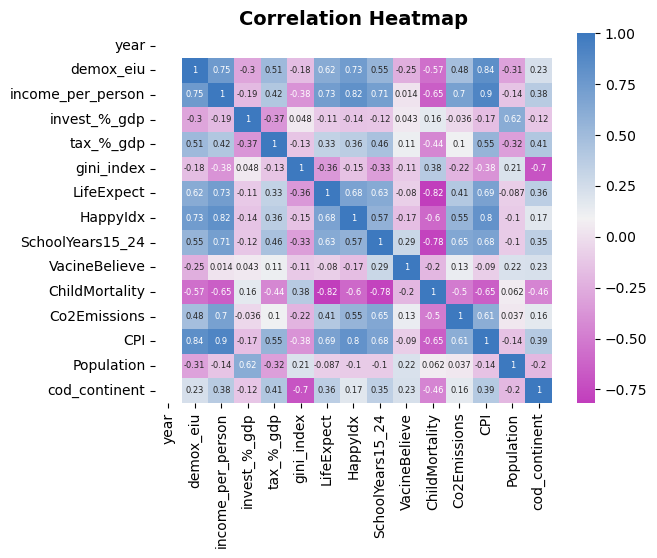

In [ ]:
sns.heatmap(df_corr,
            cmap = sns.diverging_palette(
            h_neg=-50,
            h_pos=250,
            s=80,
            as_cmap=True),
            annot=True,annot_kws={'fontsize':6}
            )

plt.title('Correlation Heatmap',fontsize=14,weight='bold')
plt.show()


## Pizza

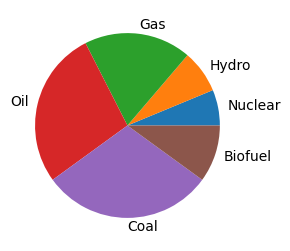

In [ ]:
plt.figure(figsize=(4,3))

plt.pie( np.array(energy),labels=energy_type )
plt.show()

## Espelho

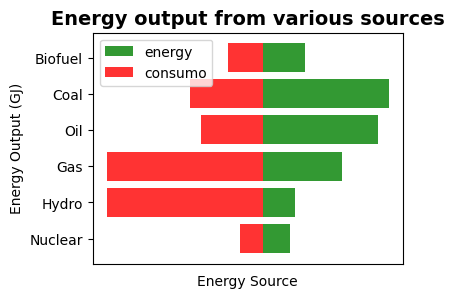

In [ ]:
plt.figure(figsize=(4,3))
energy_type = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]
consumo = [4.5, 30, 30, 12, 14, 6.7]

plt.barh(energy_type, energy, color='green',alpha=0.8, label='energy')
plt.barh(energy_type, -np.array(consumo), color='red',alpha=0.8,label='consumo')
plt.legend()
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various sources", fontsize=14, weight='bold')
plt.xticks([])

plt.show()

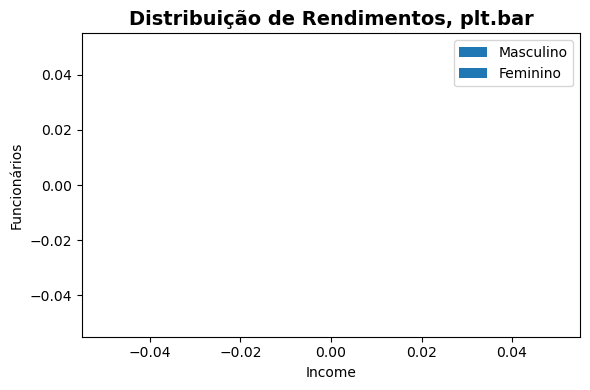

In [ ]:
plt.figure(figsize=(6,4))

h = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
plt.bar(x=h[1][1:], height=h[0], edgecolor = 'white', label='Masculino', width=5000, color=colors['Male'], alpha=0.7)

h = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
plt.bar(x=h[1][1:], height= -1 * h[0],  edgecolor = 'white', label='Feminino', width=5000, color=colors['Female'], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.xlabel('Income')
plt.ylabel('Funcionários')
plt.legend()

plt.tight_layout()
plt.show()

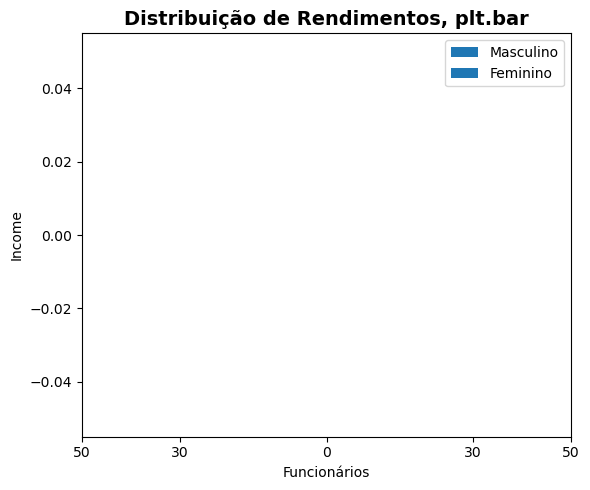

In [ ]:
plt.figure(figsize=(6,5))

h = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
plt.barh(y=h[1][1:], width=h[0],  edgecolor = 'white', label='Masculino', height=5000, color=colors['Male'], alpha=0.7)

h = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
plt.barh(y=h[1][1:], width= -1 * h[0], edgecolor = 'white', label='Feminino', height=5000, color=colors['Female'], alpha=0.7)

# Anotações
plt.title('Distribuição de Rendimentos, plt.bar', fontsize=14, weight='bold')
plt.ylabel('Income')
plt.xlabel('Funcionários')
plt.legend()
plt.xticks(ticks=[-50,-30,0,30,50], labels=[50,30,0,30,50])

plt.tight_layout()
plt.show()

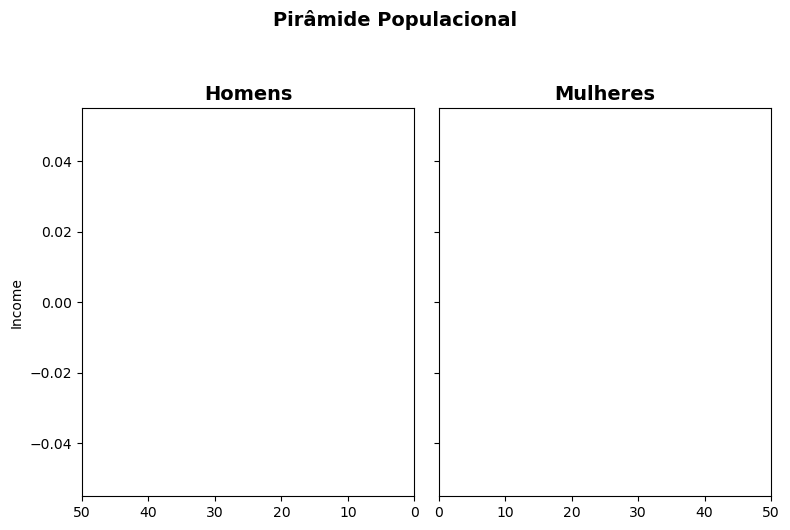

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8, 5))

fig.suptitle('Pirâmide Populacional', fontsize=14, weight='bold', y=1.05)

h1 = np.histogram(gdoor[gdoor.gender == 'Male'].income, bins=np.arange(minin,maxin,5000))
h2 = np.histogram(gdoor[gdoor.gender == 'Female'].income, bins=np.arange(minin,maxin,5000))
y = h1[1][1:]
x_male = h1[0]
x_female = h2[0]


axes[0].barh(y, x_male, align='center',edgecolor = 'white', height=5000, color=colors['Male'], alpha=0.8)
axes[0].set_title('Homens', fontsize=14, weight='bold')
axes[1].barh(y, x_female, align='center', edgecolor = 'white', height=5000, color=colors['Female'], alpha=0.7)
axes[1].set_title('Mulheres', fontsize=14, weight='bold')

axes[0].set_xlim([0,50])
axes[1].set_xlim([0,50])

axes[0].set_ylabel('Income')
axes[0].invert_xaxis()

plt.tight_layout()
plt.show()

## CUIDADO Matplotlib  ×  Seaborn

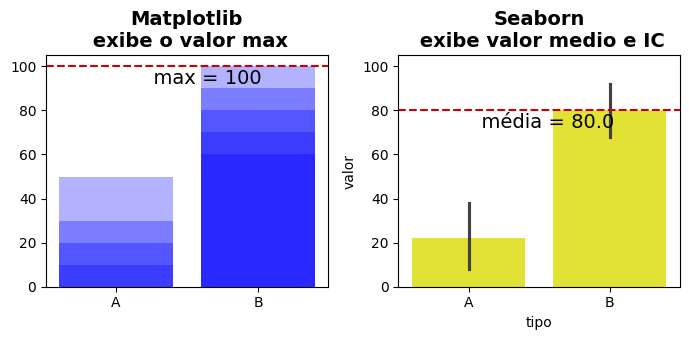

In [101]:
data = pd.DataFrame( { 'tipo': pd.Series(['A','A','A','A','A','B','B','B','B','B']),
                     'valor': pd.Series([0,10,20,30,50,60,70,80,90,100]) })

plt.figure(figsize=(7,3.5))

plt.subplot(1,2,1)
plt.bar(data.tipo, data.valor, color='blue',alpha=0.3)

plt.ylim([0,105])
plt.text(0,92,'      max = ' + str(data[ data.tipo == 'B' ].valor.max()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.max(), color = '#cc0000', linestyle = '--')
plt.title('Matplotlib\n exibe o valor max',fontsize=14,weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9)#errorbar=None)
# sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9,errorbar=None)

plt.ylim([0,105])
plt.text(0,72,'  média = ' + str(data[ data.tipo == 'B' ].valor.mean()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.mean() , color = '#cc0000', linestyle = '--')
plt.title('Seaborn\n exibe valor medio e IC',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

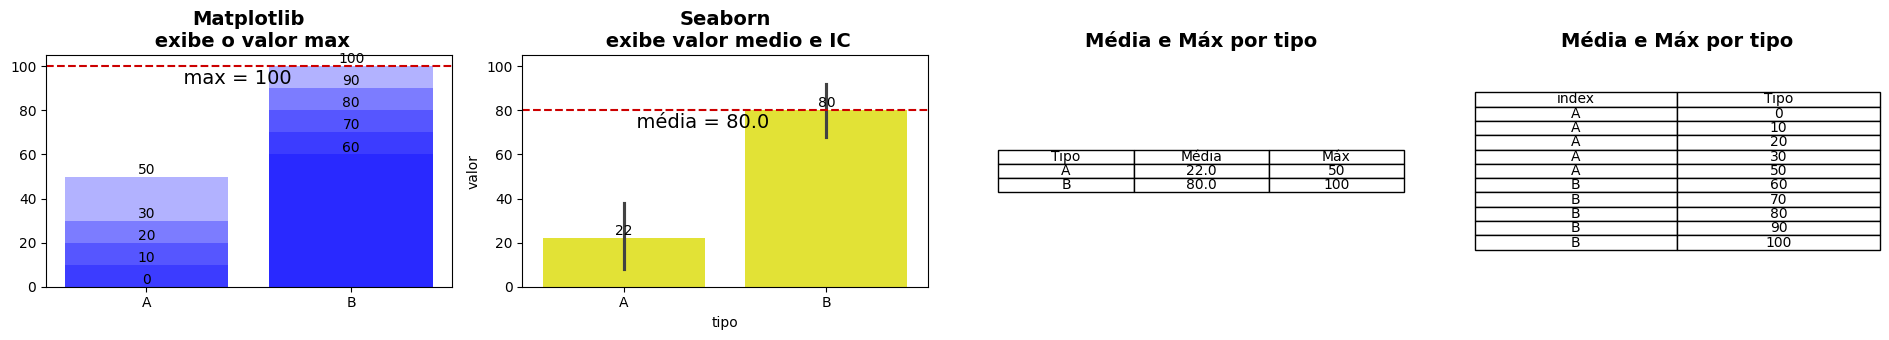

In [130]:
plt.figure(figsize=(19,3.5))

plt.subplot(1,4,1)
bar = plt.bar(data.tipo, data.valor, color='blue',alpha=0.3)

plt.ylim([0,105])
plt.text(0,92,'      max = ' + str(data[ data.tipo == 'B' ].valor.max()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.max(), color = '#cc0000', linestyle = '--')
plt.title('Matplotlib\n exibe o valor max',fontsize=14,weight='bold')
plt.bar_label(bar, fontsize=10)

plt.subplot(1,4,2)
ax1 = sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9)#errorbar=None)
# sns.barplot(x=data.tipo, y=data.valor, color='yellow',alpha=0.9,errorbar=None)

plt.ylim([0,105])
plt.text(0,72,'  média = ' + str(data[ data.tipo == 'B' ].valor.mean()),fontsize=14)
plt.axhline(y = data[ data.tipo == 'B' ].valor.mean() , color = '#cc0000', linestyle = '--')
plt.title('Seaborn\n exibe valor medio e IC',fontsize=14,weight='bold')
ax1.bar_label(ax1.containers[0], fontsize=10)

# # Gráfico 3: Média por tipo
# plt.subplot(1, 3, 3)
# means = data.groupby("tipo").valor.mean()
# plt.bar(means.index, means.values, color='green', alpha=0.6)
# plt.ylim([0, 105])
# plt.text(0.5, 72, '  média = ' + str(means.values), fontsize=14)
# plt.axhline(y=means.values[0], color='#cc0000', linestyle='--')
# plt.axhline(y=means.values[1], color='#00cc00', linestyle='--')
# plt.title('Média por tipo', fontsize=14, weight='bold')

# Gráfico 3: Tabela


plt.subplot(1, 4, 3)
plt.axis('off')
means = data.groupby("tipo").valor.mean()
maxs = data.groupby("tipo").valor.max()
table_data = pd.DataFrame({'Tipo': means.index, 'Média': means.values, 'Máx': maxs.values})
plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
plt.title('Média e Máx por tipo', fontsize=14, weight='bold')


plt.subplot(1, 4, 4)
plt.axis('off')
plt.title('Média e Máx por tipo', fontsize=14, weight='bold')

table_data = pd.DataFrame(data).reset_index()
table_data.columns = ["index",'Tipo', 'Média']
plt.table(cellText=table_data[['Tipo', 'Média']].values, colLabels=table_data.columns, cellLoc='center', loc='center')


plt.tight_layout()
plt.show()

# Funções De Distribuição

Funções de distribuição de probabilidades. PDF, CDF, PPF, qqplot, várias distrubuições com diferentes parâmetros.



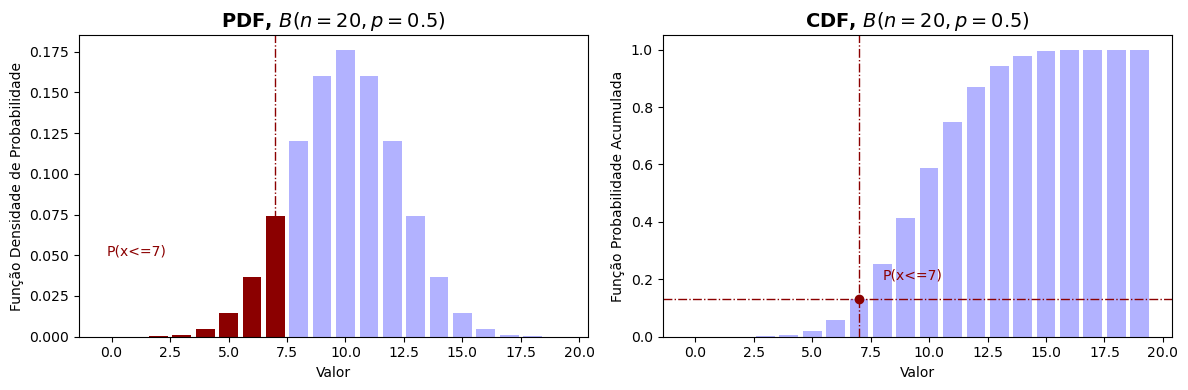

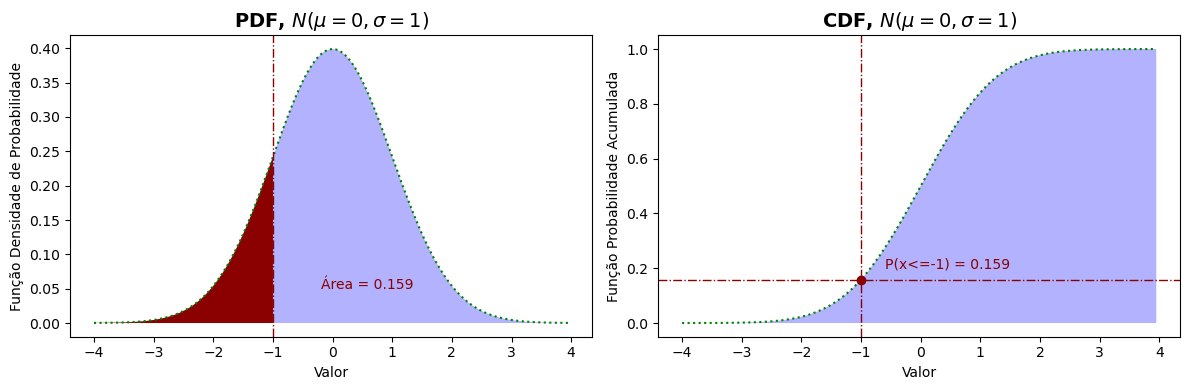

In [ ]:
from scipy.stats import norm, binom

n = 20
p = 0.5

x = np.arange(0,n,1)

prob = []

for xi in x:
  prob.append(binom.pmf(n=n,p=p,k=xi))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.bar(x,prob,color='blue',linewidth=1.5, alpha=0.3)
plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $B(n=20, p=0.5)$', fontsize=14, weight='bold')

plt.bar([0,1,2,3,4,5,6,7],height=[prob[i] for i in range(8)],color='darkred')
plt.axvline(7,linewidth=1,linestyle='-.',color='darkred')
plt.text(-0.2, 0.05, f'P(x<=7)', fontsize=10,color='darkred')

prob =[ ]

for xi in x:
  prob.append(binom.cdf(n=n,p=p,k=xi))

plt.subplot(1, 2, 2)
plt.bar(x,prob,color='blue',linewidth=1.5,linestyle=':', alpha=0.3)
plt.xlabel('Valor')
plt.ylabel('Função Probabilidade Acumulada')
plt.title('CDF, $B(n=20, p=0.5)$', fontsize=14, weight='bold')

plt.axvline(7,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(binom.cdf(n=n,p=p,k=7), linewidth=1,linestyle='-.',color='darkred')
plt.plot(7, binom.cdf(n=n,p=p,k=7),'o',color='darkred')
plt.text(8, 0.2, f'P(x<=7)', fontsize=10,color='darkred')

plt.tight_layout()
plt.show()

prob = []

x =  np.arange(-4,4,0.05)

for xi in x:
  prob.append(norm.pdf(xi))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.fill_between(np.arange(-4,-0.95,0.05), prob[0:len(np.arange(-4,-0.95,0.05)+1)], facecolor='darkred')
plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold')

plt.axvline(-1,linewidth=1,linestyle='-.',color='darkred')
plt.text(-0.2, 0.05, f'Área = { norm.cdf(-1) :.3f}', fontsize=10,color='darkred')

prob =[ ]

for xi in x:
  prob.append(norm.cdf(xi))

plt.subplot(1, 2, 2)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)
plt.xlabel('Valor')
plt.ylabel('Função Probabilidade Acumulada')
plt.title('CDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold')

plt.axvline(-1,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(norm.cdf(-1), linewidth=1,linestyle='-.',color='darkred')
plt.plot(-1,norm.cdf(-1),'o',color='darkred')
plt.text(-0.6, 0.2, f'P(x<=-1) = { norm.cdf(-1) :.3f}', fontsize=10,color='darkred')

plt.tight_layout()
plt.show()

## Criando Distribuições

### `rvs(loc=0, scale=1, size=1, random_state=None)`

In [157]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import weibull_min
from scipy.stats import lognorm


In [155]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import weibull_min
from scipy.stats import hypergeom
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.weightstats import ztest

Para todas valem as funções,

 `rv.rvs()`
 `rv.pdf()`  
 `rv.cdf()`
 `rv.ppf()`

Embora, cada uma, tenha os seus parâmetros específicos. Para distribuições discretas, troque `pdf` por `pmf`, e assim por diante.

### norm

In [ ]:
np.random.seed(42)
x = np.random.randint(36,43,30)
x

array([42, 39, 40, 42, 38, 40, 40, 42, 37, 38, 42, 38, 38, 40, 39, 38, 41,
       40, 37, 39, 41, 41, 37, 39, 40, 36, 39, 37, 41, 40])

In [ ]:
mu = x.mean()
sigma = x.std()
mu, sigma

(39.36666666666667, 1.682920741515245)

In [ ]:
from scipy.stats import norm
funcao_sapatos = norm(loc=mu,scale=sigma)

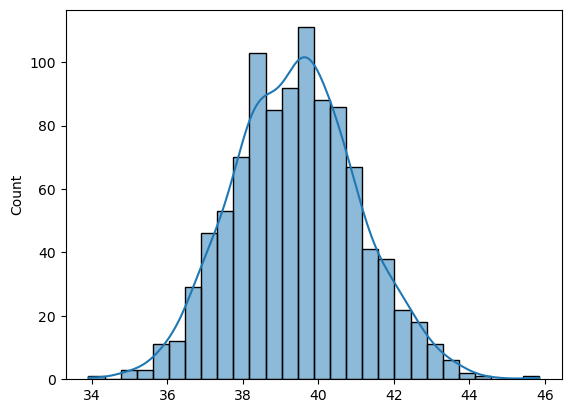

In [ ]:
sns.histplot(funcao_sapatos.rvs(size=1000),kde=True)
plt.show()

### t-student  
Uma distribuição importante usada quando esperamos uma distribuição normal, mas não temos a população, apenas uma amostra dos dados.

[ 2.61103204 -1.17044637 -1.16204805 -1.69123532  0.41674013 -0.49759053
 -0.45341236  0.70598317 -0.32951745  1.88563226]


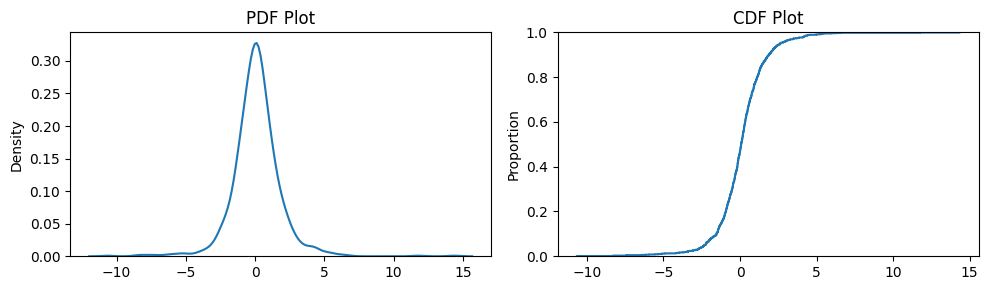

In [164]:
from scipy.stats import t

rv = t(2.74)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

### weibull

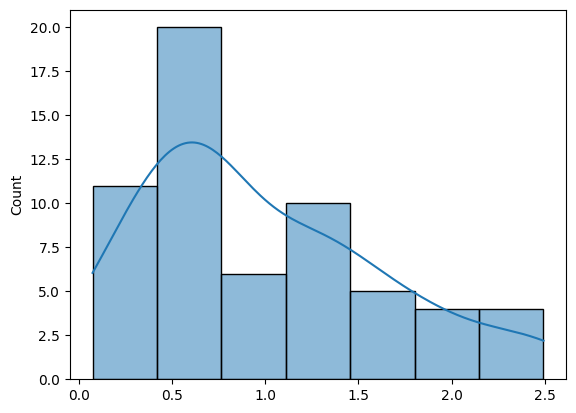

array([1.35305358, 0.71001771, 0.60531222, 0.64680989, 1.34619372,
       1.08119383, 0.12460217, 0.64212672, 1.72326431, 0.37488551])

In [147]:
x = weibull_min.rvs(c=1.7, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

In [145]:
lambda_scale = 5000  # escala, vida média em horas
k_shape = 1.7  # forma, <1 pouquissímas falhas, =1 taxa constante (exponencial), >1.5 taxa aumenta, modelando por exemplo desgaste

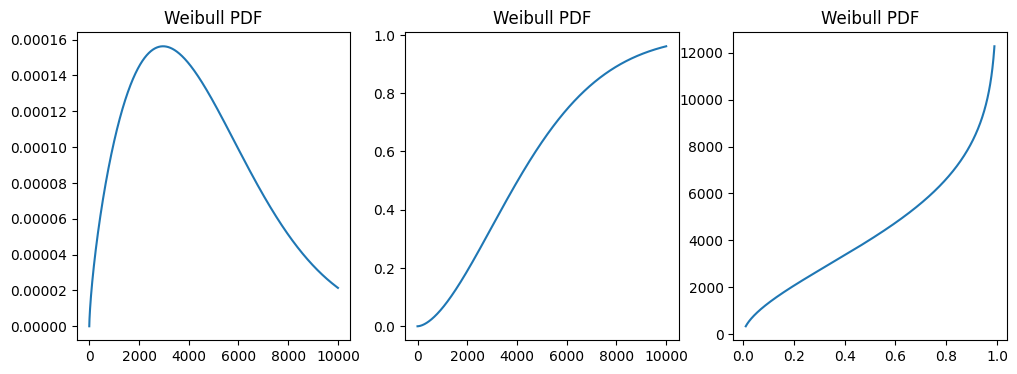

In [146]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)
plt.subplot(1, 3, 1)
plt.title('Weibull PDF')
plt.plot(np.linspace(0,10000,10000),weibull_min.pdf(np.linspace(0,10000,10000), c=k_shape, scale=lambda_scale))
plt.subplot(1, 3, 2)
plt.title('Weibull PDF')

plt.plot(np.linspace(0,10000,10000),weibull_min.cdf(np.linspace(0,10000,10000), c=k_shape, scale=lambda_scale))
plt.subplot(1, 3, 3)
plt.title('Weibull PDF')

plt.plot(np.linspace(0.01, 0.99, 1000),weibull_min.ppf(np.linspace(0.01, 0.99, 1000), c=k_shape, scale=lambda_scale))


### Gaussiana (Normal)

In [ ]:
sample_size = 60

In [ ]:
np.random.seed(1)
normal_samples = norm.rvs(loc=5000, scale=200, size=sample_size)
normal_samples[:10]

array([5324.86907273, 4877.64871727, 4894.36564955, 4785.40627557,
       5173.08152586, 4539.69226062, 5348.96235284, 4847.75861982,
       5063.80781921, 4950.1259249 ])

* **loc**: Média da distribuição normal. Neste caso, é 0.

* **scale**: Desvio padrão da distribuição. Neste caso, é 1.

* **size**: Número de amostras a serem geradas. Neste caso, é sample_size (1000).

<Axes: ylabel='Count'>

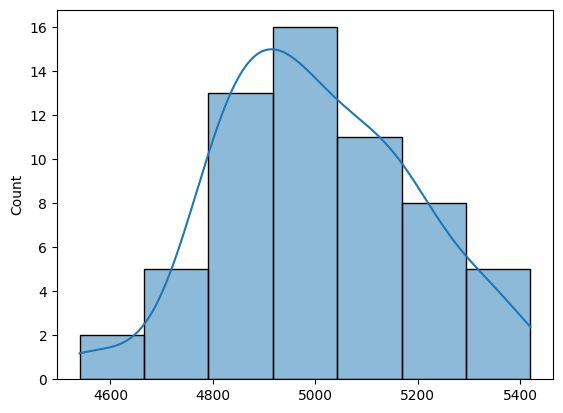

In [ ]:
sns.histplot(normal_samples,kde=True)

y = norm.cdf(x, loc=0, scale=1)



> Add blockquote



In [ ]:
y = norm.cdf(normal_samples, loc=5000, scale=200)
y

array([0.94784894, 0.27034947, 0.29869007, 0.1416426 , 0.80659245,
       0.0106806 , 0.95949118, 0.22326675, 0.62515157, 0.40153715,
       0.92814418, 0.01969255, 0.37356833, 0.35046908, 0.87155436,
       0.13568975, 0.43155045, 0.19001028, 0.51683585, 0.71999115,
       0.13553122, 0.87383819, 0.81636284, 0.69234008, 0.81616754,
       0.24707351, 0.45109701, 0.17469596, 0.39439273, 0.70206725,
       0.2445752 , 0.34577461, 0.24598695, 0.19899802, 0.25103187,
       0.49494769, 0.13193083, 0.59266886, 0.95152287, 0.77096971,
       0.42393551, 0.18737018, 0.22748401, 0.95472034, 0.52026064,
       0.26206384, 0.5757041 , 0.9821468 , 0.54782138, 0.73144962,
       0.61797638, 0.36232545, 0.12661934, 0.36341601, 0.4172654 ,
       0.7212716 , 0.79926069, 0.82409962, 0.61240289, 0.81195975])

Text(0.5, 1.0, 'Distribuição Normal')

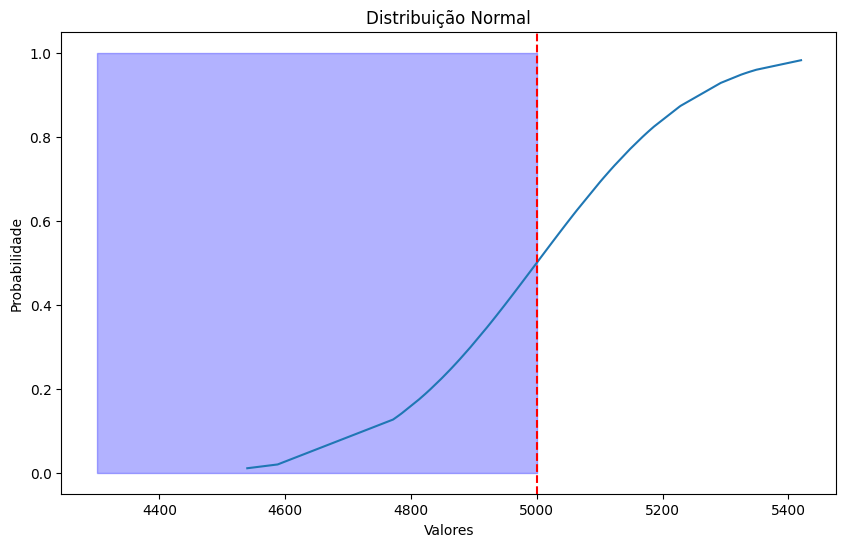

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=normal_samples, y=y)
plt.axvline(x=5000, color='r', linestyle='--')
plt.fill_betweenx([0, 1], x1=4300, x2=5000, alpha=0.3, color='blue')

plt.xlabel('Valores')
plt.ylabel('Probabilidade')
plt.title('Distribuição Normal')

In [ ]:
x = np.linspace(0,1,50)

In [ ]:
y = norm.ppf(x, loc=5000, scale=200)
y

array([         -inf, 4590.92180203, 4651.74187999, 4691.08490289,
       4721.16535823, 4745.99831699, 4767.43374196, 4786.48589522,
       4803.77480077, 4819.70918407, 4834.57395883, 4848.57654049,
       4861.87330918, 4874.58566247, 4886.81023561, 4898.62567549,
       4910.09728691, 4921.28031684, 4932.22233969, 4942.96503433,
       4953.5455413 , 4963.99752604, 4974.3520348 , 4984.63820485,
       4994.88387418, 5005.11612582, 5015.36179515, 5025.6479652 ,
       5036.00247396, 5046.4544587 , 5057.03496567, 5067.77766031,
       5078.71968316, 5089.90271309, 5101.37432451, 5113.18976439,
       5125.41433753, 5138.12669082, 5151.42345951, 5165.42604117,
       5180.29081593, 5196.22519923, 5213.51410478, 5232.56625804,
       5254.00168301, 5278.83464177, 5308.91509711, 5348.25812001,
       5409.07819797,           inf])

Text(0.5, 1.0, 'Distribuição Normal')

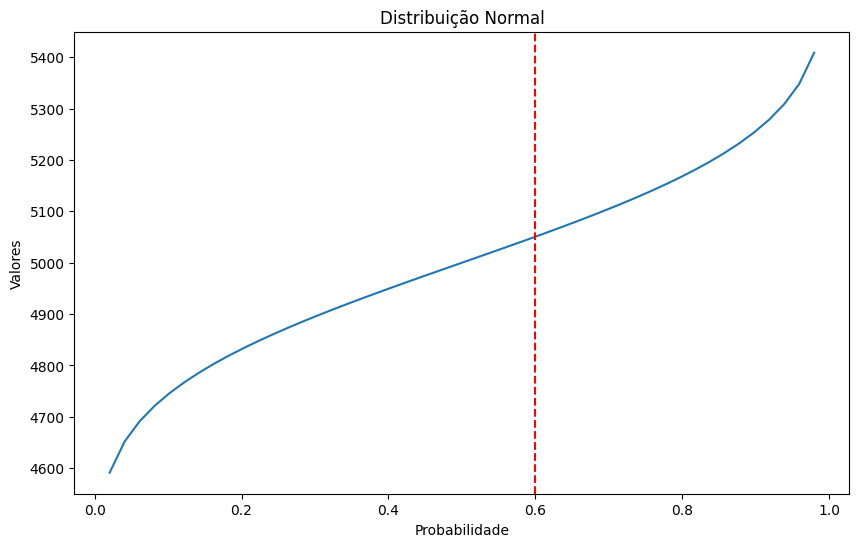

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=x, y=y)
plt.axvline(x=0.6, color='r', linestyle='--')

plt.xlabel('Probabilidade')
plt.ylabel('Valores')
plt.title('Distribuição Normal')

In [ ]:
# CDF
cdf_value = norm.cdf(x=1, loc=loc, scale=scale)
print("CDF:", cdf_value)

# PPF
ppf_value = norm.ppf(q=0.95, loc=loc, scale=scale)
print("PPF:", ppf_value)

### Exponencial

* scale: Parâmetro de escala (inverso da taxa λ). Neste caso, é 5000.

* size: Número de amostras a serem geradas. Neste caso, é sample_size (60).

In [ ]:
np.random.seed(1)
expon_samples = expon.rvs(scale=5000, size=sample_size)
expon_samples[:10]

array([2.69802919e+03, 6.37062627e+03, 5.71906793e-01, 1.80006377e+03,
       7.93547976e+02, 4.84419358e+02, 1.03057317e+03, 2.11988241e+03,
       2.52726271e+03, 3.86979887e+03])

<Axes: ylabel='Count'>

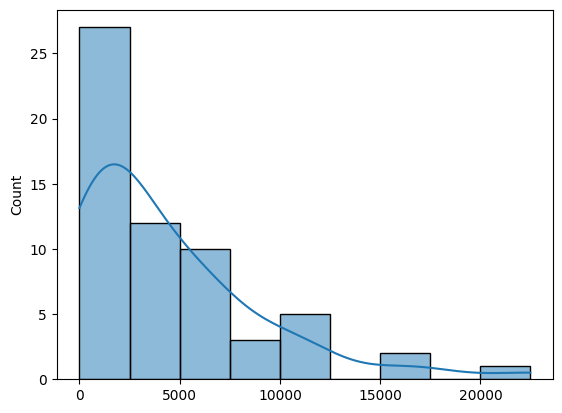

In [ ]:
plt.figure()
sns.histplot(expon_samples,kde=True)

In [162]:
# Parâmetros
loc = 2  # deslocamento
scale = 5000  # escala

# CDF
cdf_value = expon.cdf(x=10000, loc=loc, scale=scale)
print("CDF:", cdf_value)

# PPF
ppf_value = expon.ppf(q=0.95, loc=loc, scale=scale)
print("PPF:", ppf_value)

CDF: 0.8646105718218263
PPF: 14980.66136776995


[1.03960584 1.77412525 0.50011438 0.86001275 0.6587096  0.59688387
 0.70611463 0.92397648 1.00545254 1.27395977]


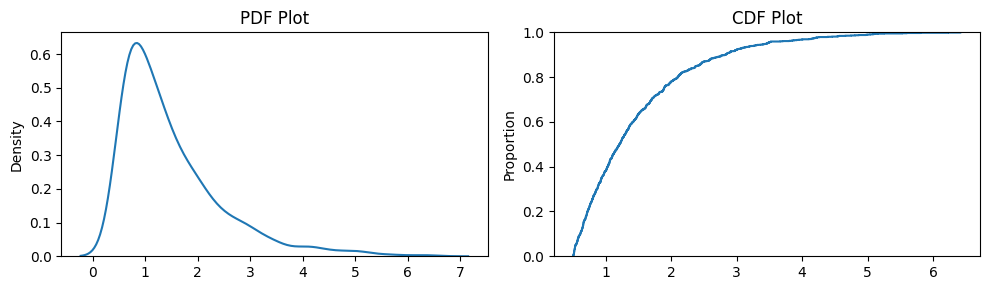

In [163]:
from scipy.stats import expon

rv = expon(1/2)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

### Uniforme

In [ ]:
# Parâmetros
loc = 0  # limite inferior
scale = 1  # largura do intervalo

# CDF
cdf_value = uniform.cdf(x=0.5, loc=loc, scale=scale)
print("CDF:", cdf_value)

# PPF
ppf_value = uniform.ppf(q=0.95, loc=loc, scale=scale)
print("PPF:", ppf_value)

CDF: 0.5
PPF: 0.95


### Beta

In [ ]:
# Parâmetros
a = 2  # parâmetro alfa
b = 5  # parâmetro beta

# CDF
cdf_value = beta.cdf(x=0.5, a=a, b=b)
print("CDF:", cdf_value)

# PPF
ppf_value = beta.ppf(q=0.95, a=a, b=b)
print("PPF:", ppf_value)

### Weibull

In [ ]:
# Parâmetros
c = 1.5  # parâmetro de forma

# CDF
cdf_value = weibull_min.cdf(x=1, c=c)
print("CDF:", cdf_value)

# PPF
ppf_value = weibull_min.ppf(q=0.95, c=c)
print("PPF:", ppf_value)

Explicação dos Parâmetros
* **loc**: Parâmetro de deslocamento (não aplicável para Beta e Weibull).
* **scale**: Parâmetro de escala (não aplicável para Beta e Weibull).
* **x**: O valor no qual calcular a CDF.
* **q**: Quantil para o qual calcular o PPF (percent point function).
* **a** e **b**: Parâmetros de forma da distribuição Beta.
* **c**: Parâmetro de forma da distribuição Weibull.

### Gamma


In [160]:
# Parâmetros
shape = 2  # parâmetro de forma
loc = 0  # deslocamento
scale = 2  # parâmetro de escala

# CDF
cdf_value = gamma.cdf(x=5, a=shape, loc=loc, scale=scale)
print("Gamma CDF:", cdf_value)

# PPF
ppf_value = gamma.ppf(q=0.95, a=shape, loc=loc, scale=scale)
print("Gamma PPF:", ppf_value)

Gamma CDF: 0.7127025048163542
Gamma PPF: 9.487729036781154


[4.75021203 0.98742605 1.06559722 0.62384076 5.07008018 0.85735877
 4.34109604 0.16815469 3.58637333 0.60594455]


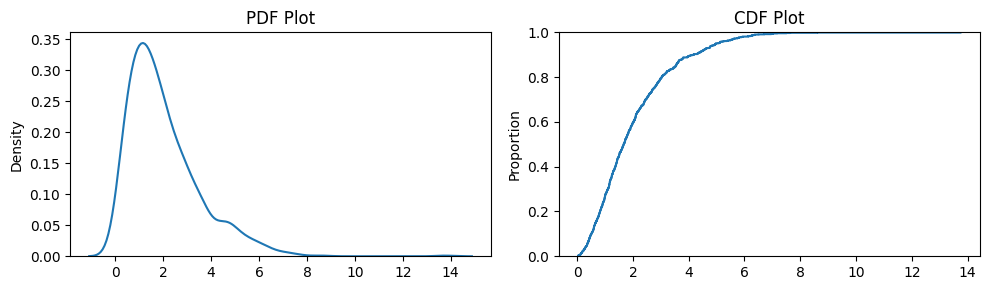

In [161]:
from scipy.stats import gamma

rv = gamma(1.99)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

### Log-normal

In [158]:
# Parâmetros
shape = 0.954  # parâmetro de forma
loc = 0  # deslocamento
scale = 1  # parâmetro de escala

# CDF
cdf_value = lognorm.cdf(x=1, s=shape, loc=loc, scale=scale)
print("Log-Normal CDF:", cdf_value)

# PPF
ppf_value = lognorm.ppf(q=0.95, s=shape, loc=loc, scale=scale)
print("Log-Normal PPF:", ppf_value)

Log-Normal CDF: 0.5
Log-Normal PPF: 4.802758114662604


[4.70970596 0.55787764 0.60418439 0.3592948  2.28324774 0.11128421
 5.28329747 0.4837479  1.35576151 0.78828204]


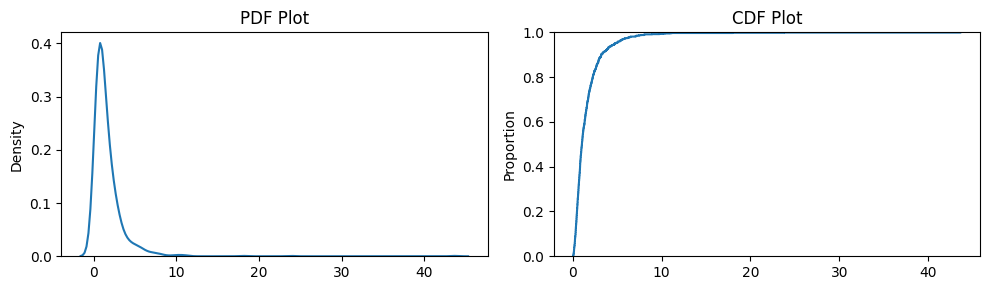

In [159]:
from scipy.stats import lognorm

rv = lognorm(0.954)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

### Cauchy

In [ ]:
# Parâmetros
loc = 0  # mediana
scale = 1  # parâmetro de escala

# CDF
cdf_value = cauchy.cdf(x=1, loc=loc, scale=scale)
print("Cauchy CDF:", cdf_value)

# PPF
ppf_value = cauchy.ppf(q=0.95, loc=loc, scale=scale)
print("Cauchy PPF:", ppf_value)

### Pareto

In [ ]:
# Parâmetros
shape = 2.62  # parâmetro de forma
loc = 0  # deslocamento
scale = 1  # parâmetro de escala

# CDF
cdf_value = pareto.cdf(x=2, b=shape, loc=loc, scale=scale)
print("Pareto CDF:", cdf_value)

# PPF
ppf_value = pareto.ppf(q=0.95, b=shape, loc=loc, scale=scale)
print("Pareto PPF:", ppf_value)

### Binomial

In [ ]:
# Parâmetros
n = 10  # número de tentativas
p = 0.5  # probabilidade de sucesso

# CDF
cdf_value = binom.cdf(k=5, n=n, p=p)
print("Binomial CDF:", cdf_value)

# PPF
ppf_value = binom.ppf(q=0.95, n=n, p=p)
print("Binomial PPF:", ppf_value)

### OUTRO TIPO

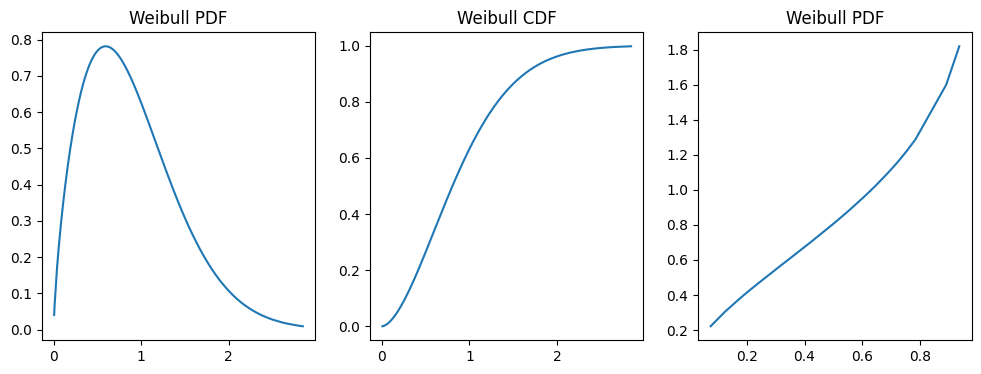

In [152]:
sample_size = 1000
np.random.seed(1)
normal_samples = weibull_min.rvs(c=1.7, size=sample_size)
normal_samples[:10]

fig, ax = plt.subplots(1,3,figsize=(12, 4))
sns.lineplot(x=normal_samples, y=weibull_min.pdf(normal_samples, c=1.7),ax=ax[0])
sns.lineplot(x=normal_samples,y=weibull_min.cdf(normal_samples, c=1.7),ax=ax[1])
sns.lineplot(x=x,y=weibull_min.ppf(x, c=1.7),ax=ax[2])

ax[0].set_title('Weibull PDF')
ax[1].set_title('Weibull CDF')
ax[2].set_title('Weibull PPF')

plt.title('Weibull PDF')
plt.show()

#### Correção

Aumento do linspace

alteração do intervalo do ppf

Razão para Diferentes linspace

***PDF e CDF:***

* PDF (Função de Densidade de Probabilidade) e CDF (Função de Distribuição Acumulada) são calculadas para valores de tempo (ou qualquer variável contínua em questão). O linspace para PDF e CDF cobre o intervalo dos valores possíveis dessa variável.
* Por exemplo, se o intervalo de tempo é de 0 a 10.000 horas, você usa np.linspace(0, 10000, 1000) para gerar os valores de x.

***PPF (Função Quantil):*** 
* PPF (Função Quantil) é a inversa da CDF e fornece o valor do tempo associado a uma dada probabilidade acumulada. Portanto, o intervalo de linspace para PPF deve cobrir o intervalo das probabilidades acumuladas, que é de 0 a 1.
* Usar np.linspace(0.01, 0.99, 1000) gera um intervalo de probabilidades acumuladas (de 1% a 99%) para obter os valores de tempo correspondentes. Isso garante que o PPF seja calculado para todas as probabilidades relevantes sem incluir extremos que poderiam levar a valores infinitos ou não definidos.

## PDF, CDF, PPF, qqplot



### Visão Geral

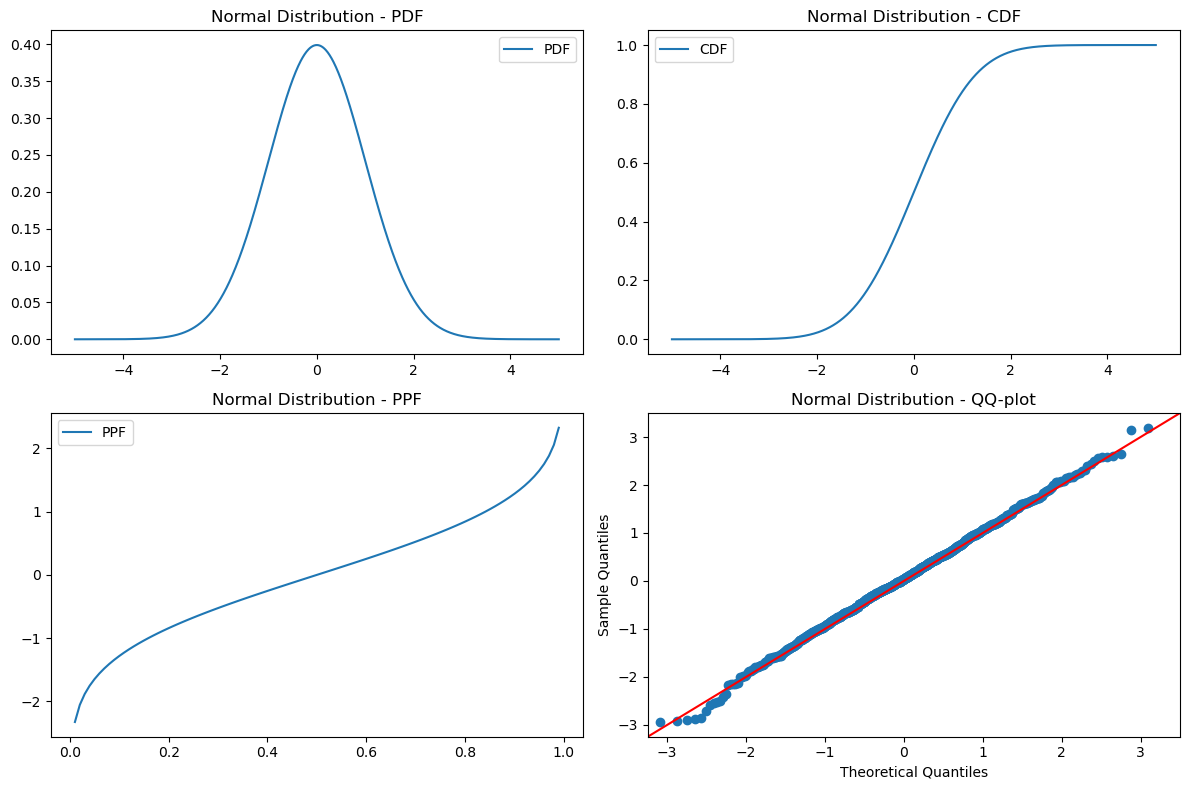

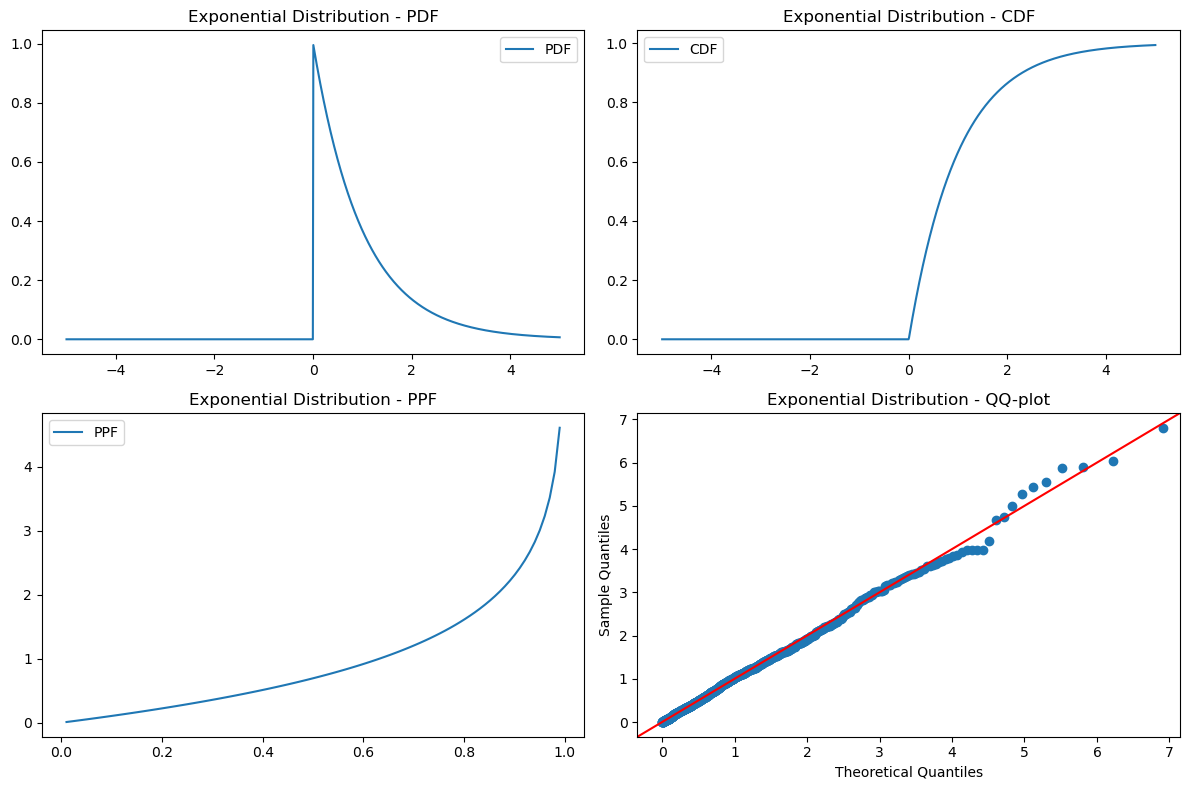

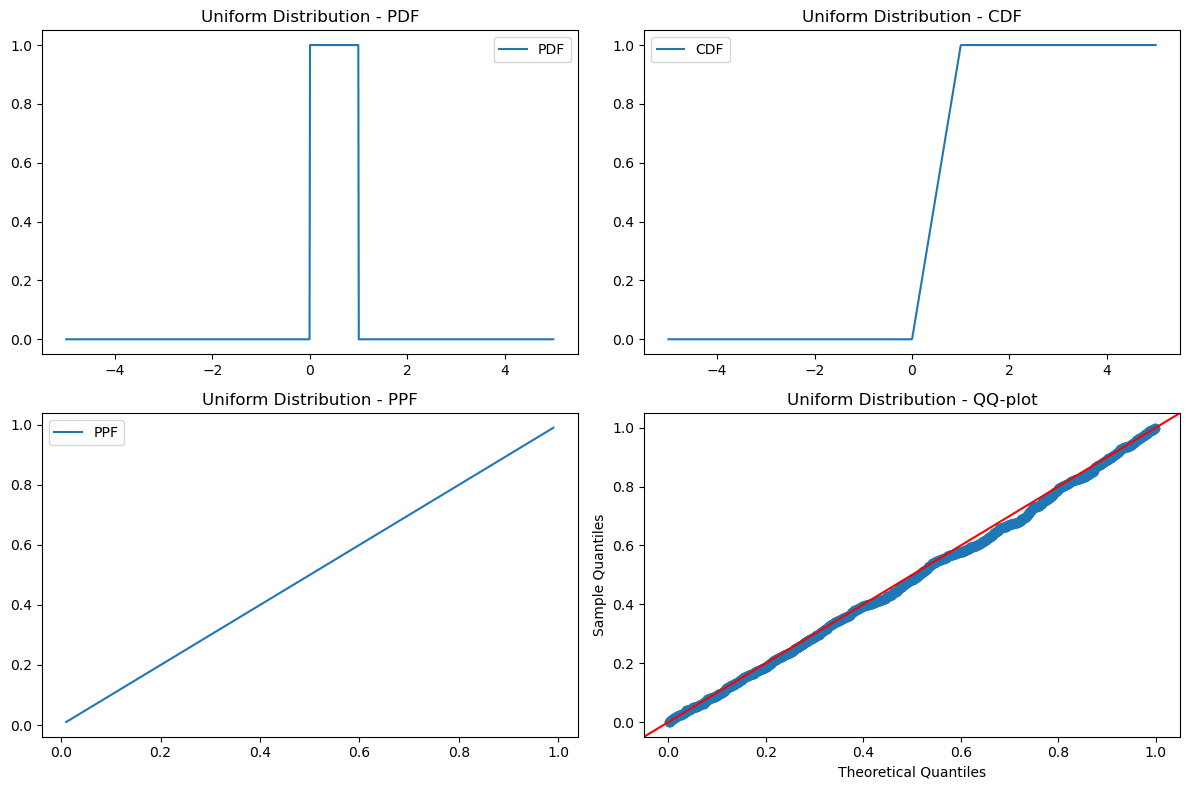

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform, beta, binom, poisson
import statsmodels.api as sm

# Configurações iniciais
x = np.linspace(-5, 5, 1000)

# Exemplo 1: Distribuição Normal
mu, sigma = 0, 1
pdf_norm = norm.pdf(x, mu, sigma)
cdf_norm = norm.cdf(x, mu, sigma)
ppf_values = np.linspace(0.01, 0.99, 100)
ppf_norm = norm.ppf(ppf_values, mu, sigma)

plt.figure(figsize=(12, 8))

# PDF
plt.subplot(2, 2, 1)
plt.plot(x, pdf_norm, label='PDF')
plt.title('Normal Distribution - PDF')
plt.legend()

# CDF
plt.subplot(2, 2, 2)
plt.plot(x, cdf_norm, label='CDF')
plt.title('Normal Distribution - CDF')
plt.legend()

# PPF
plt.subplot(2, 2, 3)
plt.plot(ppf_values, ppf_norm, label='PPF')
plt.title('Normal Distribution - PPF')
plt.legend()

# QQ-plot
plt.subplot(2, 2, 4)
data = norm.rvs(mu, sigma, size=1000)
sm.qqplot(data, line='45', ax=plt.gca())
plt.title('Normal Distribution - QQ-plot')

plt.tight_layout()
plt.show()

# Exemplo 2: Distribuição Exponencial
lambda_exp = 1
pdf_expon = expon.pdf(x, scale=1/lambda_exp)
cdf_expon = expon.cdf(x, scale=1/lambda_exp)
ppf_expon = expon.ppf(ppf_values, scale=1/lambda_exp)

plt.figure(figsize=(12, 8))

# PDF
plt.subplot(2, 2, 1)
plt.plot(x, pdf_expon, label='PDF')
plt.title('Exponential Distribution - PDF')
plt.legend()

# CDF
plt.subplot(2, 2, 2)
plt.plot(x, cdf_expon, label='CDF')
plt.title('Exponential Distribution - CDF')
plt.legend()

# PPF
plt.subplot(2, 2, 3)
plt.plot(ppf_values, ppf_expon, label='PPF')
plt.title('Exponential Distribution - PPF')
plt.legend()

# QQ-plot
plt.subplot(2, 2, 4)
data = expon.rvs(scale=1/lambda_exp, size=1000)
sm.qqplot(data, dist=expon, line='45', ax=plt.gca())
plt.title('Exponential Distribution - QQ-plot')

plt.tight_layout()
plt.show()

# Exemplo 3: Distribuição Uniforme
a, b = 0, 1
pdf_uniform = uniform.pdf(x, a, b-a)
cdf_uniform = uniform.cdf(x, a, b-a)
ppf_uniform = uniform.ppf(ppf_values, a, b-a)

plt.figure(figsize=(12, 8))

# PDF
plt.subplot(2, 2, 1)
plt.plot(x, pdf_uniform, label='PDF')
plt.title('Uniform Distribution - PDF')
plt.legend()

# CDF
plt.subplot(2, 2, 2)
plt.plot(x, cdf_uniform, label='CDF')
plt.title('Uniform Distribution - CDF')
plt.legend()

# PPF
plt.subplot(2, 2, 3)
plt.plot(ppf_values, ppf_uniform, label='PPF')
plt.title('Uniform Distribution - PPF')
plt.legend()

# QQ-plot
plt.subplot(2, 2, 4)
data = uniform.rvs(a, b-a, size=1000)
sm.qqplot(data, dist=uniform, line='45', ax=plt.gca())
plt.title('Uniform Distribution - QQ-plot')

plt.tight_layout()
plt.show()


### PDF - Função Densidade de Probabilidade `pdf(x, loc=0, scale=1)`, $P(x=x_0)$

$$= P(X=x_0)$$

Função de probabilidade

A PDF descreve a probabilidade relativa de uma variável aleatória contínua assumir um valor específico. Para uma variável contínua, a probabilidade de ela assumir exatamente um valor é zero; em vez disso, consideramos a probabilidade em um intervalo.



In [ ]:
mu = x.mean()
sigma = x.std()
mu, sigma

(39.36666666666667, 1.682920741515245)

In [ ]:
funcao_sapatos = norm(loc=mu,scale=sigma)


In [ ]:
funcao_sapatos.pdf(39)

0.23149334534231303

In [ ]:
funcao_sapatos.pdf(np.linspace(33,46,100))

array([1.84952252e-04, 2.47704793e-04, 3.29735056e-04, 4.36266397e-04,
       5.73712525e-04, 7.49881825e-04, 9.74198041e-04, 1.25793327e-03,
       1.61444734e-03, 2.05942553e-03, 2.61110434e-03, 3.29047269e-03,
       4.12143336e-03, 5.13090768e-03, 6.34886434e-03, 7.80825203e-03,
       9.54481522e-03, 1.15967730e-02, 1.40043422e-02, 1.68090899e-02,
       2.00531044e-02, 2.37779800e-02, 2.80236194e-02, 3.28268661e-02,
       3.82199883e-02, 4.42290492e-02, 5.08722076e-02, 5.81580041e-02,
       6.60836969e-02, 7.46337211e-02, 8.37783471e-02, 9.34726184e-02,
       1.03655645e-01, 1.14250322e-01, 1.25163540e-01, 1.36286918e-01,
       1.47498101e-01, 1.58662618e-01, 1.69636277e-01, 1.80268056e-01,
       1.90403421e-01, 1.99887965e-01, 2.08571264e-01, 2.16310812e-01,
       2.22975892e-01, 2.28451241e-01, 2.32640359e-01, 2.35468342e-01,
       2.36884105e-01, 2.36861918e-01, 2.35402186e-01, 2.32531434e-01,
       2.28301505e-01, 2.22788007e-01, 2.16088060e-01, 2.08317454e-01,
      

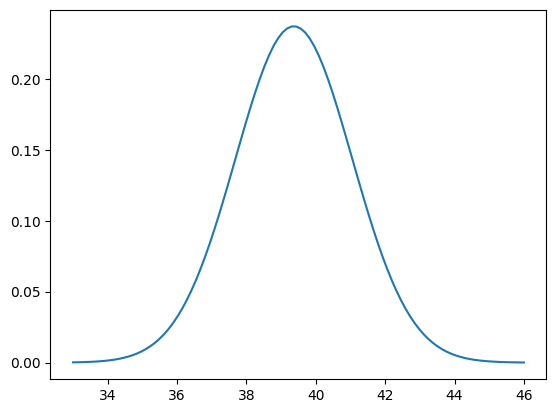

In [ ]:
plt.plot(np.linspace(33,46,100),funcao_sapatos.pdf(np.linspace(33,46,100)))
plt.show()

### CDF -  Função de Distribuição Acumulada  `cdf(x, loc=0, scale=1)`, $P(x | x\le x_0)$

$$= P(X \le x_0)$$

Distribuição de Probabilidade Acumulada

A CDF fornece a probabilidade de que uma variável aleatória tome um valor menor ou igual a um valor específico. A CDF é a integral da PDF e sempre aumenta de 0 para 1.

In [ ]:
funcao_sapatos.cdf(40)

0.6466641598445435

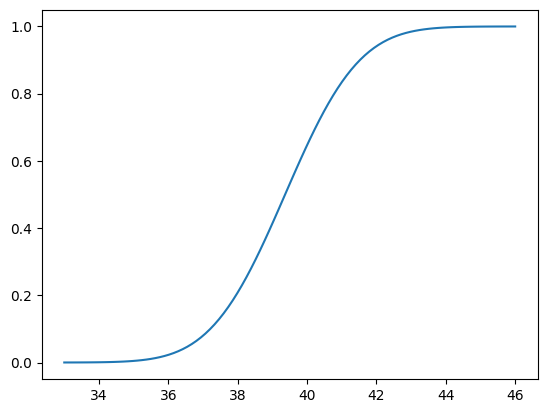

In [ ]:
plt.plot(np.linspace(33,46,100),funcao_sapatos.cdf(np.linspace(33,46,100)))
plt.show()

### PPF - Função Percent Point  `ppf(x, loc=0, scale=1)`, $x_0 | P(x|x\le x_0) = p$


$$= x_0 | P(X \le x_0) = P_0 $$

Função inversa de CDF

Dada a probabilidade p a ppf retorna o valor x tal que $$P(X \le x) = p $$



In [ ]:
funcao_sapatos.ppf(0.9)

41.52341637764301

In [ ]:
funcao_sapatos.cdf(40), funcao_sapatos.ppf(funcao_sapatos.cdf(40))

(0.6466641598445435, 40.0)

In [ ]:
f"cdf(ppf(40)) = {funcao_sapatos.ppf(funcao_sapatos.cdf(40))} "

'cdf(ppf(40)) = 40.0 '

In [ ]:
f"ppf(cdf(0.2)) = {funcao_sapatos.cdf(funcao_sapatos.ppf(0.2))} "

'ppf(cdf(0.2)) = 0.2000000000000004 '

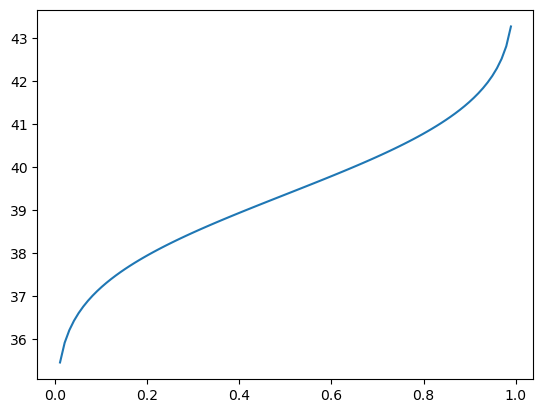

In [ ]:
plt.plot(np.linspace(0,1,100),funcao_sapatos.ppf(np.linspace(0,1,100)))
plt.show()

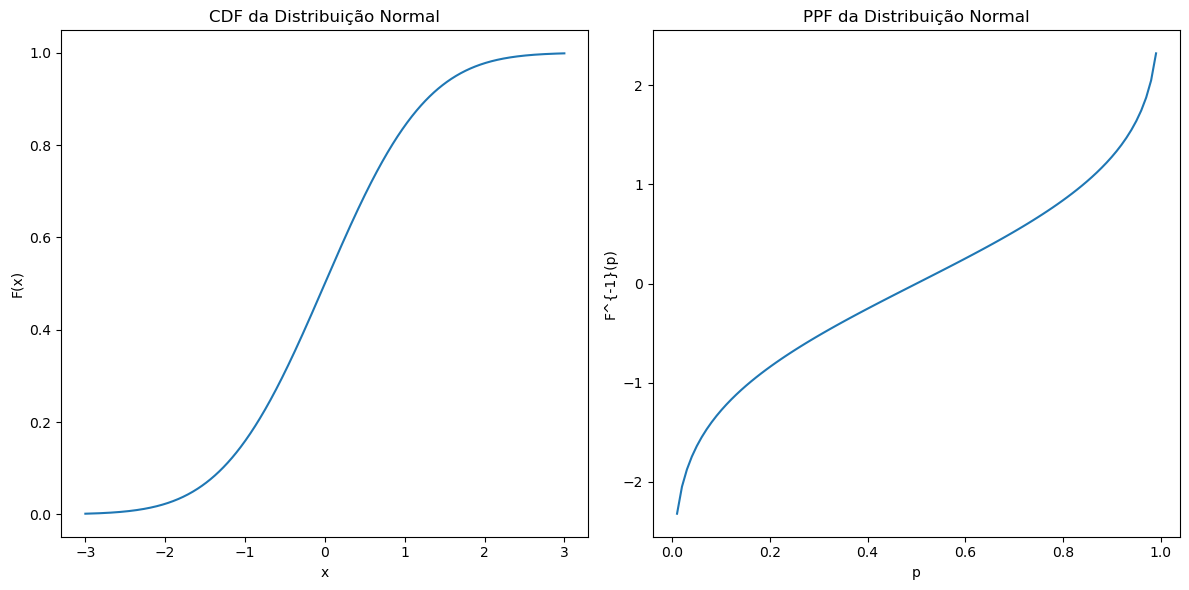

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definindo a distribuição normal padrão
distribuicao = norm

# Gerando valores x para a CDF
x_values = np.linspace(-3, 3, 1000)
cdf_values = distribuicao.cdf(x_values)

# Gerando probabilidades p para a PPF
p_values = np.linspace(0, 1, 100)
ppf_values = distribuicao.ppf(p_values)

# Plotando a CDF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, cdf_values)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF da Distribuição Normal')

# Plotando a PPF
plt.subplot(1, 2, 2)
plt.plot(p_values, ppf_values)
plt.xlabel('p')
plt.ylabel('F^{-1}(p)')
plt.title('PPF da Distribuição Normal')

plt.tight_layout()
plt.show()


In [ ]:
# Valor x
x = 1.0

# Calculando a CDF em x
cdf_x = distribuicao.cdf(x)
print(f"CDF({x}) = {cdf_x}")

# Calculando a PPF na probabilidade obtida da CDF
ppf_cdf_x = distribuicao.ppf(cdf_x)
print(f"PPF(CDF({x})) = {ppf_cdf_x}")

# Probabilidade p
p = 0.8413

# Calculando a PPF em p
ppf_p = distribuicao.ppf(p)
print(f"PPF({p}) = {ppf_p}")

# Calculando a CDF no valor obtido da PPF
cdf_ppf_p = distribuicao.cdf(ppf_p)
print(f"CDF(PPF({p})) = {cdf_ppf_p}")


CDF(1.0) = 0.8413447460685429
PPF(CDF(1.0)) = 1.0
PPF(0.8413) = 0.9998150936147446
CDF(PPF(0.8413)) = 0.8413


In [ ]:
funcao_sapatos.rvs(size=1000)

array([42.81633796, 39.3678158 , 40.68292947, 38.03564569, 38.05423597,
       41.18756134, 37.09543687, 38.6678948 , 39.4239321 , 39.55409793,
       39.06526686, 40.03279999, 40.53268799, 40.60300343, 37.70763699,
       38.88845616, 41.37735787, 40.87228697, 37.05625302, 39.95817948,
       36.03747036, 39.44565439, 42.56045814, 37.77143835, 37.96256711,
       40.65246823, 36.770254  , 38.3017901 , 40.37042983, 38.29921386,
       38.96954788, 40.61907223, 40.07609531, 39.81570088, 38.79595075,
       39.98945019, 39.15843437, 40.13711722, 38.53036945, 39.05941755,
       37.70064616, 39.30775163, 38.00181649, 37.49181479, 39.80197288,
       39.72469085, 40.68418111, 38.6411165 , 40.05338727, 40.29361533,
       40.11518573, 37.97715696, 39.61803357, 39.97948592, 39.37874746,
       35.85529014, 39.63675798, 43.09018104, 38.76074911, 38.14137062,
       39.9949827 , 39.89237444, 41.37394542, 37.24977426, 40.59752166,
       40.3603002 , 39.12744531, 39.93665058, 41.09916201, 40.83

In [ ]:
funcao_sapatos.cdf(40)

0.6466641598445435

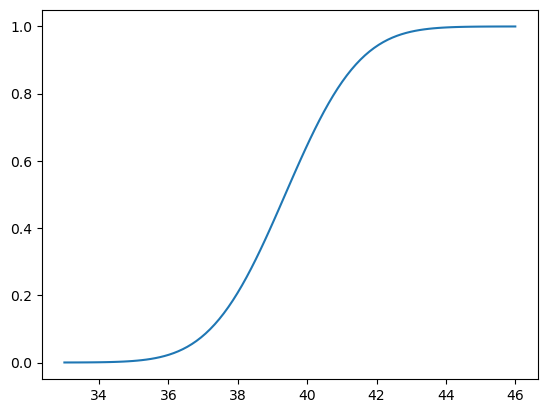

In [ ]:
plt.plot(np.linspace(33,46,100),funcao_sapatos.cdf(np.linspace(33,46,100)))
plt.show()

In [ ]:
funcao_sapatos.pdf(39) # prob de ser 39

0.23149334534231303

In [ ]:
funcao_sapatos.pdf(np.linspace(33,46,100))

array([1.84952252e-04, 2.47704793e-04, 3.29735056e-04, 4.36266397e-04,
       5.73712525e-04, 7.49881825e-04, 9.74198041e-04, 1.25793327e-03,
       1.61444734e-03, 2.05942553e-03, 2.61110434e-03, 3.29047269e-03,
       4.12143336e-03, 5.13090768e-03, 6.34886434e-03, 7.80825203e-03,
       9.54481522e-03, 1.15967730e-02, 1.40043422e-02, 1.68090899e-02,
       2.00531044e-02, 2.37779800e-02, 2.80236194e-02, 3.28268661e-02,
       3.82199883e-02, 4.42290492e-02, 5.08722076e-02, 5.81580041e-02,
       6.60836969e-02, 7.46337211e-02, 8.37783471e-02, 9.34726184e-02,
       1.03655645e-01, 1.14250322e-01, 1.25163540e-01, 1.36286918e-01,
       1.47498101e-01, 1.58662618e-01, 1.69636277e-01, 1.80268056e-01,
       1.90403421e-01, 1.99887965e-01, 2.08571264e-01, 2.16310812e-01,
       2.22975892e-01, 2.28451241e-01, 2.32640359e-01, 2.35468342e-01,
       2.36884105e-01, 2.36861918e-01, 2.35402186e-01, 2.32531434e-01,
       2.28301505e-01, 2.22788007e-01, 2.16088060e-01, 2.08317454e-01,
      

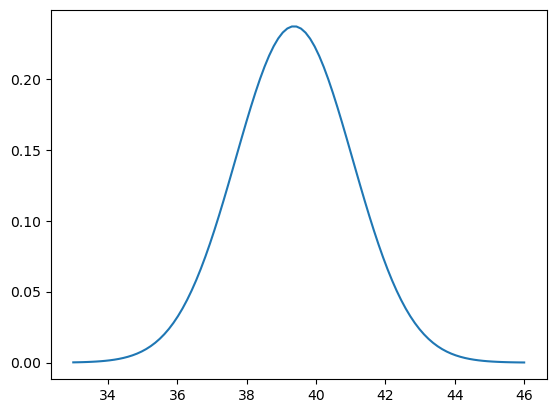

In [ ]:
plt.plot(np.linspace(33,46,100),funcao_sapatos.pdf(np.linspace(33,46,100)))
plt.show()

### qqplot - Quantile-Quantile Plot



Um QQ-plot (Quantile-Quantile Plot) é uma técnica gráfica usada para comparar a distribuição de uma amostra com uma distribuição teórica, ou para comparar duas distribuições amostrais entre si. Ele é amplamente utilizado em estatística para verificar se uma amostra de dados segue uma determinada distribuição, como a distribuição normal.



1- ***Quantis***:

* **Quantis de uma amostra**: São valores que dividem a amostra de dados em partes iguais. Por exemplo, o 25º percentil é o valor abaixo do qual 25% dos dados se encontram.
* **Quantis teóricos**: São os quantis esperados de uma distribuição teórica (por exemplo, distribuição normal) para um dado tamanho de amostra.
2 - ***Plotagem***:

* No QQ-plot, os quantis da amostra são plotados no eixo y e os quantis teóricos no eixo x.
* Se os dados da amostra seguem a distribuição teórica, os pontos no QQ-plot devem aproximadamente seguir uma linha reta (linha de 45 graus).
#### Interpretação do QQ-plot
* **Linha reta**: Se os pontos seguem uma linha reta, isso sugere que a amostra de dados segue a distribuição teórica.
* **Desvios da linha**:

  * **Curva convexa**: Pode indicar uma distribuição com caudas mais pesadas (maior variabilidade) do que a distribuição teórica.
  * **Curva côncava**: Pode indicar uma distribuição com caudas mais leves (menor variabilidade) do que a distribuição teórica.

  * **S-shaped curve**: Pode indicar que a distribuição da amostra tem caudas mais pesadas em uma extremidade e mais leves na outra.

##### prof

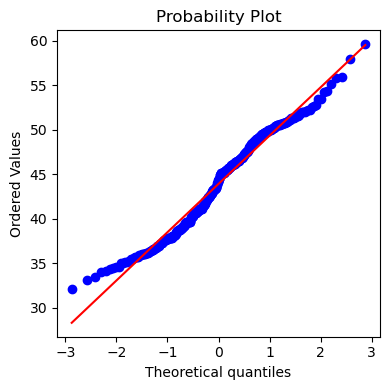

In [ ]:
import scipy.stats as stats

fig, ax = plt.subplots(1,1,figsize=(4,4))

stats.probplot(penguins['bill_length_mm'].dropna(),dist="norm", plot=ax)

plt.tight_layout()
plt.show()

##### Resumo

O QQ-plot é uma ferramenta gráfica para comparar a distribuição de uma amostra com uma distribuição teórica ou entre duas distribuições amostrais.
Interpretação: Uma linha reta indica que a amostra segue a distribuição teórica. Desvios indicam diferenças entre a distribuição da amostra e a distribuição teórica.
Aplicação: Usado para verificar normalidade, identificar a presença de caudas pesadas ou leves, e comparar diferentes distribuições.

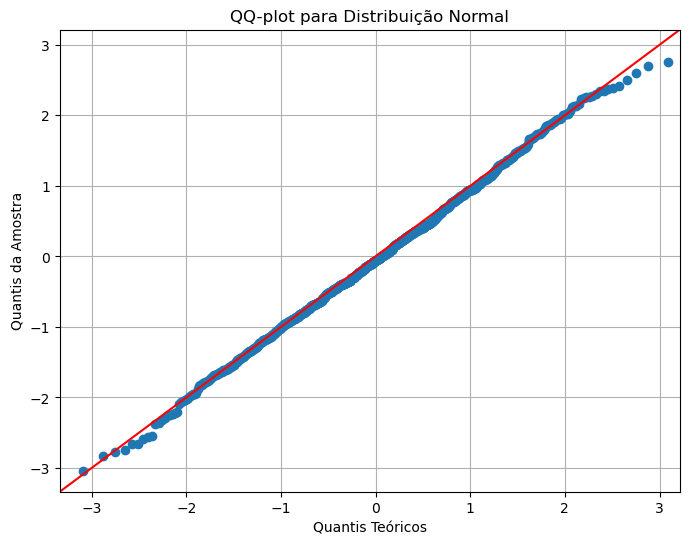

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Gerar dados da distribuição normal
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# QQ-plot
plt.figure(figsize=(8, 6))
sm.qqplot(data, line='45', ax=plt.gca())
plt.title('QQ-plot para Distribuição Normal')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')
plt.grid(True)
plt.show()


##### Exemplo com dados que não seguem uma distribuição normal


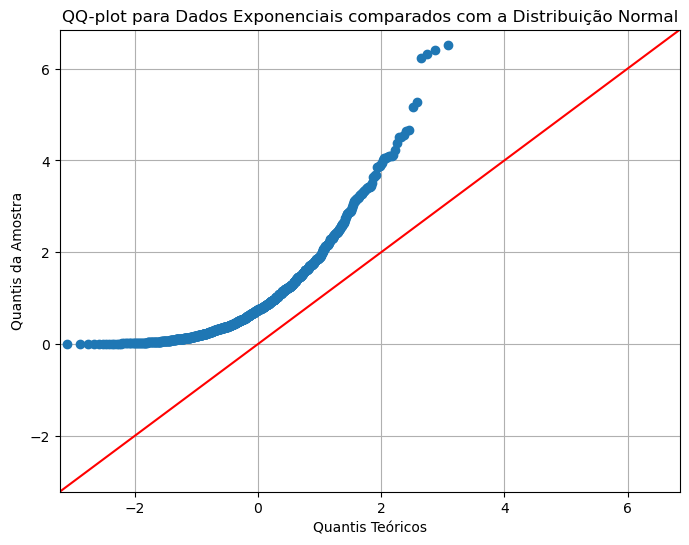

In [ ]:
# Gerar dados da distribuição exponencial
data_expon = np.random.exponential(scale=1, size=1000)

# QQ-plot comparando com a distribuição normal
plt.figure(figsize=(8, 6))
sm.qqplot(data_expon, dist=stats.norm, line='45', ax=plt.gca())
plt.title('QQ-plot para Dados Exponenciais comparados com a Distribuição Normal')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')
plt.grid(True)
plt.show()


#### Exemplo de QQ-plot comparando duas amostras


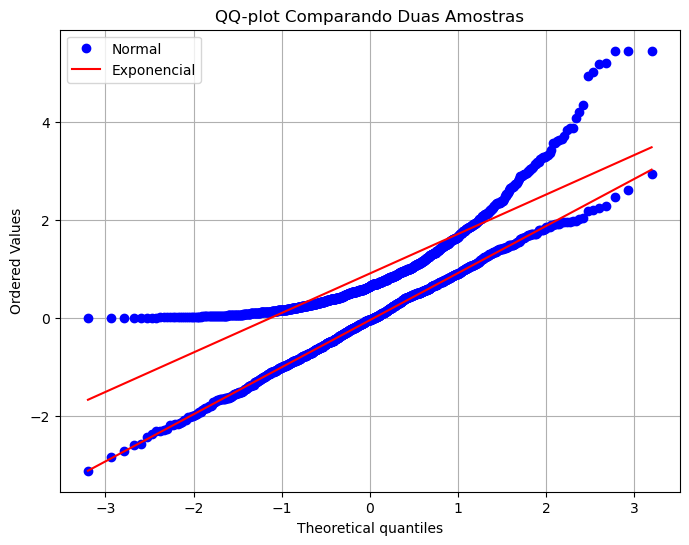

In [ ]:
# Gerar duas amostras de diferentes distribuições
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.exponential(scale=1, size=1000)

# QQ-plot comparando duas amostras
plt.figure(figsize=(8, 6))
stats.probplot(data1, dist="norm", plot=plt)
stats.probplot(data2, dist="norm", plot=plt)
plt.legend(['Normal', 'Exponencial'])
plt.title('QQ-plot Comparando Duas Amostras')
plt.grid(True)
plt.show()


### Exercicios Exemplo Distribuição

In [ ]:
from scipy.stats import lognorm, norm, expon, weibull_min

##### Ex1

As vendas diárias de uma loja têm média de R$ 5000. Em geral o volume de vendas tem uma distribuição lognorm. O valor do desvio padrão da distribuição lognormal é 0.5 (note, este é s, shape da distribuição lognorm).


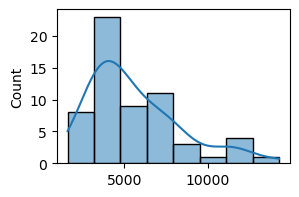

array([11263.9864252 ,  3682.38155891,  3839.53795946,  2924.00309789,
        7707.09803598,  1581.96629529, 11963.30196612,  3417.24428614,
        5864.73595401,  4413.87383583])

In [ ]:

np.random.seed(1)
x = lognorm.rvs(s=0.5, scale=5000, size=60)
fig = plt.figure(figsize=(3,2))
sns.histplot(x, kde=True)
plt.show()
x[0:10]

In [ ]:
shape, loc, scale = lognorm.fit(x, floc=0)  # floc=0 força o deslocamento (loc) a ser 0
shape, loc, scale


(0.4632259381029043, 0.0, 5020.82910233391)

In [ ]:
lognorm.cdf(3000,s=0.5,scale=5000) #Qual a probabilidade das vendas ficarem abaixo de R$ 3000.

0.15347299656473

In [ ]:
1 - lognorm.cdf(8000,s=0.5,scale=5000) # Qual a probabilidade das vendas ficarem acima de R$ 8000.


0.17360691875027223

In [ ]:
lognorm.ppf(1 - 0.9,s=0.5,scale=5000) # Qual o valor mínimo que você pode esperar vender em 90% dos dias? (renda mínima garantida)

2634.4175914801826

O valor mínimo que você pode esperar vender em 90% dos dias (renda mínima garantida) é encontrado calculando o 10º percentil da distribuição normal das vendas diárias. Isso é feito usando a função PPF da distribuição normal, fornecendo a média e o desvio padrão das vendas diárias. Este valor representa o ponto abaixo do qual estão 10% das vendas, garantindo que em 90% dos dias as vendas serão maiores ou iguais a este valor.

In [ ]:

# Exemplo de dados de vendas diárias (em unidades monetárias)
# sales = np.random.normal(loc=200, scale=50, size=365)  # Média = 200, Desvio padrão = 50, 365 dias
# sales = lognorm.rvs(s=0.5, scale=5000, size=60)
sales = x
# Calcular a média e o desvio padrão das vendas
mu = np.mean(sales)
sigma = np.std(sales)

# Encontrar o 10º percentil (valor mínimo garantido em 90% dos dias)
percentile_10 = stats.norm.ppf(0.10, loc=mu, scale=sigma)

print(f'Média das vendas diárias: {mu}')
print(f'Desvio padrão das vendas diárias: {sigma}')
print(f'Valor mínimo garantido em 90% dos dias: {percentile_10}')


Média das vendas diárias: 5595.574660178531
Desvio padrão das vendas diárias: 2726.0818952460077
Valor mínimo garantido em 90% dos dias: 2101.960139523219


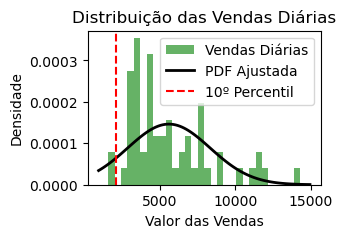

In [ ]:
# Plotar o histograma das vendas diárias
plt.figure(figsize=(3,2))
plt.hist(sales, bins=30, density=True, alpha=0.6, color='g', label='Vendas Diárias')

# Plotar a PDF da distribuição normal ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='PDF Ajustada')

# Marcar o 10º percentil
plt.axvline(percentile_10, color='r', linestyle='--', label='10º Percentil')
plt.title('Distribuição das Vendas Diárias')
plt.xlabel('Valor das Vendas')
plt.ylabel('Densidade')
plt.legend()
plt.show()


#### Ex2


A fila de atendimento de um serviço de saúde tem nos finais de semana taxa de chegada de 3 pacientes por hora e taxa de atendimento (serviço) de 4 pacientes por hora. Filas desse tipo são modeladas com distribuição exponencial (poisson).

Dica: Empregue `mean_time_in_system = 1 / (mu_service - lambda_arrival)` para sua distribuição, e sempre `mu_service > lambda_arrival`.



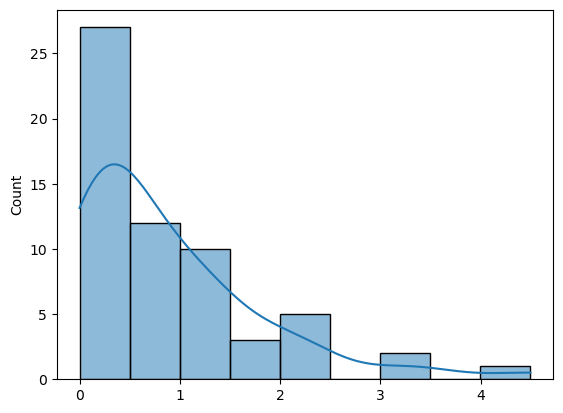

array([5.39605837e-01, 1.27412525e+00, 1.14381359e-04, 3.60012755e-01,
       1.58709595e-01, 9.68838717e-02, 2.06114634e-01, 4.23976482e-01,
       5.05452542e-01, 7.73959775e-01])

In [ ]:
np.random.seed(1)
mean_time_in_system = 1 / (4 - 3)

x = expon.rvs(scale=mean_time_in_system, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

In [ ]:
expon.cdf(1, scale=mean_time_in_system) # Qual a probabilidade de espera de até 1h na fila de atendimento?

0.6321205588285577

In [ ]:
1 - expon.cdf(1, scale=mean_time_in_system)  # Qual a probabilidade de espera de mais de 1h na fila de atendimento?

0.36787944117144233

O setor precisa garantir, para não ter penalidades, que 90% dos atendimentos são realizados em menos de 2h. O setor está atendendo essa demanda? NÃO

In [ ]:
expon.ppf(0.90, scale=mean_time_in_system)

2.302585092994046

In [ ]:
(1 - expon.cdf(1, scale=mean_time_in_system)) - (1 - expon.cdf(2, scale=mean_time_in_system))# Qual o percentual de pacientes atendidos entre 1h e 2h de atendimento?

0.23254415793482963

In [ ]:
# Outra forma
-(expon.cdf(1, scale=mean_time_in_system)) + (expon.cdf(2, scale=mean_time_in_system))# Qual o percentual de pacientes atendidos entre 1h e 2h de atendimento?


0.23254415793482963

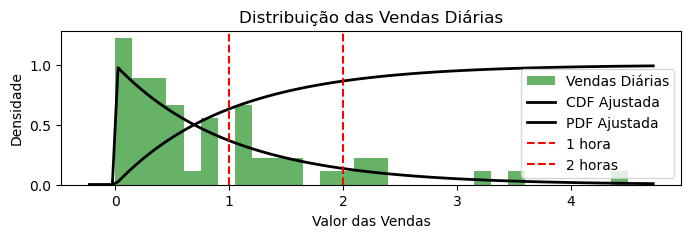

In [ ]:
# Plotar o histograma das vendas diárias
plt.figure(figsize=(8,2))
plt.hist(x, bins=30, density=True, alpha=0.6, color='g', label='Vendas Diárias')

# Plotar a PDF da distribuição normal ajustada
xmin, xmax = plt.xlim()
x1 = np.linspace(xmin, xmax, 100)
p = stats.expon.cdf(x1, scale=mean_time_in_system)
plt.plot(x1, p, 'k', linewidth=2, label='CDF Ajustada')
p = stats.expon.pdf(x1, scale=mean_time_in_system)
plt.plot(x1, p, 'k', linewidth=2, label='PDF Ajustada')

# Marcar o 10º percentil
plt.axvline(1, color='r', linestyle='--', label='1 hora')
plt.axvline(2, color='r', linestyle='--', label='2 horas')
plt.title('Distribuição das Vendas Diárias')
plt.xlabel('Valor das Vendas')
plt.ylabel('Densidade')
plt.legend()
plt.show()

Uma peça do trem de pouso de uma aeronave tem uma vida útil de 5000 horas e uma taxa de falhas crescente ao longo do tempo estimada em 1.5.

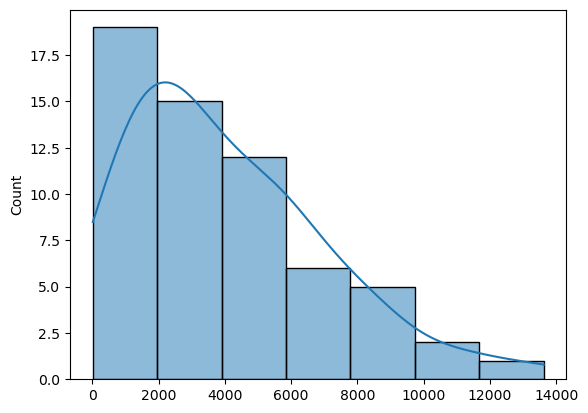

array([3314.01469915, 5876.40094596,   11.78166957, 2530.35776144,
       1465.67875777, 1054.72116597, 1744.65364761, 2821.83218212,
       3172.66044575, 4214.8513656 ])

In [ ]:
np.random.seed(1)
lambda_scale = 5000  # escala, vida média em horas
k_shape = 1.5  # forma, <1 pouquissímas falhas, =1 taxa constante (exponencial), >1.5 taxa aumenta, modelando por exemplo desgaste

x = weibull_min.rvs(c=k_shape, scale=lambda_scale, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

In [ ]:
weibull_min.cdf(1000,c=k_shape, scale=lambda_scale)  # Qual a probabilidade de falha dessa peça em menos de 1000h?

0.08555935639278299

Você tem 500 peças que foram compradas e instaladas em um lote único (mesma data). Considerando 2000h (cerca de 90 dias), qual estoque de reposição precisa haver para garantir cobrir 90 das falhas nessas próximas 2000h?

In [ ]:
# *
weibull_min.cdf(2000,c=k_shape,scale=lambda_scale) * 500 # numero de peças com falha

111.7591534371911

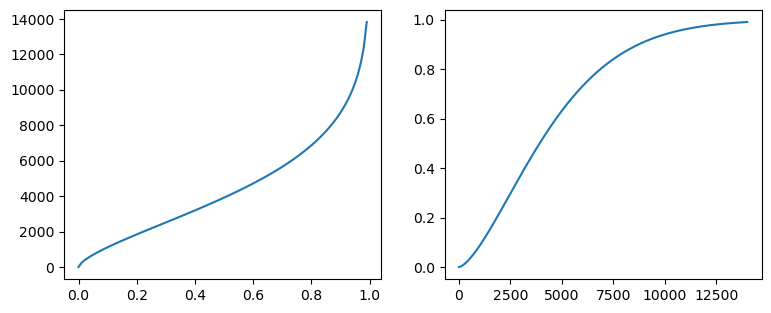

In [ ]:
plt.figure(figsize=(9,3.5))

plt.subplot(1,2,1)
plt.plot(np.linspace(0,1,100),weibull_min.ppf(np.linspace(0,1,100),c=k_shape,scale=lambda_scale))
plt.subplot(1,2,2)
plt.plot(np.linspace(0,14000,14000),weibull_min.cdf(np.linspace(0,14000,14000),c=k_shape,scale=lambda_scale))


In [ ]:
weibull_min.ppf(0.1,c=k_shape,scale=lambda_scale) # Qual o tempo de vida dos 10% de peças que apresentam falhas mais cedo?

1115.3776281845855

# Estatistica

## Linha de Tendência

z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)        (x,y,grau do polinomio)

p = np.poly1d(z)

ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')


/tmp/ipykernel_79423/2124405239.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])


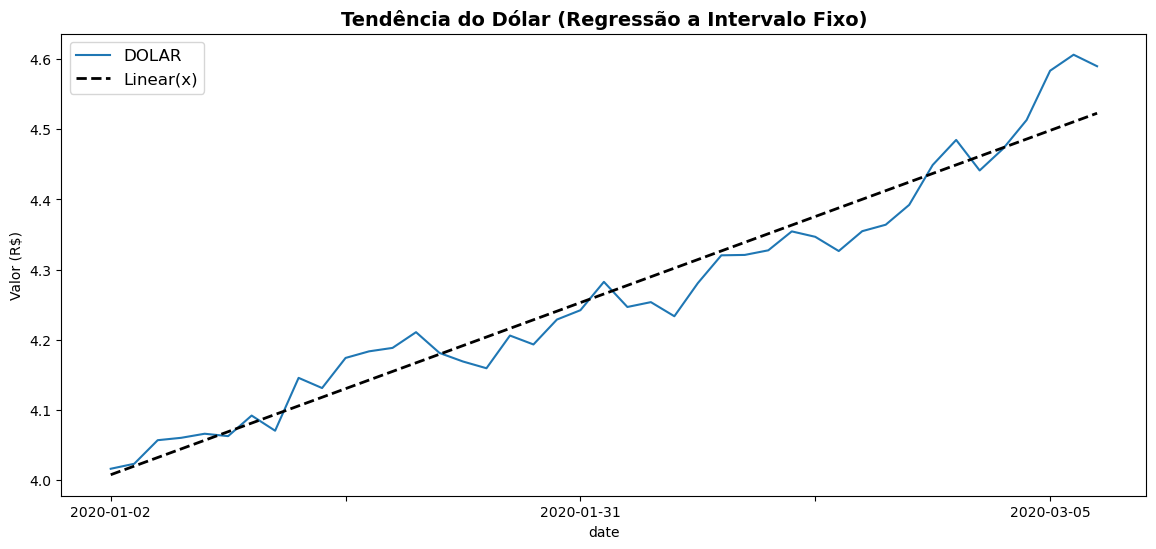

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.index, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

# OU
# x = np.arange(0,len(bovespa),1)
# z = np.polyfit(x,bovespa.DOLAR, 1)
# p = np.poly1d(z)
# ax.plot(bovespa.data,p(x), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])

plt.show()

AttributeError: 'DataFrame' object has no attribute 'dataset'

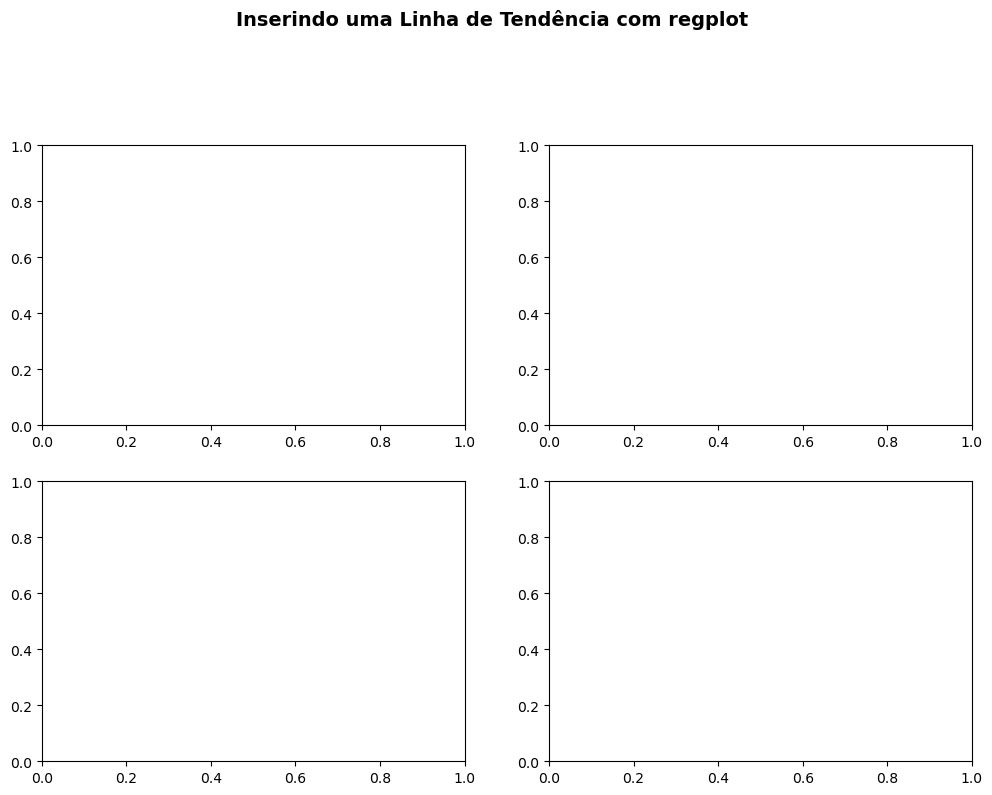

In [ ]:
# VER DEPOIS

fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência com regplot', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  sns.regplot(x='x', y='y', data=ds, ax=ax[i//2,i%2])
  i += 1

plt.tight_layout()
plt.show()

/home/anahelena/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/anahelena/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_79423/560552406.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])


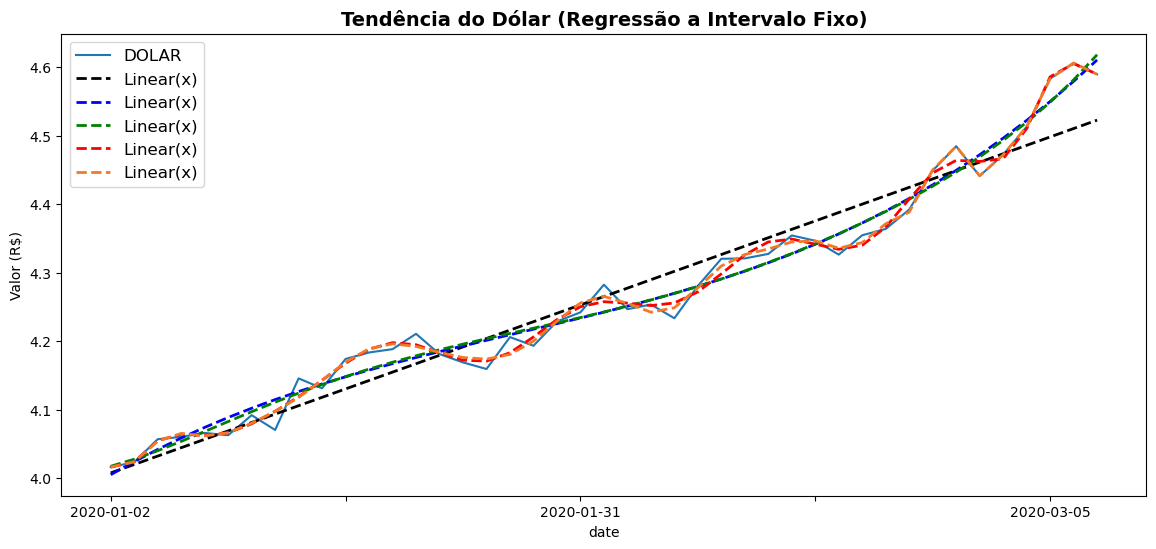

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.index, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')
# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 3)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='b')
# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 6)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='g')
# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR, 20)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='r')
# Fazendo a regressão
z = np.polyfit(bovespa.index,bovespa.DOLAR,70)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='#F37928')

# OU
# x = np.arange(0,len(bovespa),1)
# z = np.polyfit(x,bovespa.DOLAR, 1)
# p = np.poly1d(z)
# ax.plot(bovespa.data,p(x), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])

plt.show()

AttributeError: 'DataFrame' object has no attribute 'dataset'

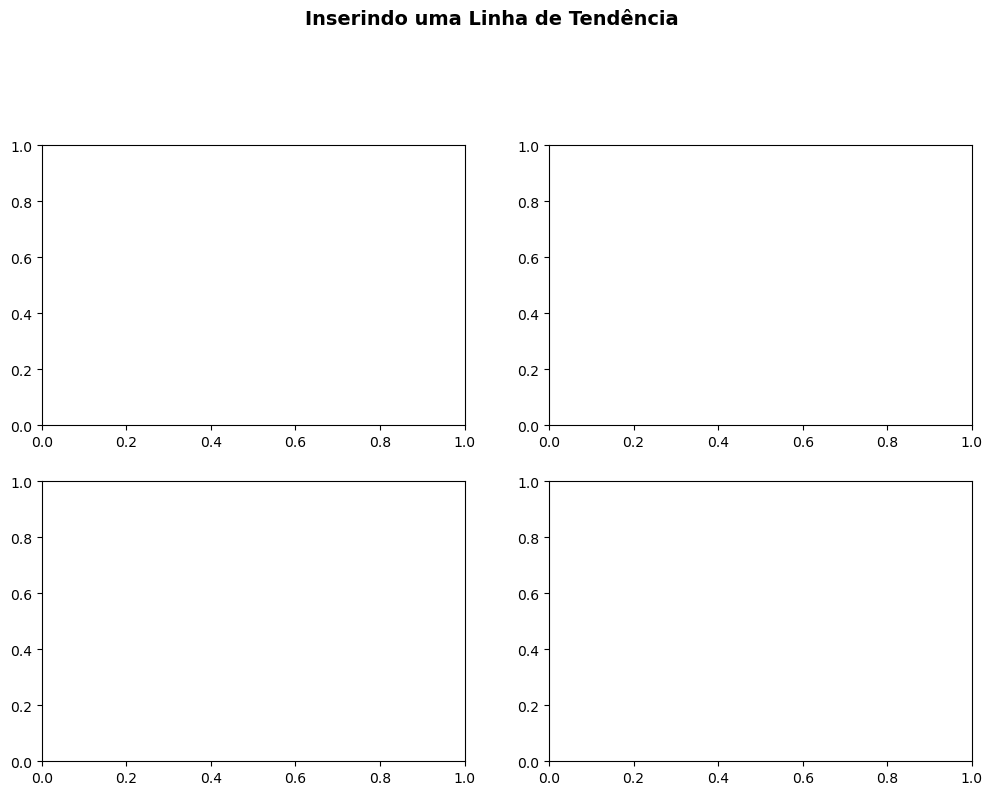

In [ ]:
# Ver depois
z = np.polyfit(ds.x, ds.y, 2)
p = np.poly1d(z)
fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 1)
  p = np.poly1d(z)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange', linestyle='dashed')

  i += 1

plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'dataset'

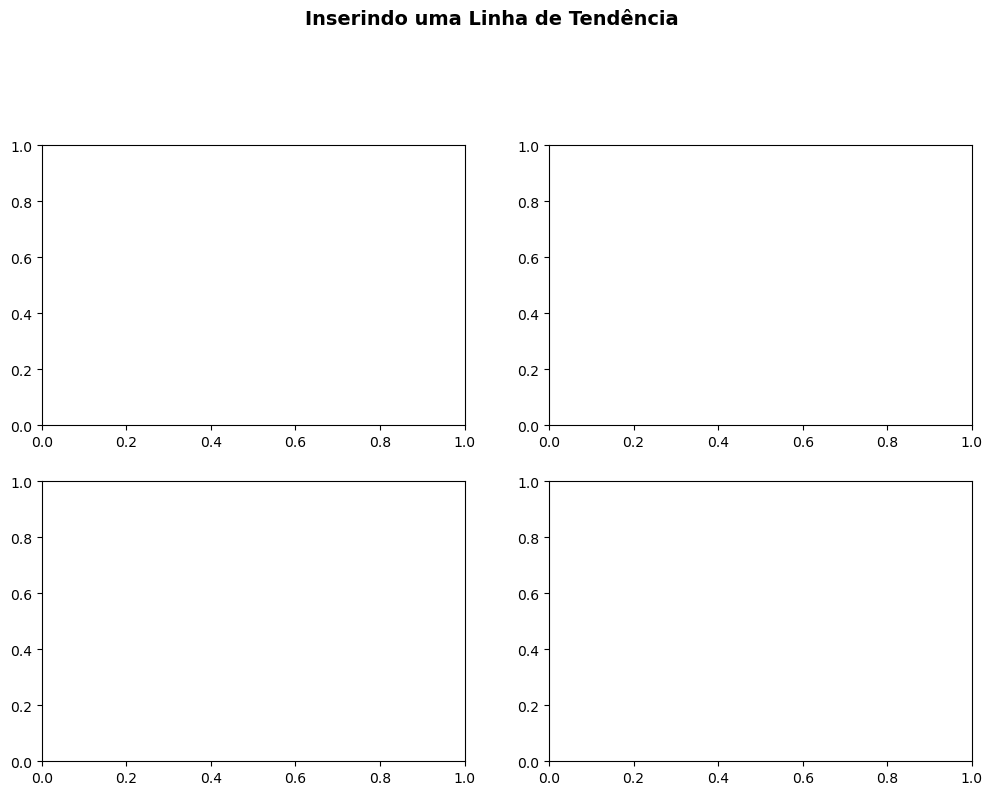

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 2)
  p = np.poly1d(z)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange', linestyle='dashed')

  i += 1

plt.tight_layout()
plt.show()

O pacote SciPy é um eco-sistema Python para computação científica que inclui, dentre outros o NumPy e o Matplotlib. Ele fornece um método curve_fit() para obter os coeficientes que melhor aproximam um conjunto de pontos a uma função arbitrária de sua escolha. Os parâmetros obtidos da função são retornados em *popt e podem ser empregados para aplicar a função a um intervalo de valores que você deseja empregar do mesmo modo que no exemplo anterior.



AttributeError: 'DataFrame' object has no attribute 'dataset'

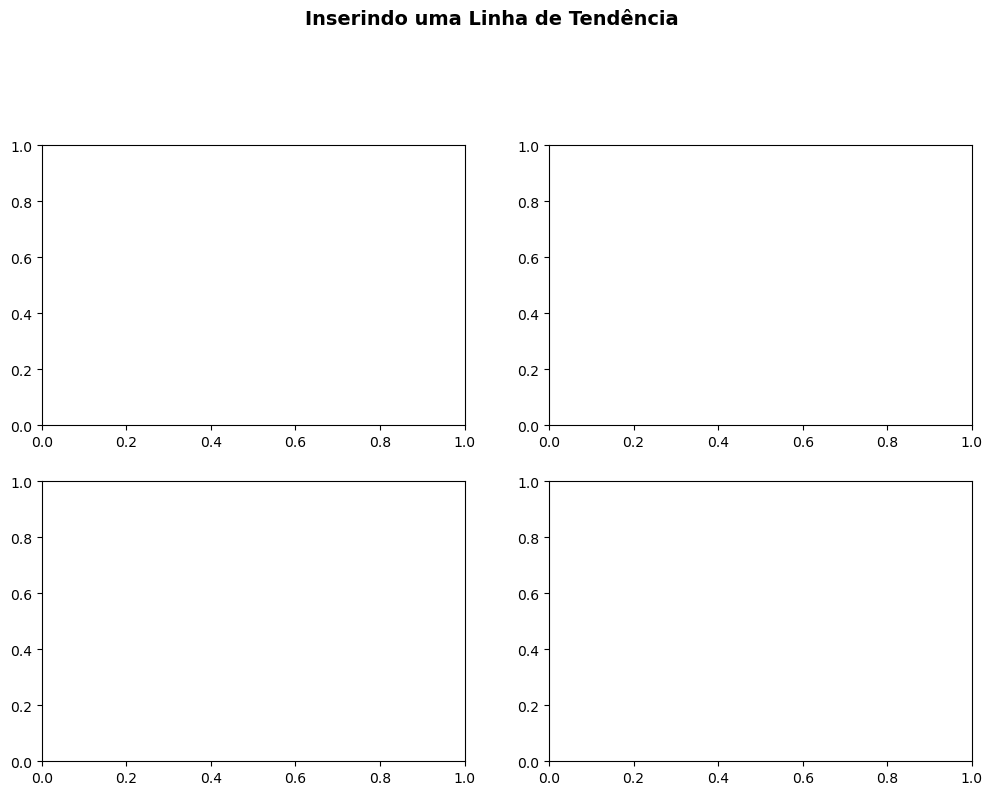

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*np.sin(x) + b*np.cos(x) + x**c

fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  popt, pcov = curve_fit(func, ds.x, ds.y)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)

  ax[i//2,i%2].plot(x,func(x,*popt),color='darkorange', linestyle='dashed')
  i += 1

plt.tight_layout()
plt.show()

In [ ]:
data_T_AA = data_T_AA[ data_T_AA["WindSpeed(m/s)"] < 12.5 ]
data_T_AA_mean = data_T_AA_mean[ data_T_AA_mean["WindSpeed(m/s)"] < 12.5 ]

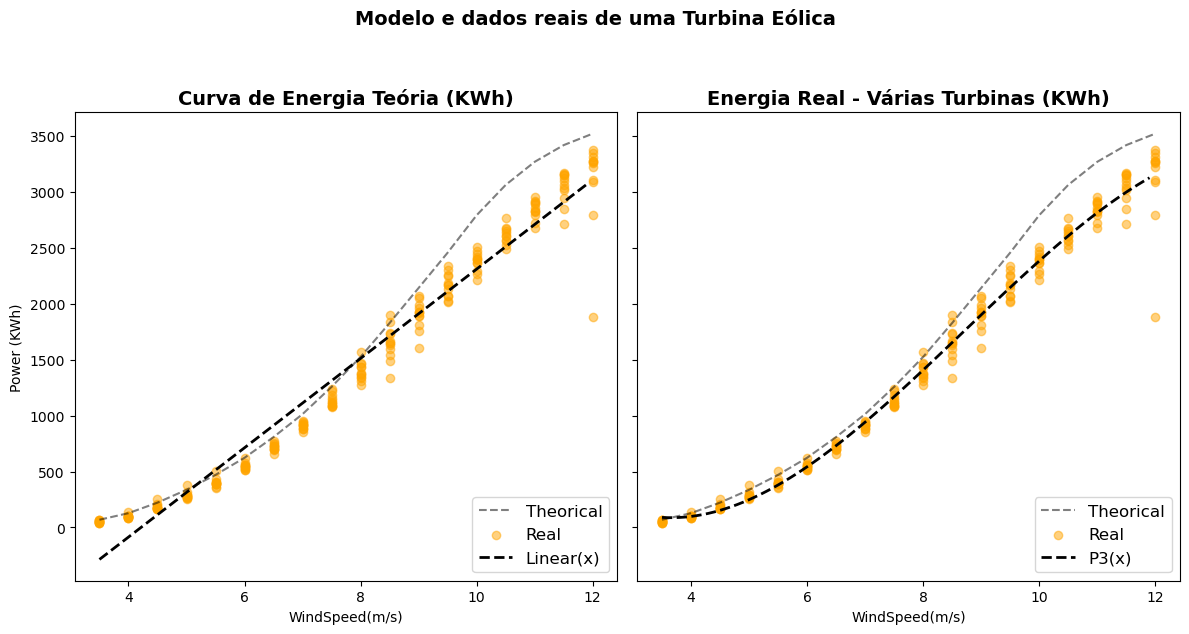

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)

fig.suptitle('Modelo e dados reais de uma Turbina Eólica', fontsize=14, weight='bold', y=1.05)

ax[0].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"], '--k', label='Theorical', alpha=0.5)
ax[0].scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], label='Real', marker='o', color='orange', alpha=0.5)

ax[1].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"], '--k', label='Theorical', alpha=0.5)
ax[1].scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], label='Real', marker='o', color='orange', alpha=0.5)

x = np.arange(data_T_AA["WindSpeed(m/s)"].min(),data_T_AA["WindSpeed(m/s)"].max(), 0.1)

z = np.polyfit(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], 1)
p = np.poly1d(z)
ax[0].plot(x,p(x), linestyle='dashed', label='Linear(x)',linewidth=2, color='k')

z = np.polyfit(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], 3)
p = np.poly1d(z)
ax[1].plot(x,p(x), linestyle='dashed', label='P3(x)' ,linewidth=2, color='k')

ax[0].set_title("Curva de Energia Teória (KWh)", fontsize=14, weight='bold')
ax[1].set_title("Energia Real - Várias Turbinas (KWh)", fontsize=14, weight='bold')
ax[0].set_ylabel("Power (KWh)")

ax[0].set_xlabel("WindSpeed(m/s)")
ax[1].set_xlabel("WindSpeed(m/s)")

ax[0].legend(loc='lower right',fontsize=12)
ax[1].legend(loc='lower right',fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.show()

### Linha de Tendencia Média

In [ ]:
bovespa['week'] = bovespa['data'].dt.isocalendar().week
bovespa.head()

data   DOLAR      PETR4  VALE3      IBOV  week
0 2020-01-02  4.0163  16.270000  13.45  118573.0     1
1 2020-01-03  4.0234  15.990000  13.29  117707.0     1
2 2020-01-06  4.0570  16.219999  13.14  116878.0     2
3 2020-01-07  4.0604  16.059999  13.23  116662.0     2
4 2020-01-08  4.0662  15.700000  13.22  116247.0     2

TypeError: '<=' not supported between instances of 'int' and 'str'

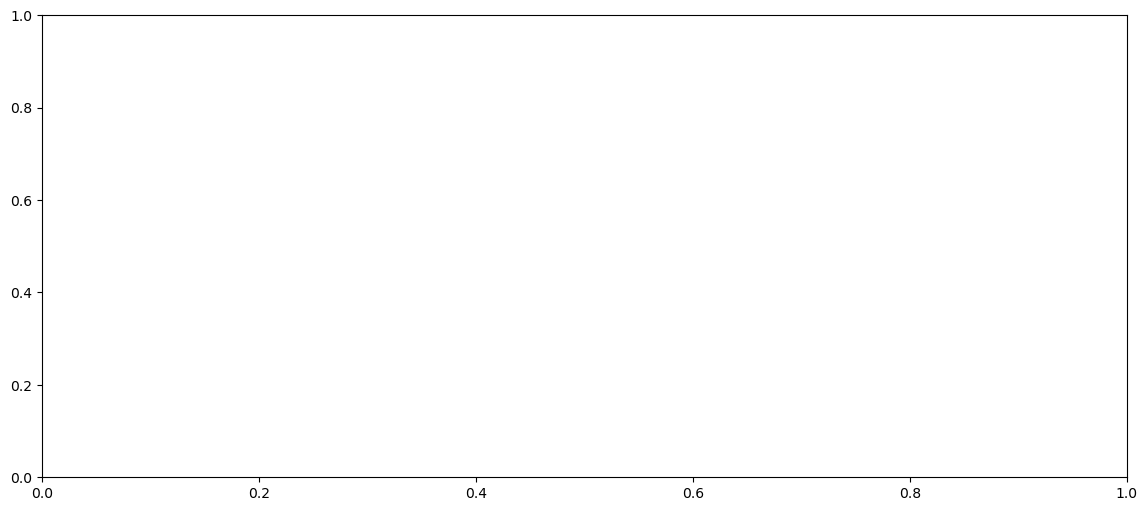

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

yerr = []
ymean = []
for w in bovespa.week.unique():
  yerr.append(bovespa[bovespa.week == w]['IBOV'].std())
  ymean.append(bovespa[bovespa.week == w]['IBOV'].mean())
yerr = np.array(yerr)
ymean = np.array(ymean)

plt.errorbar(bovespa.week.unique(), ymean, yerr=yerr, label='Tendência', marker='o', color='r', linewidth=1.2)
plt.scatter(bovespa.week, bovespa.IBOV, label='Valores Mês', marker='o', color='orange', alpha=0.7, s=64)

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

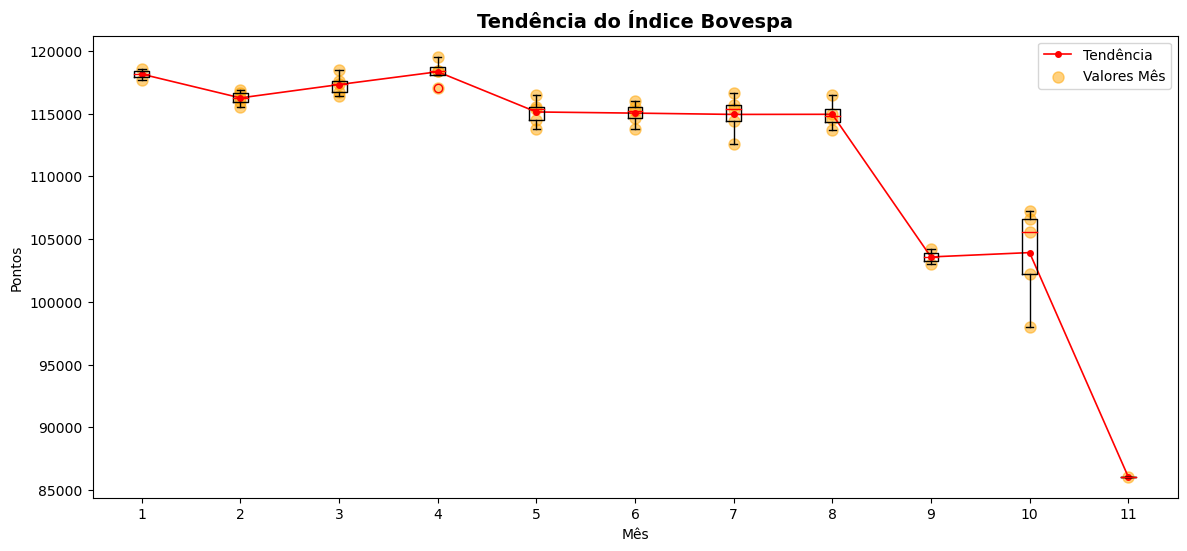

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(np.array(bovespa.week.unique()), ymean, 'r-', label='Tendência', marker='o', linewidth=1.2, markersize=4)
plt.scatter(bovespa.week, bovespa.IBOV, label='Valores Mês', marker='o',  alpha=0.5, s=64, color='orange')
for week in bovespa.week.unique():
  plt.boxplot(bovespa[bovespa.week == week].IBOV, positions=[week], widths=0.15, flierprops=dict(color='r',markeredgecolor='r'),medianprops=dict(color='r'))

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

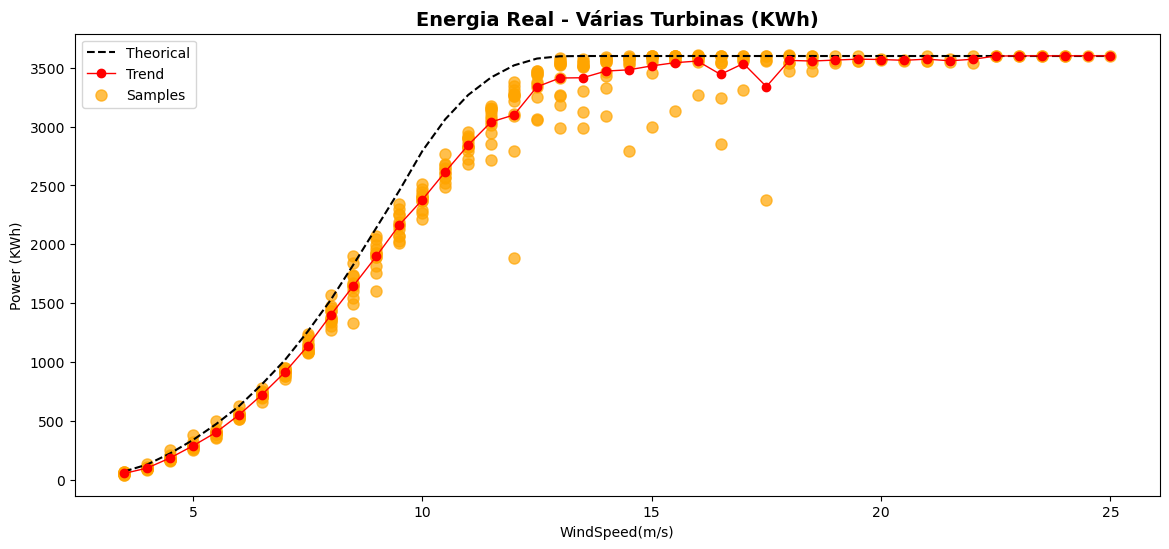

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')

plt.plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"],'--k',label='Theorical')
plt.plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["ActivePower(kW)"], marker='o', color='r', linewidth=1, label='Trend')
plt.scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], marker='o', color='orange',  alpha=0.7, s=64, label='Samples')

plt.title("Energia Real - Várias Turbinas (KWh)", fontsize=14, weight='bold')
plt.ylabel("Power (KWh)")
plt.xlabel("WindSpeed(m/s)")
plt.legend()

plt.show()

## Correlação

Pearson - linear, distribuição      parametrico: CONHECEMOS A DISTRIBUIÇÃO   ---> mais informação geramente menor intervalo de confiança --> sabemos como os dados devem se comportar

SPEARMAN - Não distribuição       Não parametrico : não conhecemos a distribuição



conjunto das distribuições paramétricas está contido no conjunto não paramétrico

#### Teoria


In [ ]:
penguins.select_dtypes(include='number').corr(method='pearson')['bill_length_mm'].sort_values(ascending=False)

bill_length_mm       1.000000
flipper_length_mm    0.656181
body_mass_g          0.563466
bill_depth_mm       -0.235053
Name: bill_length_mm, dtype: float64

In [ ]:
df_corr = pd.DataFrame()

for method in ['pearson', 'spearman', 'kendall']:
    df_corr[method] = penguins.select_dtypes(include='number').corr(method=method)['bill_length_mm']

df_corr = df_corr[df_corr.index != 'SalePrice'].sort_values(by='pearson',ascending=False)
df_corr

pearson  spearman   kendall
bill_length_mm     1.000000  1.000000  1.000000
flipper_length_mm  0.656181  0.672772  0.483345
body_mass_g        0.563466  0.575834  0.427113
bill_depth_mm     -0.235053 -0.221749 -0.122850

### Pratica

In [ ]:
df = desenvolvimento_Paises
df.head()

continent       country  year  demox_eiu  income_per_person  invest_%_gdp  \
12    Africa  South Africa  2015       75.6              12400          21.0   
16  Americas     Argentina  2015       70.2              19200          17.1   
17  Americas        Brazil  2015       69.6              14800          17.4   
18  Americas        Canada  2015       90.8              43100          24.1   
20  Americas      Colombia  2015       66.2              13100          26.7   

    tax_%_gdp  gini_index  LifeExpect  HappyIdx  SchoolYears15_24  \
12       27.3        63.1        63.4     0.489             10.80   
16       12.3        41.8        76.5     0.670             11.70   
17       12.8        51.6        75.5     0.655              8.21   
18       12.3        31.7        81.7     0.741             14.30   
20       15.1        51.7        80.0     0.639             10.10   

    VacineBelieve  ChildMortality  Co2Emissions   CPI  Population  \
12          0.064           37.70          8.35  44.0    55400000   
16          0.005           11.50          4.64  32.0    43100000   
17          0.007           15.70          2.42  38.0   204000000   
18          0.062            5.28         16.00  83.0    36000000   
20          0.030           15.70          1.96  37.0    47500000   

    cod_continent  
12              0  
16              1  
17              1  
18              1  
20              1

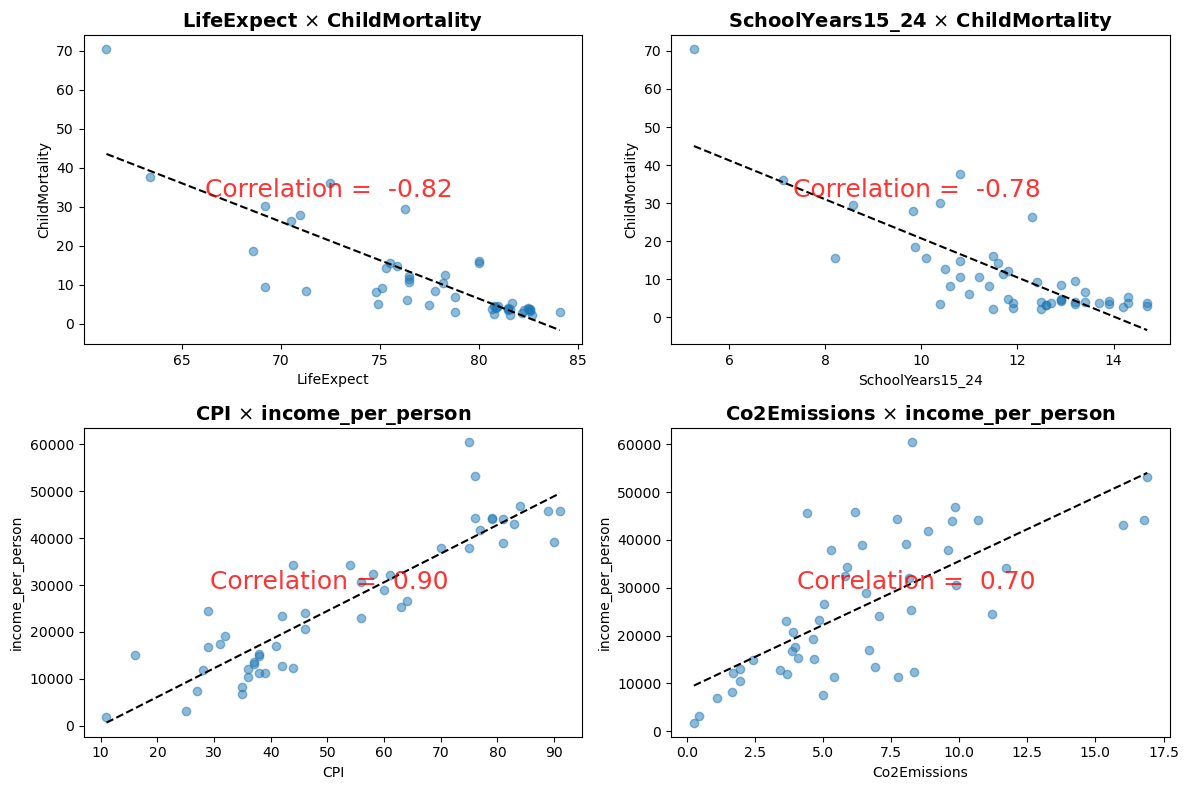

In [ ]:
plt.figure(figsize=(12, 8))

def linear(x, a, b):
    return a*x + b

for i, pairs in enumerate( [ ['LifeExpect','ChildMortality',],
                ['SchoolYears15_24','ChildMortality'],
                ['CPI','income_per_person'],
                ['Co2Emissions','income_per_person'] ] ):

  coefs, covar = curve_fit(linear, df[pairs[0]], df[pairs[1]])
  x = np.linspace(df[pairs[0]].min(), df[pairs[0]].max(), 100)
  y = linear(x,*coefs)

  plt.subplot(2,2,i+1)
  plt.scatter(df[pairs[0]], df[pairs[1]], alpha=0.5)

  plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

  texto = f'Correlation =  {df[[pairs[0],pairs[1]]].corr().unstack()[1]:.2f} '
  plt.text(( plt.gca().get_xlim()[1] + plt.gca().get_xlim()[0])/2,
           ( plt.gca().get_ylim()[1] + plt.gca().get_ylim()[0])/2,
           texto, ha='center', va='center', fontsize=18, color='red', alpha=0.8)

  plt.title(pairs[0] + ' $\\times$ ' + pairs[1], fontsize=14, weight='bold')
  plt.xlabel(pairs[0])
  plt.ylabel(pairs[1])

plt.tight_layout()
plt.show()

#### Cálculo dos Coeficientes em Python

Pearson (r): 0.9006752160894268
Spearman (ρ): 0.8760516051605161
Kendall (τ): 0.707878787878788


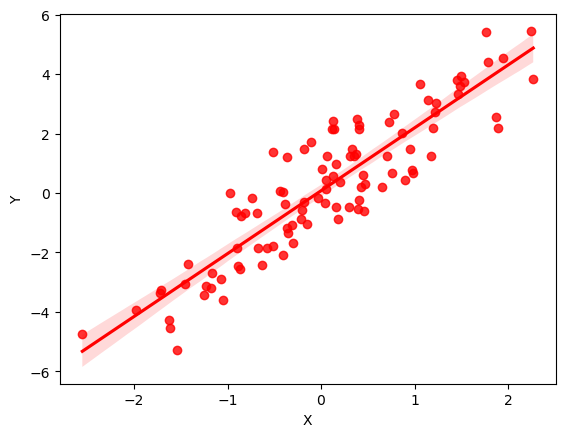

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau

np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)  # linear

sns.regplot(x=x, y=y, color='r')
plt.xlabel('X')
plt.ylabel('Y')

r, _ = pearsonr(x, y)
rho, _ = spearmanr(x, y)
tau, _ = kendalltau(x, y)

print("Pearson (r):", r)
print("Spearman (ρ):", rho)
print("Kendall (τ):", tau)

plt.show()


# Testes de Hipótese

#### Tabela

| Teste Estatístico               | Situação                                          | Tipo dos Dados | Paramétrico/ Não Paramétrico | Distribuição dos Dados        |
|--------------------------------|---------------------------------------------------|----------------|-------------------------------|-------------------------------|
| Teste t (unpaired)             | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste t (paired)               | Comparar média de duas amostras pareadas          | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste z                         | Comparar proporção de uma amostra com um valor conhecido | Numérico    | Paramétrico                   | Aproximação normal (n > 30)  |
| ANOVA                          | Comparar média de três ou mais grupos independentes | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| ANOVA de Medidas Repetidas     | Comparar médias em várias ocasiões                | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Wilcoxon (Mann-Whitney U) | Comparar medianas de duas amostras independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Wilcoxon Signed-Rank  | Comparar medianas de duas amostras pareadas       | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Kruskal-Wallis        | Comparar medianas de três ou mais grupos independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Qui-quadrado                    | Testar independência entre duas variáveis categóricas | Categórico     | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Dependência (ex: Correlação de Pearson) | Testar dependência entre duas variáveis numéricas | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Friedman              | Comparar médias de três ou mais grupos pareados   | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Fisher (ANOVA Multivariada) | Comparar média de três ou mais grupos independentes (MANOVA) | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Welch (t)              | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |


##### Testes de Hipóteses: Paramétricos $\times$ Não Paramétricos

Testes Paramétricos assumem uma distribuição normal dos dados (ou alguma outra distribuição específica) requerendo outros pressupostos, como variância constante, mas têm poder estatístico maior quando os pressupostos são atendidos. Já os Testes Não Paramétricos, não assumem distribuição específica dos dados, são mais flexíveis e robustos, mas geralmente têm menor poder estatístico.

* **Testes Paramétricos** $\longrightarrow$ Distribuição normal, variância constante, grandes amostras, valores contínuos.
* **Testes Não Paramétricos** $\longrightarrow$ Distribuição desconhecida ou não normal, pequenas amostras, valores ordinais ou categóricos ,grande presença de *outliers*

**Cuidado: usar teste paramétricos violando os pressupostos pode levar a resultados e conclusões erradas! O cálculo sempre pode ser feito, mas a interpretação e adequação do teste está com você!**


***Condições para Aplicação de Testes Paramétricos***


***Normalidade***
> Os dados devem seguir uma distribuição normal ou aproximadamente normal. Especialmente importante para testes que comparam médias (como o teste t de Student).

***Homogeneidade das Variâncias***

> As variâncias das populações das quais as amostras foram retiradas devem ser aproximadamente iguais (homocedasticidade).

***Independência dos Dados***

> As observações devem ser independentes umas das outras, isto é, a resposta de uma observação não deve influenciar a resposta de outra (veja também os testes de amostras pareadas).

***Nível de Medição***

> Os dados devem ser em escala intervalar ou razão, o que significa que os ##dados devem ser contínuos##.

>> *Por exemplo, "scores" não são boas variáveis para aplicação de testes como esses*

***Tamanho da Amostra***

> Idealmente $n>30$. Para o teste t, se a amostra é pequena, a suposição de normalidade se torna ainda mais crucial.

### Teoria

<img src="src/TesteDeHipotese.png">

<img src="src/TesteDeHipotese2.png">
<img src="src/TesteDeHipotese3.png"><img src="src/TesteDeHipotese4.png">
<img src="src/TesteDeHipotese5.png">

**Hipótese Estatística:** Uma hipótese estatística é geralmente uma afirmação sobre um conjunto de parâmetros de uma distribuição populacional.

<br>

* **$H_0$ (Hipótese Nula):** A hipótese nula é uma hipótese estatística a ser testada e aceita ou rejeitada em favor de uma alternativa.

Exemplos:
* A média dos valores é igual a $\bar{x}$.
* A média de dois conjuntos A e B de dados é igual.
* A média de A é maior que B.
* A é linearmente dependente de B.
* A é dependente de B.

etc.


* **$H_1$ (Hipótese Alternativa):** Uma hipótese alternativa é uma teoria oposta em relação à hipótese nula.

<br>

**Erro de tipo $\mathrm{I}$**

Diz-se que o erro de tipo $\mathrm{I}$ ocorre se o teste solicitar incorretamente a rejeição de $H_0$ quando estiver realmente correto.

$\alpha = P(Rejeita \ H_0\ |\ H_0\ is\ true)$

<br>

**Erro de tipo $\mathrm{II}$**

O erro de tipo $\mathrm{II}$ ocorre se o teste solicitar a aceitação de $H_0$ quando for falso.

$\beta = P(Aceita \ H_0\ |\ H_0\ is \ not \ true)$

<br>

**Nível de significância**

Sempre que $H_0$ for verdadeiro, sua probabilidade de ser rejeitado nunca é maior que $\alpha$. O valor $\alpha$, chamado de nível de significância do teste, geralmente é definido antecipadamente, sendo os valores comumente escolhidos $\alpha = 0,1, 0,05, 0,005$.

<br>

**P_value**

O valor P, ou probabilidade calculada, é a probabilidade de encontrar os resultados observados, ou mais extremos, quando a hipótese nula (H 0) de uma questão de estudo é verdadeira - a definição de 'extremo' depende de como a hipótese está sendo testada.

Se o seu valor P for menor que o nível de significância escolhido, então você rejeita a hipótese nula, ou seja, aceita que sua amostra fornece evidências razoáveis para apoiar a hipótese alternativa.




| Teste Estatístico               | Situação                                          | Tipo dos Dados | Paramétrico/ Não Paramétrico | Distribuição dos Dados        |
|--------------------------------|---------------------------------------------------|----------------|-------------------------------|-------------------------------|
| Teste t (unpaired)             | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste t (paired)               | Comparar média de duas amostras pareadas          | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste z                         | Comparar proporção de uma amostra com um valor conhecido | Numérico    | Paramétrico                   | Aproximação normal (n > 30)  |
| ANOVA                          | Comparar média de três ou mais grupos independentes | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| ANOVA de Medidas Repetidas     | Comparar médias em várias ocasiões                | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Wilcoxon (Mann-Whitney U) | Comparar medianas de duas amostras independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Wilcoxon Signed-Rank  | Comparar medianas de duas amostras pareadas       | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Kruskal-Wallis        | Comparar medianas de três ou mais grupos independentes | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Qui-quadrado                    | Testar independência entre duas variáveis categóricas | Categórico     | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Dependência (ex: Correlação de Pearson) | Testar dependência entre duas variáveis numéricas | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Friedman              | Comparar médias de três ou mais grupos pareados   | Numérico       | Não Paramétrico               | Não normal ou distribuição desconhecida |
| Teste de Fisher (ANOVA Multivariada) | Comparar média de três ou mais grupos independentes (MANOVA) | Numérico | Paramétrico                   | Normal ou aproximadamente normal |
| Teste de Welch (t)              | Comparar média de duas amostras independentes     | Numérico       | Paramétrico                   | Normal ou aproximadamente normal |



#### Testes de Hipóteses: Paramétricos $\times$ Não Paramétricos

Testes Paramétricos assumem uma distribuição normal dos dados (ou alguma outra distribuição específica) requerendo outros pressupostos, como variância constante, mas têm poder estatístico maior quando os pressupostos são atendidos. Já os Testes Não Paramétricos, não assumem distribuição específica dos dados, são mais flexíveis e robustos, mas geralmente têm menor poder estatístico.

* **Testes Paramétricos** $\longrightarrow$ Distribuição normal, variância constante, grandes amostras, valores contínuos.
* **Testes Não Paramétricos** $\longrightarrow$ Distribuição desconhecida ou não normal, pequenas amostras, valores ordinais ou categóricos ,grande presença de *outliers*

**Cuidado: usar teste paramétricos violando os pressupostos pode levar a resultados e conclusões erradas! O cálculo sempre pode ser feito, mas a interpretação e adequação do teste está com você!**

<br>
<br>


#### Condições para Aplicação de Testes Paramétricos


#### Normalidade  

> Os dados devem seguir uma distribuição normal ou aproximadamente normal. Especialmente importante para testes que comparam médias (como o teste t de Student).

#### Homogeneidade das Variâncias

> As variâncias das populações das quais as amostras foram retiradas devem ser aproximadamente iguais (homocedasticidade).

#### Independência dos Dados

> As observações devem ser independentes umas das outras, isto é, a resposta de uma observação não deve influenciar a resposta de outra (veja também os testes de amostras pareadas).

#### Nível de Medição

> Os dados devem ser em escala intervalar ou razão, o que significa que os ##dados devem ser contínuos##.

>> *Por exemplo, "scores" não são boas variáveis para aplicação de testes como esses*

#### Tamanho da Amostra

> Idealmente $n>30$. Para o teste t, se a amostra é pequena, a suposição de normalidade se torna ainda mais crucial.

## Tipos

### Teste Bi-lateral (Bi-caudal)

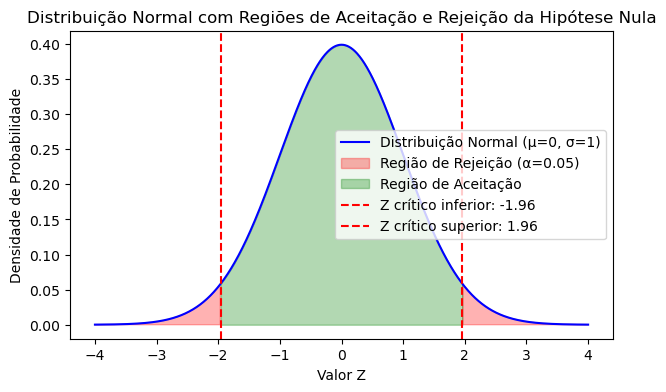

In [ ]:
media = 0
desvio_padrao = 1

# Valor crítico para alpha = 0.05 (95% de confiança)
alpha = 0.05
z_critico_inferior = stats.norm.ppf(alpha / 2)
z_critico_superior = stats.norm.ppf(1 - alpha / 2)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(7,4))
plt.plot(x, y, label='Distribuição Normal (μ=0, σ=1)', color='blue')
plt.fill_between(x, y, where=(x <= z_critico_inferior) | (x >= z_critico_superior), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')
plt.fill_between(x, y, where=(x > z_critico_inferior) & (x < z_critico_superior), color='green', alpha=0.3, label='Região de Aceitação')
plt.axvline(z_critico_inferior, color='red', linestyle='--', label=f'Z crítico inferior: {z_critico_inferior:.2f}')
plt.axvline(z_critico_superior, color='red', linestyle='--', label=f'Z crítico superior: {z_critico_superior:.2f}')

plt.title('Distribuição Normal com Regiões de Aceitação e Rejeição da Hipótese Nula')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend(fontsize=10)
plt.show()


### Teste-Unilateral (Uni-caudal)

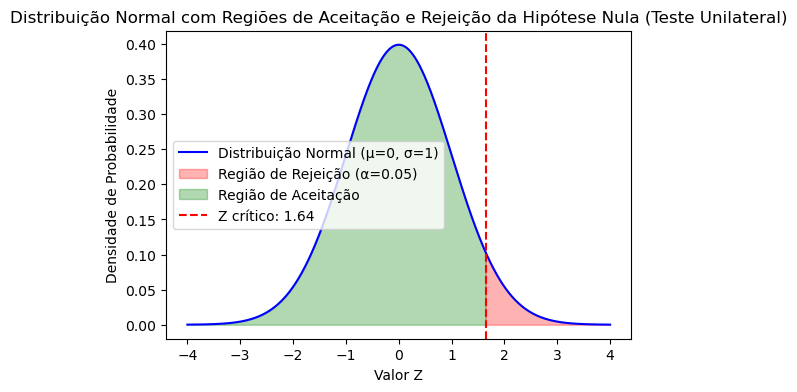

In [ ]:
media = 0
desvio_padrao = 1

# Valor crítico para alpha = 0.05 (unilateral à direita)
alpha = 0.05
z_critico = stats.norm.ppf(1 - alpha)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Distribuição Normal (μ=0, σ=1)', color='blue')
plt.fill_between(x, y, where=(x >= z_critico), color='red', alpha=0.3, label='Região de Rejeição (α=0.05)')
plt.fill_between(x, y, where=(x < z_critico), color='green', alpha=0.3, label='Região de Aceitação')
plt.axvline(z_critico, color='red', linestyle='--', label=f'Z crítico: {z_critico:.2f}')

plt.title('Distribuição Normal com Regiões de Aceitação e Rejeição da Hipótese Nula (Teste Unilateral)')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()


## Exemplos

### Teste de Hipotese

In [ ]:
media_homens = 35
media_mulheres = 30
desvio_padrao_homens = 5
desvio_padrao_mulheres = 4
tamanho_amostra = 50

amostra_homens = np.random.normal(media_homens, desvio_padrao_homens, tamanho_amostra)
amostra_mulheres = np.random.normal(media_mulheres, desvio_padrao_mulheres, tamanho_amostra)

In [ ]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres)

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

Estatística t: 7.331517132979003
Valor p: 6.570667908686228e-11

Rejeita a hipótese nula - as médias são estatisticamente diferentes.


### Teste de hipóteses para comparar duas médias $μ_1$ e $μ_2$ de duas populações

Sejam $X_1$ e $X_2$ as duas variáveis aleatórias de interesse com médias $\mu_1$ e $\mu_2$, respectivamente, e variâncias $\sigma_1$ e $\sigma_2$ respectivamente.
\
As hipóteses de interesse são:

> $H_0:μ_A=μ_B$

> $H_a:μ_A \ne μ_B$ ou $H_a:μ_A < μ_B$ ou $H_a:μ_A > μ_B$


É necessário que as amostras aleatórias das duas populações sejam independentes.

*   **Para tamanhos de amostras grandes**
1.  Variâncias ($\sigma_1$ e $\sigma_2$) conhecidas é iguais (difícil de encontrar na prática)
\
Usaremos a distribuição Normal padrão para calcular o valor-p (valor aproximado). O valor-p será exato se as duas v.a. tiveram distribuições normais.
2. Variâncias ($\sigma_1$ e $\sigma_2$) desconhecidas, porém iguais
\
Usaremos a distribuição t-student com $n_1+n_2-2$ graus de liberdade se as duas v.a. tiveram distribuições normais. Caso contrário, podemos usar a aproximação da distribuição normal uma vez que os tamanhos das amostras serão grandes.
3. Variâncias ($\sigma_1$ e $\sigma_2$) desconhecidas diferentes
\
Usaremos a distribuição t-student com $p$ graus de liberdade (calculados em função das variâncias amostrais) se as duas v.a. tiveram distribuições normais. Caso contrário, podemos usar a aproximação da distribuição normal uma vez que os tamanhos das amostras são grandes.


#### Exemplos 1, `ttest`, `ztest`

Agora estamos interessados em verificar se os salários médios dos homens e as mulheres na companhia Glassdoor são diferentes.
Vamos verificar estatísticamente usando os dados da base Glassdoor

##### Estatística descritiva


In [ ]:
HM.head()

jobtitle  gender  age  performance education      department  \
0     Graphic Designer  Female   18            5   College      Operations   
1    Software Engineer    Male   21            5   College      Management   
2  Warehouse Associate  Female   19            4       PhD  Administration   
3    Software Engineer    Male   20            5   Masters           Sales   
4     Graphic Designer    Male   26            5   Masters     Engineering   

   seniority  income  bonus  
0          2   42363   9938  
1          5  108476  11128  
2          5   90208   9268  
3          4  108080  10154  
4          5   99464   9319

In [ ]:

incomeFemale = HM[HM.gender == 'Female'].income
incomeMale = HM[HM.gender == 'Male'].income

print('Média de Salários:')
print('Homens: {:.2f}'.format(incomeMale.mean()))
print('Mulheres: {:.2f}'.format(incomeFemale.mean()))
print('Diferença da média salarial é de {:.2f} ou {:.2f}%'.format(
        incomeMale.mean() - incomeFemale.mean(), 100*(incomeMale.mean() - incomeFemale.mean())/ incomeMale.mean()))
print("")
print('Desvio padrão de Salários:')
print('Homens: {:.2f}'.format(incomeMale.std()))
print('Mulheres: {:.2f}'.format(incomeFemale.std()))


Média de Salários:
Homens: 98457.55
Mulheres: 89942.82
Diferença da média salarial é de 8514.73 ou 8.65%

Desvio padrão de Salários:
Homens: 25517.52
Mulheres: 24378.28


Note que, aparentemente, os salários médio dos homens é maior quando comparado com o salário médio das mulheres. No entanto, observa-se um alta variabilidade nos salários destes dois grupo.

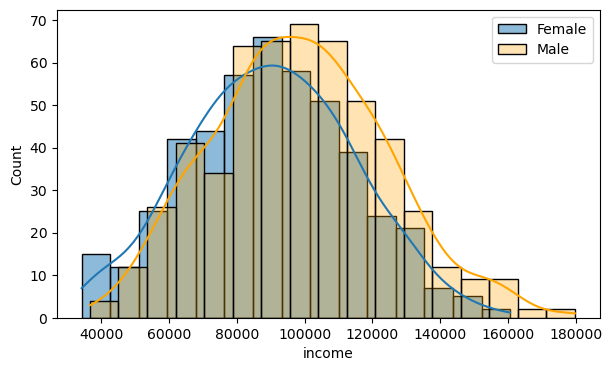

In [ ]:
# Histogramas

fig = plt.figure(figsize=(7,4))
sns.histplot(incomeFemale,label='Female',kde=True)
sns.histplot(incomeMale,color='orange',alpha=0.3,label='Male',kde=True)

plt.legend()
plt.show()

##### Teste de Hipotese

Nota-se que as distribuições dos salários das mulheres e homens seguem, aproximadamente, uma distribuição normal. Observa-se também que as variabilidades são "parecidas". Assim, podemos usar a distribuição t-student, assumindo igualdade de variâncias, para testar nossa hipótese

In [ ]:
from scipy import stats

ttest_Score, value_p = stats.ttest_ind(incomeFemale, incomeMale, equal_var=True)

print('p-value: {:.10f}'.format(value_p))

if value_p < 0.05:
  print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
  print("Conclusão: Concluímos, portanto, que há diferença significativa entre a remuneração média dos homens e mulheres na empresa.")
else:
	print('Não se rejeita a Hipótese Nula ao n.s. de 5%')


p-value: 0.0000000948
Rejeita-se a Hipótese Nula ao n.s. de 5%
Conclusão: Concluímos, portanto, que há diferença significativa entre a remuneração média dos homens e mulheres na empresa.


### Bartlett's test -- desvios padrão

As hipóteses de interesse são:

> $H_0:\sigma^2_A=\sigma^2_B$

> $H_a:\sigma^2_A \ne \sigma^2_B$

In [ ]:
# Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.

from scipy.stats import bartlett
Bstat, p_value = bartlett(incomeFemale, incomeMale)

print('p-value: {:.10f}'.format(p_value))
if p_value < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
	print('Não se rejeita a Hipótese Nula ao n.s. de 5%')

p-value: 0.3094042302
Não se rejeita a Hipótese Nula ao n.s. de 5%


In [ ]:
# Usando a aproximação pela normal

from statsmodels.stats.weightstats import ztest
zstat, value_p =ztest(x1=incomeFemale, x2=incomeMale, alternative="two-sided")
print('p-value: {:.10f}'.format(value_p))

p-value: 0.0000000761


### Normaltest

Teste para verificar normalidade.

In [ ]:
# Os salários das mulheres segue uma dist. normal?
from scipy.stats import normaltest
stats, p_value = normaltest(incomeFemale)

print('p-value: {:.10f}'.format(value_p))
if p_value < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
  print('Não se rejeita a Hipótese Nula ao n.s. de 5%')
  print("Note que podemos assumir que os salários das mulheres segue aproximadamente uma dist normal")

p-value: 0.0000000761
Não se rejeita a Hipótese Nula ao n.s. de 5%
Note que podemos assumir que os salários das mulheres segue aproximadamente uma dist normal


### Wilcoxon (não paramétrico) para Comparação de Médias

Em fisioterapia mede-se a dor em uma escala de 1 a 10 (não contínua!) portanto não podemos aplicar um t-test.

In [ ]:
from scipy.stats import wilcoxon

# Dados de medida de dor para dois tratamentos diferentes
tratamento_a = np.array([3, 4, 2, 5, 6, 4, 7, 6, 5, 4])
tratamento_b = np.array([2, 3, 1, 4, 5, 3, 6, 5, 4, 3])

stat, p_value = wilcoxon(tratamento_a, tratamento_b)

print("Estatística:", stat)
print("P-value:", p_value)
print()

if p_valor < 0.05:
    print("Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula - não há evidências suficientes para afirmar diferença nas médias.")


Estatística: 0.0
P-value: 0.001953125

Rejeitamos a hipótese nula - as médias são estatisticamente diferentes.


### Testes de Correlação

Ou **Pearson's Correlation Test** é um teste de Hipótese em que queremos verificar se duas amostras são **linearmente dependentes**. As hipóteses são:

$H_0: $ não são linearmente dependentes

$H_a: $ são linearmente dependentes

Esse teste é fundamental para aplicarmos ou avaliarmos modelos lineares como você verá seguir.

**Nota**: A correlação verifica apenas a dependência linear. Não obstante sua importância, rejeitar a hipótese de linearmente dependentes não elimina muitas outras formas de dependência (se quiser, pense em $y = x^2$, $y = cos(x)$ ou no quarteto de Anscomble).    

In [ ]:
# H_0: não são linearmente dependentes
# H_a: são linearmente dependentes
#
# Pearson correlation test

# pearson_corr, p_value = stats.pearsonr(np.random.sample(len(HM)), HM.income)

pearson_corr, p_value = stats.pearsonr(HM.age, HM.income)
print('Pearson correlation coefficient: {:.3f}'.format(pearson_corr))
print('p-value: {:.10f}'.format(p_value))

if p_value < 0.05:
	print('Rejeita-se a H0 ao n.s. de 5%') # não há dependência linear
else:
	print('Não se rejeita a H0 ao n.s. de 5%') # dependência linear

Pearson correlation coefficient: 0.563
p-value: 0.0000000000
Rejeita-se a H0 ao n.s. de 5%


In [ ]:
# H_0: não são monotonicamente dependentes
# H_a: são monotonicamente dependentes
#
# Spearman’s rank correlation coefficient

spearman_corr, p_value = stats.spearmanr(HM.age, HM.income)
print('Spearman correlation coefficient: {:.3f}'.format(spearman_corr))
print('p-value: {:.10f}'.format(p_value))

if p_value < 0.05:
	print('Rejeita-se a H0 ao n.s. de 5%') # não há dependência linear
else:
	print('Não se rejeita a H0 ao n.s. de 5%') # dependência linear

Spearman correlation coefficient: 0.563
p-value: 0.0000000000
Rejeita-se a H0 ao n.s. de 5%


### Exercicios Teste de Hipótese

# Exemplos Teste de Hipotese

Etapas de um teste de hipótese (paramétrico):

1. Especifique a hipótese nula e alternativa e o teste.
2. Colete uma amostra aleatória da população.
3. Verifique se as condições do teste são atendidas.
4. Calcule a estatística de teste e o valor P correspondente.
5. Decida se deseja rejeitar ou não rejeitar sua hipótese. nula

In [ ]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import weibull_min
from scipy.stats import hypergeom
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.weightstats import ztest


### 4. Testes estatísticos

**Testes de Normalidade**
Estes testes são utilizados para verificar se uma amostra segue uma distribuição normal.

**Shapiro-Wilk Test**

* Comando: shapiro(a)

* Pressupostos: Não há pressupostos específicos.

* Foco: Verificar a normalidade dos dados.

* Hipótese Nula (H0): Os dados seguem uma distribuição normal.

**Levene's Test**

* Comando: levene(a, b)

* Pressupostos: Não há pressupostos específicos.

* Foco: Verificar a igualdade das variâncias.

* Hipótese Nula (H0): As variâncias são iguais.

**Testes Paramétricos**
Estes testes são usados para comparar médias sob pressupostos de normalidade, continuidade e homocedasticidade (igualdade de variâncias).

**t-Test for Independent Samples**

* Comando: ttest_ind(a, b, alternative="two-sided"|"greater"|"less")

* Distribuição: t-Student

* Foco: Comparação de médias entre duas amostras independentes.

**z-Test for Independent Samples**

* Comando: ztest(a, b, alternative="two-sided"|"greater"|"less")

* Distribuição: Normal

* Foco: Comparação de médias entre duas populações.

**t-Test for One Sample**

* Comando: ttest_1samp(a, valor, alternative="two-sided"|"greater"|"less")

* Foco: Comparar a média de uma amostra com um valor específico.

**Paired t-Test**

* Comando: ttest_rel(a, b, alternative="two-sided"|"greater"|"less")

* Foco: Comparação de médias entre duas amostras pareadas.

**Welch's t-Test**

* Comando: ttest_ind(a, b, equal_var=False)

* Foco: Comparação de médias entre duas amostras com variâncias ou tamanhos diferentes.

**Testes Não Paramétricos**
Estes testes não assumem nenhuma distribuição específica dos dados e são usados para comparar medianas e distribuições.

**Wilcoxon Signed-Rank Test**

* Comando: wilcoxon(a, b, alternative="two-sided"|"greater"|"less")

* Foco: Verificar se duas amostras têm medianas iguais. As amostras devem ter o mesmo tamanho.

**Mann-Whitney U Test**

* Comando: mannwhitneyu(a, b, alternative="two-sided"|"greater"|"less")

* Foco: Comparar distribuições de duas amostras de tamanhos diferentes. Verificar se as distribuições são iguais.

**Teste Qui-Quadrado (χ²)**
Utilizado para verificar a independência entre variáveis categóricas.

**Chi-Square Test**

* Comando: chi2_contingency(contingency_table)

* Pressupostos: Variáveis categóricas.

* Foco: Verificar se as variáveis são independentes.

* Utilização: Empregar pd.crosstab() para gerar tabelas de contingência.

---



O que é a Hipótese Nula (H0)?

A hipótese nula (H0) é uma afirmação inicial sobre uma população que serve como base para os testes de hipóteses estatísticas. Ela geralmente propõe que não há efeito, diferença ou relação entre as variáveis que estão sendo estudadas. A hipótese nula é uma posição conservadora que assume que qualquer observação ou diferença é devido ao acaso ou variabilidade aleatória, e não a um efeito real.

Exemplos de Uso dos Comandos


1. Shapiro-Wilk Test



In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(a)

2. Levene's Test

In [ ]:
from scipy.stats import levene

stat, p = levene(a, b)

3. t-Test for Independent Samples

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a, b, alternative='two-sided')

4. z-Test for Independent Samples

In [ ]:
from statsmodels.stats.weightstats import ztest

stat, p = ztest(a, b, alternative='two-sided')

5. t-Test for One Sample

In [ ]:
from scipy.stats import ttest_1samp

stat, p = ttest_1samp(a, valor, alternative='two-sided')

6. Paired t-Test

In [ ]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(a, b, alternative='two-sided')

7. Welch's t-Test

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a, b, equal_var=False)

8. Wilcoxon Signed-Rank Test


In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(a, b, alternative='two-sided')

9. Mann-Whitney U Test

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(a, b, alternative='two-sided')

10. Chi-Square Test


In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(variable1, variable2)

stat, p, dof, expected = chi2_contingency(table)

##### Tipos de testes de hipótese

1. Teste Bilateral (Two-sided)

* Alternativa: "two-sided"

* Descrição: Testa se há uma diferença significativa em qualquer direção (maior ou menor).

* Uso: Utilizado quando não há uma direção específica esperada para a diferença.

2. Teste Unilateral à Direita (Greater)

* Alternativa: "greater"

* Descrição: Testa se a média (ou outra estatística de interesse) da amostra é significativamente maior do que a média (ou valor) da população de referência.

* Uso: Utilizado quando se espera que o valor da amostra seja maior do que o valor da população.

3. Teste Unilateral à Esquerda (Less)

* Alternativa: "less"

* Descrição: Testa se a média (ou outra estatística de interesse) da amostra é significativamente menor do que a média (ou valor) da população de referência.

* Uso: Utilizado quando se espera que o valor da amostra seja menor do que o valor da população.

**Exemplos**

1. Teste t para Amostras Independentes (t-test for independent samples)


In [ ]:
from scipy.stats import ttest_ind

# Dados de exemplo
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# Teste bilateral
stat, p = ttest_ind(a, b, alternative='two-sided')

# Teste unilateral à direita
stat, p = ttest_ind(a, b, alternative='greater')

# Teste unilateral à esquerda
stat, p = ttest_ind(a, b, alternative='less')


2. Teste t para Amostras Pareadas (Paired t-test)


In [ ]:
from scipy.stats import ttest_rel

# Dados de exemplo
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# Teste bilateral
stat, p = ttest_rel(a, b, alternative='two-sided')

# Teste unilateral à direita
stat, p = ttest_rel(a, b, alternative='greater')

# Teste unilateral à esquerda
stat, p = ttest_rel(a, b, alternative='less')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


3. Teste Mann-Whitney U


In [ ]:
from scipy.stats import mannwhitneyu

# Dados de exemplo
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# Teste bilateral
stat, p = mannwhitneyu(a, b, alternative='two-sided')

# Teste unilateral à direita
stat, p = mannwhitneyu(a, b, alternative='greater')

# Teste unilateral à esquerda
stat, p = mannwhitneyu(a, b, alternative='less')

4. Teste Wilcoxon


In [ ]:
from scipy.stats import wilcoxon

# Dados de exemplo
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# Teste bilateral
stat, p = wilcoxon(a, b, alternative='two-sided')

# Teste unilateral à direita
stat, p = wilcoxon(a, b, alternative='greater')

# Teste unilateral à esquerda
stat, p = wilcoxon(a, b, alternative='less')


Resumo das Alternativas:

* **"two-sided"**: Verifica diferença em qualquer direção.

* **"greater"**: Verifica se a amostra é maior que a população de referência.

* **"less"**: Verifica se a amostra é menor que a população de referência.

## `stats.ttest_1samp(x, mu)` Testa uma média hipotética ou teórica.


3 empresas fazem um anúncio afirmando remunerar cientistas de dados 10% acima do mercado, cuja média é R$ 8735 a.m. Você obtêm amostra de salários de 30 cientistas de dados das empresas. Você consegue afirmar que o anúncio de quais empresas é justo?

$$H_0: \mu = 9608 $$
$$H_1: \mu \ne 9608 $$


In [ ]:
8735*1.1

9608.5

In [ ]:
#@markdown
values1 = norm.rvs(loc=9580,size=30,scale=50,random_state=123)
values2 = norm.rvs(loc=9580,size=30,scale=100,random_state=123)
values3 = norm.rvs(loc=9580,size=30,scale=200,random_state=123)


In [ ]:
values1.mean()

9582.235698548093

In [ ]:
values2.mean()

9584.471397096186

In [ ]:
values3.mean()

9588.942794192373

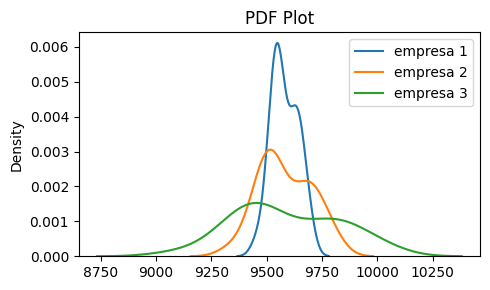

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(values1,ax=ax,label='empresa 1')
sns.kdeplot(values2,ax=ax,label='empresa 2')
sns.kdeplot(values3,ax=ax,label='empresa 3')
ax.set_title('PDF Plot')

plt.legend()
plt.tight_layout()
plt.show()

### Trick: Validando o teste

In [ ]:
stat, p = stats.ttest_1samp(values3, values3.mean())

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 1.0


In [ ]:
stat, p = stats.ttest_1samp(values3, values3.mean() - 4*values3.std())

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Rejeita H0 2.1766142008525573e-19


### Testando

In [ ]:
stat, p = stats.ttest_1samp(values1, 9608)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Rejeita H0 0.024252947874818437


In [ ]:
stat, p = stats.ttest_1samp(values2, 9608)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.28663859783620127


In [ ]:
stat, p = stats.ttest_1samp(values3, 9608)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.6634796139956985


Somente a empresa 1 não parece poder afirmar ter uma média de salário 10% acima do mercado.

## `stats.ttest_ind(x1, x2)` - Testa a média de duas populações.

Uma quarta empresa apresentou um salário médio para os cientistas de dados de R$ 9777 a.m. O salário médio dessa empresa é significativamente diferente do salário médio dos demais que justifique você buscar uma colocação nessa empresa e não nas demais?

$$H_0:  \mu_0 = \mu_1 $$
$$H_1: \mu_0 \ne \mu_1 $$


In [ ]:
#@markdown
values4 = norm.rvs(loc=9720,size=20,scale=500,random_state=123)


In [ ]:
values4.mean()

9777.208865977645

### Trick: Validando o teste

In [ ]:
stat, p = stats.ttest_ind(values4, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 1.0


### Testando

In [ ]:
stat, p = stats.ttest_ind(values1, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.09637289780091156


In [ ]:
stat, p = stats.ttest_ind(values2, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.10676604710200716


In [ ]:
stat, p = stats.ttest_ind(values3, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.14169685317827294


Nenhuma das empresas têm uma diferença significativa do salário médio com a empresa 4.

## `stats.ttest_rel(x1, x2)`  - Testes pareados, o mesmo que, `stats.ttest_1samp(x1 - x2, 0)`  


Vamos considera que você tem dados de homens e mulheres e deseja testar hipóteses sobre a média de idade de homens e mulheres.

In [ ]:
media_homens = 35
media_mulheres = 30
desvio_padrao_homens = 5
desvio_padrao_mulheres = 4
tamanho_amostra = 50

amostra_homens = np.random.normal(media_homens, desvio_padrao_homens, tamanho_amostra)
amostra_mulheres = np.random.normal(media_mulheres, desvio_padrao_mulheres, tamanho_amostra)


In [ ]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres)

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

Estatística t: 5.91396444332017
Valor p: 4.8881803250313146e-08

Rejeita a hipótese nula - as médias são estatisticamente diferentes.


In [ ]:
from statsmodels.stats.weightstats import ztest
z_stat, p_valor = ztest(amostra_homens, amostra_mulheres, value=0)
# z_stat, p_valor = ztest(amostra_homens, amostra_mulheres, value=0)

print("Estatística z:", z_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - as médias são estatisticamente diferentes.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar diferença das médias.")

Estatística z: 5.91396444332017
Valor p: 3.3397001001799506e-09

Rejeita a hipótese nula - as médias são estatisticamente diferentes.


In [ ]:
t_stat, p_valor = stats.ttest_ind(amostra_homens, amostra_mulheres, alternative='greater')

print("Estatística t:", t_stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Rejeita a hipótese nula - a média das idades dos homens é estatisticamente maior.")
else:
    print("Não rejeita a hipótese nula - não há evidências para afirmar que a média de idade dos homens é maior.")


Estatística t: 5.91396444332017
Valor p: 2.4440901625156573e-08

Rejeita a hipótese nula - a média das idades dos homens é estatisticamente maior.


## Testes de Correlação

Ou **Pearson's Correlation Test** é um teste de Hipótese em que queremos verificar se duas amostras são **linearmente dependentes**. As hipóteses são:

$H_0: $ não são linearmente dependentes

$H_a: $ são linearmente dependentes

Esse teste é fundamental para aplicarmos ou avaliarmos modelos lineares como você verá seguir.

**Nota**: A correlação verifica apenas a dependência linear. Não obstante sua importância, rejeitar a hipótese de linearmente dependentes não elimina muitas outras formas de dependência (se quiser, pense em $y = x^2$, $y = cos(x)$ ou no quarteto de Anscomble).    

In [ ]:
# H_0: não são linearmente dependentes
# H_a: são linearmente dependentes
#
# Pearson correlation test

# pearson_corr, p_value = stats.pearsonr(np.random.sample(len(data)), data.income)

pearson_corr, p_value = stats.pearsonr(data.age, data.income)
print('Pearson correlation coefficient: {:.3f}'.format(pearson_corr))
print('p-value: {:.10f}'.format(p_value))

if p_value < 0.05:
	print('Rejeita-se a H0 ao n.s. de 5%') # não há dependência linear
else:
	print('Não se rejeita a H0 ao n.s. de 5%') # dependência linear

Pearson correlation coefficient: 0.563
p-value: 0.0000000000
Rejeita-se a H0 ao n.s. de 5%


In [ ]:
# H_0: não são monotonicamente dependentes
# H_a: são monotonicamente dependentes
#
# Spearman’s rank correlation coefficient

spearman_corr, p_value = stats.spearmanr(data.age, data.income)
print('Spearman correlation coefficient: {:.3f}'.format(spearman_corr))
print('p-value: {:.10f}'.format(p_value))

if p_value < 0.05:
	print('Rejeita-se a H0 ao n.s. de 5%') # não há dependência linear
else:
	print('Não se rejeita a H0 ao n.s. de 5%') # dependência linear

Spearman correlation coefficient: 0.563
p-value: 0.0000000000
Rejeita-se a H0 ao n.s. de 5%


## Teste de Qui-Quadrado $\chi^2$ a Dependência de Duas Variáveis Categóricas

Testes Qui-Quadrado $\chi^2$ empregam tabelas de contingência. O que são?

In [ ]:
data.education.value_counts()

education
High School    265
Masters        256
College        241
PhD            238
Name: count, dtype: int64

In [ ]:
# H_0: as duas variáveis são independentes
# H_a: as duas variáveis são dependentes

ct = pd.crosstab(data.gender, data.education)
print(ct)
# Agora vamos realizar o teste de qui-quadrado usando o `scipy`

chi2, p, dof, expected = stats.chi2_contingency(ct)
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
# print('Expected frequencies:')
# print(expected)

print()
if p_value < 0.05:
	print('Rejeita-se a H0 ao n.s. de 5%') # não há dependência linear
else:
	print('Não se rejeita a H0 ao n.s. de 5%') # dependência linear

education  College  High School  Masters  PhD
gender                                       
Female         123          132      107  106
Male           118          133      149  132
Chi-square statistic: 5.766087051757465
p-value: 0.12356206838006176
Degrees of freedom: 3

Rejeita-se a H0 ao n.s. de 5%
